https://meusite.mackenzie.br/rogerio/MyBook/_build/html/c5_parte_1.html

# Importações

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import nbinom
from scipy.stats import geom
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import randint
from scipy.stats import expon
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import weibull_min
from scipy.stats import hypergeom
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.stats.weightstats import ztest

# Importando Dados

## Aquisição dos dados

In [4]:
Affairs = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv')
Affairs.head()

rownames  affairs  gender   age  yearsmarried children  religiousness  \
0         4        0    male  37.0         10.00       no              3   
1         5        0  female  27.0          4.00       no              4   
2        11        0  female  32.0         15.00      yes              1   
3        16        0    male  57.0         15.00      yes              5   
4        23        0    male  22.0          0.75       no              2   

   education  occupation  rating  
0         18           7       4  
1         14           6       4  
2         12           1       4  
3         18           6       5  
4         17           6       3

In [5]:
carros = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv',index_col='rownames')
carros.index.name = 'Veiculo'
carros.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Veiculo                                                                      
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Veiculo                  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2

In [6]:
carros2 = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Cars93.csv',index_col=0)
carros2.index.name = ''
carros2.head()

Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
                                                                          
1        Acura  Integra    Small       12.9   15.9       18.8        25   
2        Acura   Legend  Midsize       29.2   33.9       38.7        18   
3         Audi       90  Compact       25.9   29.1       32.3        20   
4         Audi      100  Midsize       30.8   37.7       44.6        19   
5          BMW     535i  Midsize       23.7   30.0       36.2        22   

   MPG.highway             AirBags DriveTrain  ... Passengers  Length  \
                                               ...                      
1           31                None      Front  ...          5     177   
2           25  Driver & Passenger      Front  ...          5     195   
3           26         Driver only      Front  ...          5     180   
4           26  Driver & Passenger      Front  ...          6     193   
5           30         Driver only       Rear  ...          4     186   

   Wheelbase  Width  Turn.circle Rear.seat.room  Luggage.room  Weight  \
                                                                        
1        102     68           37           26.5          11.0    2705   
2        115     71           38           30.0          15.0    3560   
3        102     67           37           28.0          14.0    3375   
4        106     70           37           31.0          17.0    3405   
5        109     69           39           27.0          13.0    3640   

    Origin           Make  
                           
1  non-USA  Acura Integra  
2  non-USA   Acura Legend  
3  non-USA        Audi 90  
4  non-USA       Audi 100  
5  non-USA       BMW 535i  

[5 rows x 27 columns]

In [7]:
filme = pd.read_csv('https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/movie.csv')
filme.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [8]:
inspecao= pd.read_csv('https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/restaurant_inspections2.csv')
inspecao.head()

Name        Date         Info  \
0  E & E Grill House  2017-08-08      Borough   
1  E & E Grill House  2017-08-08      Cuisine   
2  E & E Grill House  2017-08-08  Description   
3  E & E Grill House  2017-08-08        Grade   
4  E & E Grill House  2017-08-08        Score   

                                               Value  
0                                          MANHATTAN  
1                                           American  
2  Non-food contact surface improperly constructe...  
3                                                  A  
4                                                9.0

In [9]:
tips = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/tips.csv')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [10]:
seguro = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/insurance.csv')
seguro.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [11]:
filmes = pd.read_csv('https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/movies.csv')
filmes.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [12]:
ratings = pd.read_csv('https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/ratings.csv')
ratings.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [13]:
ratings_mean = ratings.groupby('movieId').rating.mean().reset_index()
ratings_mean.head()

movieId    rating
0        1  3.920930
1        2  3.431818
2        3  3.259615
3        4  2.357143
4        5  3.071429

In [14]:
%%capture
!pip install yfinance

In [15]:
import yfinance as yf

financas = yf.download(['^BVSP', 'PETR4.SA', 'ITUB4.SA', 'VALE3.SA', 'BRL=X'],'2023-01-01','2024-01-01')
financas.head()

[*********************100%%**********************]  5 of 5 completed


Price      Adj Close                                                Close  \
Ticker         BRL=X   ITUB4.SA   PETR4.SA   VALE3.SA     ^BVSP     BRL=X   
Date                                                                        
2023-01-02  5.285500  22.426947  16.502495  80.482178  106376.0  5.285500   
2023-01-03  5.360131  21.959913  16.084890  80.338135  104166.0  5.360131   
2023-01-04  5.478500  22.024012  16.596094  80.482178  105334.0  5.478500   
2023-01-05  5.430100  22.710831  17.193699  81.832550  107518.0  5.430100   
2023-01-06  5.349800  23.104607  17.092899  83.128906  108836.0  5.349800   

Price                                                  ...      Open  \
Ticker       ITUB4.SA   PETR4.SA   VALE3.SA     ^BVSP  ...     BRL=X   
Date                                                   ...             
2023-01-02  24.490000  22.920000  89.400002  106376.0  ...  5.285500   
2023-01-03  23.980000  22.340000  89.239998  104166.0  ...  5.360131   
2023-01-04  24.049999  23.049999  89.400002  105334.0  ...  5.478500   
2023-01-05  24.799999  23.879999  90.900002  107518.0  ...  5.430100   
2023-01-06  25.230000  23.740000  92.339996  108836.0  ...  5.349800   

Price                                                 Volume              \
Ticker       ITUB4.SA   PETR4.SA   VALE3.SA     ^BVSP  BRL=X    ITUB4.SA   
Date                                                                       
2023-01-02  24.430000  23.540001  88.680000  109734.0      0  23340700.0   
2023-01-03  24.490000  22.940001  89.400002  106377.0      0  29873800.0   
2023-01-04  24.059999  21.959999  89.300003  104167.0      0  29881500.0   
2023-01-05  24.100000  23.340000  89.459999  105336.0      0  36322800.0   
2023-01-06  24.930000  23.940001  91.000000  107642.0      0  37628200.0   

Price                                            
Ticker         PETR4.SA    VALE3.SA       ^BVSP  
Date                                             
2023-01-02   78424700.0  12783800.0   8130500.0  
2023-01-03   96750300.0  25332600.0  14466700.0  
2023-01-04  129504000.0  26395300.0  14451200.0  
2023-01-05   73886000.0  29085600.0  15512000.0  
2023-01-06   51851500.0  31420600.0  12626600.0  

[5 rows x 30 columns]

In [16]:
print(financas.columns)

MultiIndex([('Adj Close',    'BRL=X'),
            ('Adj Close', 'ITUB4.SA'),
            ('Adj Close', 'PETR4.SA'),
            ('Adj Close', 'VALE3.SA'),
            ('Adj Close',    '^BVSP'),
            (    'Close',    'BRL=X'),
            (    'Close', 'ITUB4.SA'),
            (    'Close', 'PETR4.SA'),
            (    'Close', 'VALE3.SA'),
            (    'Close',    '^BVSP'),
            (     'High',    'BRL=X'),
            (     'High', 'ITUB4.SA'),
            (     'High', 'PETR4.SA'),
            (     'High', 'VALE3.SA'),
            (     'High',    '^BVSP'),
            (      'Low',    'BRL=X'),
            (      'Low', 'ITUB4.SA'),
            (      'Low', 'PETR4.SA'),
            (      'Low', 'VALE3.SA'),
            (      'Low',    '^BVSP'),
            (     'Open',    'BRL=X'),
            (     'Open', 'ITUB4.SA'),
            (     'Open', 'PETR4.SA'),
            (     'Open', 'VALE3.SA'),
            (     'Open',    '^BVSP'),
            (   'Volume',

In [17]:
energia = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/energy_types.csv')

energia.head()

country country_name                  type    level     2016     2017  \
0      BE      Belgium  Conventional thermal  Level 1  30728.0  31316.0   
1      BE      Belgium               Nuclear  Level 1  41430.0  40128.5   
2      BE      Belgium                 Hydro  Level 1   1476.0   1360.9   
3      BE      Belgium    Pumped hydro power  Level 2   1110.0   1093.2   
4      BE      Belgium                  Wind  Level 1   5340.0   6387.9   

        2018  
0  30092.635  
1  26995.628  
2   1239.248  
3    983.190  
4   7177.346

### Criando um pd.Series e um pd.DataFrame

In [18]:
# Séries
student_names = pd.Series(['Adriana', 'Carol', 'Daniel'])
age = pd.Series([18, 19, 19])

# DataFrame
students = pd.DataFrame({ 'Student Name': student_names, 'Age': age })
students

Student Name  Age
0      Adriana   18
1        Carol   19
2       Daniel   19

In [19]:
testeGroupby = pd.DataFrame({'data': [1, 2, 3, 4, 5, 6]},
                   index=['A', 'B', 'C', 'A', 'B', 'C'])
testeGroupby.index.name = 'key'
testeGroupby

data
key      
A       1
B       2
C       3
A       4
B       5
C       6

In [20]:
pedidos = pd.DataFrame( {'Pedido': pd.Series([ 1, 1, 1, 2, 2, 2, 2, 3, 3]),
                         'Itens': pd.Series([ 'Tênis Corrida', 'Tênis Caminhada', 'Camiseta', 'Tênis Caminhada', 'Camiseta', 'Boné' , 'Keds' ,'Tênis Caminhada', 'Camiseta' ]),
                         'Preco Unidade': pd.Series([ 300, 250, 90, 250, 90, 60, 250, 250, 90]),
                         'Quantidade': pd.Series([ 1, 2, 3, 2, 1, 1, 3, 2, 1]) } )
pedidos

Pedido            Itens  Preco Unidade  Quantidade
0       1    Tênis Corrida            300           1
1       1  Tênis Caminhada            250           2
2       1         Camiseta             90           3
3       2  Tênis Caminhada            250           2
4       2         Camiseta             90           1
5       2             Boné             60           1
6       2             Keds            250           3
7       3  Tênis Caminhada            250           2
8       3         Camiseta             90           1

## Desse notebook

In [21]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ][['Country', 'Year', 'Status', 'Life_expectancy', 'BMI',
                              'under-five deaths ', 'GDP', 'Population',
                              'Income composition of resources', 'Schooling']]
WHO.dropna(inplace=True)
WHO.head()

Country  Year      Status  Life_expectancy   BMI  under-five deaths   \
0   Afghanistan  2015  Developing             65.0  19.1                  83   
16      Albania  2015  Developing             77.8  58.0                   0   
32      Algeria  2015  Developing             75.6  59.5                  24   
48       Angola  2015  Developing             52.4  23.3                  98   
80    Argentina  2015  Developing             76.3  62.8                   9   

             GDP  Population  Income composition of resources  Schooling  
0     584.259210  33736494.0                            0.479       10.1  
16   3954.227830     28873.0                            0.762       14.2  
32   4132.762920  39871528.0                            0.743       14.4  
48   3695.793748   2785935.0                            0.531       11.4  
80  13467.123600  43417765.0                            0.826       17.3

In [22]:
gdoor = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/glassdoordata.csv')
gdoor.head()

jobtitle  gender  age  performance education      department  \
0     Graphic Designer  Female   18            5   College      Operations   
1    Software Engineer    Male   21            5   College      Management   
2  Warehouse Associate  Female   19            4       PhD  Administration   
3    Software Engineer    Male   20            5   Masters           Sales   
4     Graphic Designer    Male   26            5   Masters     Engineering   

   seniority  income  bonus  
0          2   42363   9938  
1          5  108476  11128  
2          5   90208   9268  
3          4  108080  10154  
4          5   99464   9319

In [23]:
flights = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/flights_delays_2015.csv')
flights.head()

arr_delay                   name
0       11.0  United Air Lines Inc.
1       20.0  United Air Lines Inc.
2       12.0  United Air Lines Inc.
3        7.0  United Air Lines Inc.
4      -14.0  United Air Lines Inc.

In [24]:
data_T_AA = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape.csv')
data_T_AA_mean = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape_mean.csv')

data_T_AA.head()

WindSpeed(m/s)  ActivePower(kW)  Theoretical_Power_Curve (KWh)  \
0             3.5            43.46                          70.58   
1             4.0            88.01                         127.57   
2             4.5           160.51                         217.01   
3             5.0           274.71                         335.67   
4             5.5           388.60                         465.84   

   Loss_Value(kW)  Loss(%)  count direction  
0           27.12    38.02     29         N  
1           39.56    31.60    101         N  
2           56.50    26.42    102         N  
3           60.96    18.44     99         N  
4           77.24    16.79    119         N

In [25]:
df1 = sns.load_dataset('fmri')
# df1 = df1.sort_values('timepoint')
df1.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

In [26]:
penguins = sns.load_dataset('penguins')
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [27]:
bovespa = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/bovespa.csv')

display(bovespa.shape)
display(bovespa.head())
display(bovespa.tail())
display(bovespa.Stock.value_counts())
display(bovespa.data.duplicated().sum())
display(bovespa.data.min(),bovespa.data.max())

(129, 3)

data  Stock  value
0  2020-01-02  VALE3  13.45
1  2020-01-03  VALE3  13.29
2  2020-01-06  VALE3  13.14
3  2020-01-07  VALE3  13.23
4  2020-01-08  VALE3  13.22

data  Stock   value
124  2020-03-03  DOLAR  4.4724
125  2020-03-04  DOLAR  4.5132
126  2020-03-05  DOLAR  4.5834
127  2020-03-06  DOLAR  4.6062
128  2020-03-09  DOLAR  4.5898

VALE3    43
PETR4    43
DOLAR    43
Name: Stock, dtype: int64

86

'2020-01-02'

'2020-03-09'

In [28]:

bovespa = pd.pivot(bovespa,columns=['Stock'],values='value',index='data').reset_index()
bovespa = bovespa.rename_axis('',axis='columns') # este rename é opcional
bovespa.head()

data   DOLAR      PETR4  VALE3
0  2020-01-02  4.0163  16.270000  13.45
1  2020-01-03  4.0234  15.990000  13.29
2  2020-01-06  4.0570  16.219999  13.14
3  2020-01-07  4.0604  16.059999  13.23
4  2020-01-08  4.0662  15.700000  13.22

In [29]:
IBOV = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/IBOV.csv')

display(IBOV.shape)
display(IBOV.head())
display(IBOV.data.min(),bovespa.data.max())

(43, 3)

data Stock     value
0  2020-01-02  IBOV  118573.0
1  2020-01-03  IBOV  117707.0
2  2020-01-06  IBOV  116878.0
3  2020-01-07  IBOV  116662.0
4  2020-01-08  IBOV  116247.0

'2020-01-02'

'2020-03-09'

In [30]:
IBOV = IBOV.rename(columns={'value':'IBOV'})
bovespa = pd.merge(bovespa, IBOV[['data','IBOV']], on='data')
display(bovespa.head())

data   DOLAR      PETR4  VALE3      IBOV
0  2020-01-02  4.0163  16.270000  13.45  118573.0
1  2020-01-03  4.0234  15.990000  13.29  117707.0
2  2020-01-06  4.0570  16.219999  13.14  116878.0
3  2020-01-07  4.0604  16.059999  13.23  116662.0
4  2020-01-08  4.0662  15.700000  13.22  116247.0

#### Corrigindo o formato de data

In [31]:
display(bovespa.dtypes)
bovespa.data = pd.to_datetime(bovespa.data, format='%Y-%m-%d',errors='coerce')
display(bovespa.dtypes)

data      object
DOLAR    float64
PETR4    float64
VALE3    float64
IBOV     float64
dtype: object

data     datetime64[ns]
DOLAR           float64
PETR4           float64
VALE3           float64
IBOV            float64
dtype: object

In [32]:
wine = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/winemag-data-130k-v2.csv')

display(wine.shape)
display(wine.head())

(129971, 14)

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [33]:
ds = sns.load_dataset("anscombe")
ds.head()

dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33

In [34]:
# Gapminder, https://www.gapminder.org/data/, é uma importante fonte de dados aberta que contêm diversas informações e índices relacionados ao desenvolvimento dos países.
# Aqui diversos dados já foram coletados e agregados e estaremos interessados em explorar unicamente algumas correlações dos dados. Correlações estão entre as primeiras e mais importantes análises bivariadas (relação entre duas variáveis) que devemos fazer sobre os dados e neste ponto você pode achar útil voltar na aula 2 quando estudamos covariância e correlação.
desenvolvimento_Paises = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/gapminder_2015.csv')
desenvolvimento_Paises['cod_continent'] = desenvolvimento_Paises[['continent']].astype('category').apply(lambda x: x.cat.codes)
desenvolvimento_Paises.head()

continent        country  year  demox_eiu  income_per_person  invest_%_gdp  \
0    Africa       Botswana  2015       78.7              15700          32.1   
1    Africa   Burkina Faso  2015       47.0               1600          24.3   
2    Africa  Cote d'Ivoire  2015       33.1               3230          20.1   
3    Africa          Egypt  2015       31.8              10200          14.3   
4    Africa          Kenya  2015       53.3               2800          21.5   

   tax_%_gdp  gini_index  LifeExpect  HappyIdx  SchoolYears15_24  \
0       24.7        60.5        66.9     0.376              8.40   
1       15.1        35.5        60.7     0.442              3.76   
2       15.4        41.6        61.0     0.445              6.59   
3       12.5        31.2        70.2     0.476             10.60   
4       16.3        41.5        64.7     0.436              9.06   

   VacineBelieve  ChildMortality  Co2Emissions   CPI  Population  \
0            NaN            40.7         2.560  63.0     2120000   
1            NaN            86.8         0.182  38.0    18100000   
2            NaN            90.0         0.405  32.0    23200000   
3            NaN            23.6         2.370  36.0    92400000   
4            NaN            46.3         0.341  25.0    47900000   

   cod_continent  
0              0  
1              0  
2              0  
3              0  
4              0

In [35]:
beer = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_states.csv')
beer.head()

state  year  barrels         type
0    AK  2008  2067.69  On Premises
1    AK  2009  2263.65  On Premises
2    AK  2010  1929.15  On Premises
3    AK  2011  2251.02  On Premises
4    AK  2012  2312.43  On Premises

In [36]:
boston = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/BostonHousing.csv')
boston.drop(columns='b',inplace=True)
boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

In [37]:
HM = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Projects/glassdoordata.csv')
HM.head()

jobtitle  gender  age  performance education      department  \
0     Graphic Designer  Female   18            5   College      Operations   
1    Software Engineer    Male   21            5   College      Management   
2  Warehouse Associate  Female   19            4       PhD  Administration   
3    Software Engineer    Male   20            5   Masters           Sales   
4     Graphic Designer    Male   26            5   Masters     Engineering   

   seniority  income  bonus  
0          2   42363   9938  
1          5  108476  11128  
2          5   90208   9268  
3          4  108080  10154  
4          5   99464   9319

In [38]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ][['Country', 'Year', 'Status', 'Life_expectancy', 'BMI',
                              'under-five deaths ', 'GDP', 'Population',
                              'Income composition of resources', 'Schooling']]
WHO.dropna(inplace=True)
WHO.head()

Country  Year      Status  Life_expectancy   BMI  under-five deaths   \
0   Afghanistan  2015  Developing             65.0  19.1                  83   
16      Albania  2015  Developing             77.8  58.0                   0   
32      Algeria  2015  Developing             75.6  59.5                  24   
48       Angola  2015  Developing             52.4  23.3                  98   
80    Argentina  2015  Developing             76.3  62.8                   9   

             GDP  Population  Income composition of resources  Schooling  
0     584.259210  33736494.0                            0.479       10.1  
16   3954.227830     28873.0                            0.762       14.2  
32   4132.762920  39871528.0                            0.743       14.4  
48   3695.793748   2785935.0                            0.531       11.4  
80  13467.123600  43417765.0                            0.826       17.3

In [39]:
gdoor = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/glassdoordata.csv')
gdoor.head()

jobtitle  gender  age  performance education      department  \
0     Graphic Designer  Female   18            5   College      Operations   
1    Software Engineer    Male   21            5   College      Management   
2  Warehouse Associate  Female   19            4       PhD  Administration   
3    Software Engineer    Male   20            5   Masters           Sales   
4     Graphic Designer    Male   26            5   Masters     Engineering   

   seniority  income  bonus  
0          2   42363   9938  
1          5  108476  11128  
2          5   90208   9268  
3          4  108080  10154  
4          5   99464   9319

In [40]:
flights = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/flights_delays_2015.csv')
flights.head()

arr_delay                   name
0       11.0  United Air Lines Inc.
1       20.0  United Air Lines Inc.
2       12.0  United Air Lines Inc.
3        7.0  United Air Lines Inc.
4      -14.0  United Air Lines Inc.

In [41]:
data_T_AA = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape.csv')
data_T_AA_mean = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape_mean.csv')

data_T_AA.head()

WindSpeed(m/s)  ActivePower(kW)  Theoretical_Power_Curve (KWh)  \
0             3.5            43.46                          70.58   
1             4.0            88.01                         127.57   
2             4.5           160.51                         217.01   
3             5.0           274.71                         335.67   
4             5.5           388.60                         465.84   

   Loss_Value(kW)  Loss(%)  count direction  
0           27.12    38.02     29         N  
1           39.56    31.60    101         N  
2           56.50    26.42    102         N  
3           60.96    18.44     99         N  
4           77.24    16.79    119         N

In [42]:
fmri = sns.load_dataset('fmri')
# fmri = fmri.sort_values('timepoint')
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

In [43]:
penguins = sns.load_dataset('penguins')
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [44]:
bovespa = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/bovespa.csv')

display(bovespa.shape)
display(bovespa.head())
display(bovespa.tail())
display(bovespa.Stock.value_counts())
display(bovespa.data.duplicated().sum())
display(bovespa.data.min(),bovespa.data.max())

(129, 3)

data  Stock  value
0  2020-01-02  VALE3  13.45
1  2020-01-03  VALE3  13.29
2  2020-01-06  VALE3  13.14
3  2020-01-07  VALE3  13.23
4  2020-01-08  VALE3  13.22

data  Stock   value
124  2020-03-03  DOLAR  4.4724
125  2020-03-04  DOLAR  4.5132
126  2020-03-05  DOLAR  4.5834
127  2020-03-06  DOLAR  4.6062
128  2020-03-09  DOLAR  4.5898

VALE3    43
PETR4    43
DOLAR    43
Name: Stock, dtype: int64

86

'2020-01-02'

'2020-03-09'

In [45]:

bovespa = pd.pivot(bovespa,columns=['Stock'],values='value',index='data').reset_index()
bovespa = bovespa.rename_axis('',axis='columns') # este rename é opcional
bovespa.head()

data   DOLAR      PETR4  VALE3
0  2020-01-02  4.0163  16.270000  13.45
1  2020-01-03  4.0234  15.990000  13.29
2  2020-01-06  4.0570  16.219999  13.14
3  2020-01-07  4.0604  16.059999  13.23
4  2020-01-08  4.0662  15.700000  13.22

In [46]:
IBOV = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/IBOV.csv')

display(IBOV.shape)
display(IBOV.head())
display(IBOV.data.min(),bovespa.data.max())

(43, 3)

data Stock     value
0  2020-01-02  IBOV  118573.0
1  2020-01-03  IBOV  117707.0
2  2020-01-06  IBOV  116878.0
3  2020-01-07  IBOV  116662.0
4  2020-01-08  IBOV  116247.0

'2020-01-02'

'2020-03-09'

In [47]:
IBOV = IBOV.rename(columns={'value':'IBOV'})
bovespa = pd.merge(bovespa, IBOV[['data','IBOV']], on='data')
display(bovespa.head())

data   DOLAR      PETR4  VALE3      IBOV
0  2020-01-02  4.0163  16.270000  13.45  118573.0
1  2020-01-03  4.0234  15.990000  13.29  117707.0
2  2020-01-06  4.0570  16.219999  13.14  116878.0
3  2020-01-07  4.0604  16.059999  13.23  116662.0
4  2020-01-08  4.0662  15.700000  13.22  116247.0

#### Corrigindo o formato de data

In [48]:
display(bovespa.dtypes)
bovespa.data = pd.to_datetime(bovespa.data, format='%Y-%m-%d',errors='coerce')
display(bovespa.dtypes)

data      object
DOLAR    float64
PETR4    float64
VALE3    float64
IBOV     float64
dtype: object

data     datetime64[ns]
DOLAR           float64
PETR4           float64
VALE3           float64
IBOV            float64
dtype: object

In [49]:
wine = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/winemag-data-130k-v2.csv')

display(wine.shape)
display(wine.head())

(129971, 14)

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [50]:
ds = sns.load_dataset("anscombe")
ds.head()

dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33

In [51]:
# Gapminder, https://www.gapminder.org/data/, é uma importante fonte de dados aberta que contêm diversas informações e índices relacionados ao desenvolvimento dos países.
# Aqui diversos dados já foram coletados e agregados e estaremos interessados em explorar unicamente algumas correlações dos dados. Correlações estão entre as primeiras e mais importantes análises bivariadas (relação entre duas variáveis) que devemos fazer sobre os dados e neste ponto você pode achar útil voltar na aula 2 quando estudamos covariância e correlação.
desenvolvimento_Paises = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/gapminder_2015.csv')
desenvolvimento_Paises['cod_continent'] = desenvolvimento_Paises[['continent']].astype('category').apply(lambda x: x.cat.codes)
desenvolvimento_Paises.head()

continent        country  year  demox_eiu  income_per_person  invest_%_gdp  \
0    Africa       Botswana  2015       78.7              15700          32.1   
1    Africa   Burkina Faso  2015       47.0               1600          24.3   
2    Africa  Cote d'Ivoire  2015       33.1               3230          20.1   
3    Africa          Egypt  2015       31.8              10200          14.3   
4    Africa          Kenya  2015       53.3               2800          21.5   

   tax_%_gdp  gini_index  LifeExpect  HappyIdx  SchoolYears15_24  \
0       24.7        60.5        66.9     0.376              8.40   
1       15.1        35.5        60.7     0.442              3.76   
2       15.4        41.6        61.0     0.445              6.59   
3       12.5        31.2        70.2     0.476             10.60   
4       16.3        41.5        64.7     0.436              9.06   

   VacineBelieve  ChildMortality  Co2Emissions   CPI  Population  \
0            NaN            40.7         2.560  63.0     2120000   
1            NaN            86.8         0.182  38.0    18100000   
2            NaN            90.0         0.405  32.0    23200000   
3            NaN            23.6         2.370  36.0    92400000   
4            NaN            46.3         0.341  25.0    47900000   

   cod_continent  
0              0  
1              0  
2              0  
3              0  
4              0

In [52]:
beer = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_states.csv')
beer.head()

state  year  barrels         type
0    AK  2008  2067.69  On Premises
1    AK  2009  2263.65  On Premises
2    AK  2010  1929.15  On Premises
3    AK  2011  2251.02  On Premises
4    AK  2012  2312.43  On Premises

In [53]:
boston = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/BostonHousing.csv')
boston.drop(columns='b',inplace=True)
boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

In [54]:
HM = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Projects/glassdoordata.csv')
HM.head()

jobtitle  gender  age  performance education      department  \
0     Graphic Designer  Female   18            5   College      Operations   
1    Software Engineer    Male   21            5   College      Management   
2  Warehouse Associate  Female   19            4       PhD  Administration   
3    Software Engineer    Male   20            5   Masters           Sales   
4     Graphic Designer    Male   26            5   Masters     Engineering   

   seniority  income  bonus  
0          2   42363   9938  
1          5  108476  11128  
2          5   90208   9268  
3          4  108080  10154  
4          5   99464   9319

# Operações

Pandas. Combinar dados, transpor e aplicar transformações às colunas, groupby. merge, concat, transpose, apply, normalização para valores numéricos, fillna, replace

## Básicas

In [55]:
# data = df[df['state'].isin(['TX', 'CO', 'CA']) & (df['year'] >= 2017)]

In [56]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [57]:
display( wine.country.value_counts()[0:10] )
print( 'Percentual de vinhos nacionais: ', wine[wine.country == 'Brazil'].country.count() / len(wine))
display( wine.isnull().sum() / len(wine) )

US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
Name: country, dtype: int64

Percentual de vinhos nacionais:  0.00040008925067899764


Unnamed: 0               0.000000
country                  0.000485
description              0.000000
designation              0.288257
points                   0.000000
price                    0.069215
province                 0.000485
region_1                 0.163475
region_2                 0.611367
taster_name              0.201922
taster_twitter_handle    0.240154
title                    0.000000
variety                  0.000008
winery                   0.000000
dtype: float64

In [58]:
pd.DataFrame(wine.country.value_counts()).reset_index()[23:30]

index  country
23  Croatia       73
24   Mexico       70
25  Moldova       59
26   Brazil       52
27  Lebanon       35
28  Morocco       28
29     Peru       16

##### Maiores e menores

In [59]:
wine.loc[wine.price.nlargest(5).index][['country','title','variety','price']]

country                                              title  \
80290   France               Château les Ormes Sorbet 2013  Médoc   
15840   France                       Château Pétrus 2014  Pomerol   
98380   France     Domaine du Comte Liger-Belair 2010  La Romanée   
120391      US  Blair 2013 Roger Rose Vineyard Chardonnay (Arr...   
65352   France                       Château Pétrus 2011  Pomerol   

                         variety   price  
80290   Bordeaux-style Red Blend  3300.0  
15840   Bordeaux-style Red Blend  2500.0  
98380                 Pinot Noir  2500.0  
120391                Chardonnay  2013.0  
65352   Bordeaux-style Red Blend  2000.0

In [60]:
wine.loc[wine.price.nsmallest(5).index][['country','title','variety','price']]

country                                              title  \
1987       Spain  Felix Solis 2013 Flirty Bird Syrah (Vino de la...   
20484         US             Dancing Coyote 2015 White (Clarksburg)   
29553  Argentina          Broke Ass 2009 Red Malbec-Syrah (Mendoza)   
31530         US                  Bandit NV Chardonnay (California)   
59507         US    Pam's Cuties NV Unoaked Chardonnay (California)   

            variety  price  
1987          Syrah    4.0  
20484   White Blend    4.0  
29553  Malbec-Syrah    4.0  
31530    Chardonnay    4.0  
59507    Chardonnay    4.0

In [61]:
display(Affairs.head(1)) # primeiros 1 valores
display(Affairs.tail(1)) # ultimos 1 valores


rownames  affairs gender   age  yearsmarried children  religiousness  \
0         4        0   male  37.0          10.0       no              3   

   education  occupation  rating  
0         18           7       4

rownames  affairs  gender   age  yearsmarried children  religiousness  \
600      9010        1  female  32.0          15.0      yes              3   

     education  occupation  rating  
600         14           1       5

In [62]:
Affairs.iloc[0]

rownames            4
affairs             0
gender           male
age              37.0
yearsmarried     10.0
children           no
religiousness       3
education          18
occupation          7
rating              4
Name: 0, dtype: object

In [63]:
Affairs.iloc[-2]

rownames         1959
affairs             2
gender           male
age              22.0
yearsmarried      7.0
children          yes
religiousness       3
education          18
occupation          6
rating              2
Name: 599, dtype: object

##### Ver formato

In [64]:
Affairs.shape # nr de linhas e colunas

(601, 10)

##### Ver numero de dados (linhas)

In [65]:
len(Affairs) # linhas

601

##### Descrição de tudo

In [66]:
Affairs.describe()

rownames     affairs         age  yearsmarried  religiousness  \
count   601.000000  601.000000  601.000000    601.000000     601.000000   
mean   1059.722130    1.455907   32.487521      8.177696       3.116473   
std     914.904611    3.298758    9.288762      5.571303       1.167509   
min       4.000000    0.000000   17.500000      0.125000       1.000000   
25%     528.000000    0.000000   27.000000      4.000000       2.000000   
50%    1009.000000    0.000000   32.000000      7.000000       3.000000   
75%    1453.000000    0.000000   37.000000     15.000000       4.000000   
max    9029.000000   12.000000   57.000000     15.000000       5.000000   

        education  occupation      rating  
count  601.000000  601.000000  601.000000  
mean    16.166389    4.194676    3.931780  
std      2.402555    1.819443    1.103179  
min      9.000000    1.000000    1.000000  
25%     14.000000    3.000000    3.000000  
50%     16.000000    5.000000    4.000000  
75%     18.000000    6.000000    5.000000  
max     20.000000    7.000000    5.000000

##### Descrição mais detalhada

In [67]:
Affairs.describe(include='all')


rownames     affairs  gender         age  yearsmarried children  \
count    601.000000  601.000000     601  601.000000    601.000000      601   
unique          NaN         NaN       2         NaN           NaN        2   
top             NaN         NaN  female         NaN           NaN      yes   
freq            NaN         NaN     315         NaN           NaN      430   
mean    1059.722130    1.455907     NaN   32.487521      8.177696      NaN   
std      914.904611    3.298758     NaN    9.288762      5.571303      NaN   
min        4.000000    0.000000     NaN   17.500000      0.125000      NaN   
25%      528.000000    0.000000     NaN   27.000000      4.000000      NaN   
50%     1009.000000    0.000000     NaN   32.000000      7.000000      NaN   
75%     1453.000000    0.000000     NaN   37.000000     15.000000      NaN   
max     9029.000000   12.000000     NaN   57.000000     15.000000      NaN   

        religiousness   education  occupation      rating  
count      601.000000  601.000000  601.000000  601.000000  
unique            NaN         NaN         NaN         NaN  
top               NaN         NaN         NaN         NaN  
freq              NaN         NaN         NaN         NaN  
mean         3.116473   16.166389    4.194676    3.931780  
std          1.167509    2.402555    1.819443    1.103179  
min          1.000000    9.000000    1.000000    1.000000  
25%          2.000000   14.000000    3.000000    3.000000  
50%          3.000000   16.000000    5.000000    4.000000  
75%          4.000000   18.000000    6.000000    5.000000  
max          5.000000   20.000000    7.000000    5.000000

##### Ver informações da tabela

In [68]:
Affairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rownames       601 non-null    int64  
 1   affairs        601 non-null    int64  
 2   gender         601 non-null    object 
 3   age            601 non-null    float64
 4   yearsmarried   601 non-null    float64
 5   children       601 non-null    object 
 6   religiousness  601 non-null    int64  
 7   education      601 non-null    int64  
 8   occupation     601 non-null    int64  
 9   rating         601 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 47.1+ KB


##### Ver os tipos de variavel de cada coluna

In [69]:
Affairs.dtypes 

rownames           int64
affairs            int64
gender            object
age              float64
yearsmarried     float64
children          object
religiousness      int64
education          int64
occupation         int64
rating             int64
dtype: object

##### Ver rotulo colunas

In [70]:
Affairs.columns

Index(['rownames', 'affairs', 'gender', 'age', 'yearsmarried', 'children',
       'religiousness', 'education', 'occupation', 'rating'],
      dtype='object')

In [71]:
Affairs.columns.to_list()

['rownames',
 'affairs',
 'gender',
 'age',
 'yearsmarried',
 'children',
 'religiousness',
 'education',
 'occupation',
 'rating']

In [72]:
seguro.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

##### outros

In [73]:
carros.keys()

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [74]:
for column in carros:
  print(column)

mpg
cyl
disp
hp
drat
wt
qsec
vs
am
gear
carb


In [75]:
carros.index

Index(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230',
       'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC',
       'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial',
       'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona',
       'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird',
       'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L',
       'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype='object', name='Veiculo')

In [76]:
for line in carros.index:
  print(line)

Mazda RX4
Mazda RX4 Wag
Datsun 710
Hornet 4 Drive
Hornet Sportabout
Valiant
Duster 360
Merc 240D
Merc 230
Merc 280
Merc 280C
Merc 450SE
Merc 450SL
Merc 450SLC
Cadillac Fleetwood
Lincoln Continental
Chrysler Imperial
Fiat 128
Honda Civic
Toyota Corolla
Toyota Corona
Dodge Challenger
AMC Javelin
Camaro Z28
Pontiac Firebird
Fiat X1-9
Porsche 914-2
Lotus Europa
Ford Pantera L
Ferrari Dino
Maserati Bora
Volvo 142E


In [77]:
carros.items()

<generator object DataFrame.items at 0x7f6e80547ac0>

In [78]:
for col, data in carros.items():
  print(col, data)

mpg Veiculo
Mazda RX4              21.0
Mazda RX4 Wag          21.0
Datsun 710             22.8
Hornet 4 Drive         21.4
Hornet Sportabout      18.7
Valiant                18.1
Duster 360             14.3
Merc 240D              24.4
Merc 230               22.8
Merc 280               19.2
Merc 280C              17.8
Merc 450SE             16.4
Merc 450SL             17.3
Merc 450SLC            15.2
Cadillac Fleetwood     10.4
Lincoln Continental    10.4
Chrysler Imperial      14.7
Fiat 128               32.4
Honda Civic            30.4
Toyota Corolla         33.9
Toyota Corona          21.5
Dodge Challenger       15.5
AMC Javelin            15.2
Camaro Z28             13.3
Pontiac Firebird       19.2
Fiat X1-9              27.3
Porsche 914-2          26.0
Lotus Europa           30.4
Ford Pantera L         15.8
Ferrari Dino           19.7
Maserati Bora          15.0
Volvo 142E             21.4
Name: mpg, dtype: float64
cyl Veiculo
Mazda RX4              6
Mazda RX4 Wag          6
Dats

### Seleção de Dados

Affairs.education *OU* Affairs['education'] - > retorna serie
<br>Affairs[['education']] -> retorna DF

In [79]:
Affairs.education

0      18
1      14
2      12
3      18
4      17
       ..
596    12
597    18
598    17
599    18
600    14
Name: education, Length: 601, dtype: int64

In [80]:
Affairs['education']

0      18
1      14
2      12
3      18
4      17
       ..
596    12
597    18
598    17
599    18
600    14
Name: education, Length: 601, dtype: int64

In [81]:
Affairs[['education']]

education
0           18
1           14
2           12
3           18
4           17
..         ...
596         12
597         18
598         17
599         18
600         14

[601 rows x 1 columns]

In [82]:
type(Affairs[['education']])

pandas.core.frame.DataFrame

In [83]:
type(Affairs['education'])

pandas.core.series.Series

##### MultiIndex

In [84]:
financas.head(2)

Price      Adj Close                                                Close  \
Ticker         BRL=X   ITUB4.SA   PETR4.SA   VALE3.SA     ^BVSP     BRL=X   
Date                                                                        
2023-01-02  5.285500  22.426947  16.502495  80.482178  106376.0  5.285500   
2023-01-03  5.360131  21.959913  16.084890  80.338135  104166.0  5.360131   

Price                                              ...      Open           \
Ticker     ITUB4.SA PETR4.SA   VALE3.SA     ^BVSP  ...     BRL=X ITUB4.SA   
Date                                               ...                      
2023-01-02    24.49    22.92  89.400002  106376.0  ...  5.285500    24.43   
2023-01-03    23.98    22.34  89.239998  104166.0  ...  5.360131    24.49   

Price                                      Volume                          \
Ticker       PETR4.SA   VALE3.SA     ^BVSP  BRL=X    ITUB4.SA    PETR4.SA   
Date                                                                        
2023-01-02  23.540001  88.680000  109734.0      0  23340700.0  78424700.0   
2023-01-03  22.940001  89.400002  106377.0      0  29873800.0  96750300.0   

Price                               
Ticker        VALE3.SA       ^BVSP  
Date                                
2023-01-02  12783800.0   8130500.0  
2023-01-03  25332600.0  14466700.0  

[2 rows x 30 columns]

In [85]:
financas.columns

MultiIndex([('Adj Close',    'BRL=X'),
            ('Adj Close', 'ITUB4.SA'),
            ('Adj Close', 'PETR4.SA'),
            ('Adj Close', 'VALE3.SA'),
            ('Adj Close',    '^BVSP'),
            (    'Close',    'BRL=X'),
            (    'Close', 'ITUB4.SA'),
            (    'Close', 'PETR4.SA'),
            (    'Close', 'VALE3.SA'),
            (    'Close',    '^BVSP'),
            (     'High',    'BRL=X'),
            (     'High', 'ITUB4.SA'),
            (     'High', 'PETR4.SA'),
            (     'High', 'VALE3.SA'),
            (     'High',    '^BVSP'),
            (      'Low',    'BRL=X'),
            (      'Low', 'ITUB4.SA'),
            (      'Low', 'PETR4.SA'),
            (      'Low', 'VALE3.SA'),
            (      'Low',    '^BVSP'),
            (     'Open',    'BRL=X'),
            (     'Open', 'ITUB4.SA'),
            (     'Open', 'PETR4.SA'),
            (     'Open', 'VALE3.SA'),
            (     'Open',    '^BVSP'),
            (   'Volume',

In [86]:
financas.columns[0:5]

MultiIndex([('Adj Close',    'BRL=X'),
            ('Adj Close', 'ITUB4.SA'),
            ('Adj Close', 'PETR4.SA'),
            ('Adj Close', 'VALE3.SA'),
            ('Adj Close',    '^BVSP')],
           names=['Price', 'Ticker'])

In [87]:
# %%script echo skipping alternative solution
financas2 = financas[[('Adj Close',    'BRL=X'),
            ('Adj Close', 'ITUB4.SA'),
            ('Adj Close', 'PETR4.SA'),
            ('Adj Close', 'VALE3.SA'),
            ('Adj Close',    '^BVSP')]]

financas2.head()

Price      Adj Close                                           
Ticker         BRL=X   ITUB4.SA   PETR4.SA   VALE3.SA     ^BVSP
Date                                                           
2023-01-02  5.285500  22.426947  16.502495  80.482178  106376.0
2023-01-03  5.360131  21.959913  16.084890  80.338135  104166.0
2023-01-04  5.478500  22.024012  16.596094  80.482178  105334.0
2023-01-05  5.430100  22.710831  17.193699  81.832550  107518.0
2023-01-06  5.349800  23.104607  17.092899  83.128906  108836.0

In [88]:
financas = financas['Adj Close']
financas

Ticker         BRL=X   ITUB4.SA   PETR4.SA   VALE3.SA     ^BVSP
Date                                                           
2023-01-02  5.285500  22.426947  16.502495  80.482178  106376.0
2023-01-03  5.360131  21.959913  16.084890  80.338135  104166.0
2023-01-04  5.478500  22.024012  16.596094  80.482178  105334.0
2023-01-05  5.430100  22.710831  17.193699  81.832550  107518.0
2023-01-06  5.349800  23.104607  17.092899  83.128906  108836.0
...              ...        ...        ...        ...       ...
2023-12-25  4.869844        NaN        NaN        NaN       NaN
2023-12-26  4.869744  32.250137  34.801666  73.377686  133533.0
2023-12-27  4.813500  32.470566  34.829636  74.085999  134194.0
2023-12-28  4.826100  32.556820  34.717762  73.894554  134185.0
2023-12-29  4.850200        NaN        NaN        NaN       NaN

[260 rows x 5 columns]

In [89]:
financas.sum()

Ticker
BRL=X       1.298500e+03
ITUB4.SA    6.341741e+03
PETR4.SA    6.164620e+03
VALE3.SA    1.699367e+04
^BVSP       2.832012e+07
dtype: float64

In [90]:
financas.sum().sum()

28350916.531037807

In [91]:
financas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2023-01-02 to 2023-12-29
Freq: B
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BRL=X     260 non-null    float64
 1   ITUB4.SA  248 non-null    float64
 2   PETR4.SA  248 non-null    float64
 3   VALE3.SA  248 non-null    float64
 4   ^BVSP     248 non-null    float64
dtypes: float64(5)
memory usage: 12.2 KB


### Tratamento de Nulos

In [92]:
financas.isnull() # gera tabelas de vdd e falso para cada coluna

Ticker      BRL=X  ITUB4.SA  PETR4.SA  VALE3.SA  ^BVSP
Date                                                  
2023-01-02  False     False     False     False  False
2023-01-03  False     False     False     False  False
2023-01-04  False     False     False     False  False
2023-01-05  False     False     False     False  False
2023-01-06  False     False     False     False  False
...           ...       ...       ...       ...    ...
2023-12-25  False      True      True      True   True
2023-12-26  False     False     False     False  False
2023-12-27  False     False     False     False  False
2023-12-28  False     False     False     False  False
2023-12-29  False      True      True      True   True

[260 rows x 5 columns]

In [93]:
financas.isnull().sum()

Ticker
BRL=X        0
ITUB4.SA    12
PETR4.SA    12
VALE3.SA    12
^BVSP       12
dtype: int64

In [94]:
financas[financas["ITUB4.SA"].isnull() ]

Ticker         BRL=X  ITUB4.SA  PETR4.SA  VALE3.SA  ^BVSP
Date                                                     
2023-02-20  5.165169       NaN       NaN       NaN    NaN
2023-02-21  5.166700       NaN       NaN       NaN    NaN
2023-04-07  5.058300       NaN       NaN       NaN    NaN
2023-04-21  5.047700       NaN       NaN       NaN    NaN
2023-05-01  4.986000       NaN       NaN       NaN    NaN
2023-06-08  4.922400       NaN       NaN       NaN    NaN
2023-09-07  4.977000       NaN       NaN       NaN    NaN
2023-10-12  5.049600       NaN       NaN       NaN    NaN
2023-11-02  4.953700       NaN       NaN       NaN    NaN
2023-11-15  4.864500       NaN       NaN       NaN    NaN
2023-12-25  4.869844       NaN       NaN       NaN    NaN
2023-12-29  4.850200       NaN       NaN       NaN    NaN

In [95]:
# energia

energia.type.unique()

array(['Conventional thermal', 'Nuclear', 'Hydro', 'Pumped hydro power',
       'Wind', 'Solar', 'Geothermal', 'Other'], dtype=object)

In [96]:
energia.groupby('type').groups.keys()

dict_keys(['Conventional thermal', 'Geothermal', 'Hydro', 'Nuclear', 'Other', 'Pumped hydro power', 'Solar', 'Wind'])

In [97]:
f"{energia.country_name.unique() } \n tAMANHO {len( energia.country_name.unique() )}"

"['Belgium' 'Bulgaria' 'Czechia' 'Denmark' 'Germany' 'Estonia' 'Ireland'\n 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'\n 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland'\n 'Portugal' 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden' nan\n 'Norway' 'Montenegro' 'North Macedonia' 'Albania' 'Serbia' 'Turkey'\n 'Bosnia & Herzegovina' 'Ukraine' 'Georgia'] \n tAMANHO 37"

In [98]:
len( energia.country_name.unique() )

37

In [99]:
energia.country_name.nunique()

36

In [100]:
len( energia.groupby('country_name').groups.keys() )

36

In [101]:
energia.isnull()

country  country_name   type  level   2016   2017   2018
0      False         False  False  False  False  False  False
1      False         False  False  False  False  False  False
2      False         False  False  False  False  False  False
3      False         False  False  False  False  False  False
4      False         False  False  False  False  False  False
..       ...           ...    ...    ...    ...    ...    ...
291    False         False  False  False  False  False  False
292    False         False  False  False  False  False  False
293    False         False  False  False  False  False  False
294    False         False  False  False  False  False  False
295    False         False  False  False  False  False  False

[296 rows x 7 columns]

In [102]:
energia.isnull().sum()

country         0
country_name    8
type            0
level           0
2016            0
2017            0
2018            0
dtype: int64

In [103]:
energia[ energia.country_name.isnull() ]

country country_name                  type    level        2016  \
216      UK          NaN  Conventional thermal  Level 1  203165.188   
217      UK          NaN               Nuclear  Level 1   65149.080   
218      UK          NaN                 Hydro  Level 1    8286.510   
219      UK          NaN    Pumped hydro power  Level 2    2948.890   
220      UK          NaN                  Wind  Level 1   37262.699   
221      UK          NaN                 Solar  Level 1   10410.948   
222      UK          NaN            Geothermal  Level 1       0.000   
223      UK          NaN                 Other  Level 1       0.000   

           2017        2018  
216  189296.528  180837.905  
217   63886.860   59097.753  
218    8723.430    7678.659  
219    2862.010    2515.998  
220   50003.654   56903.961  
221   11524.870   12857.349  
222       0.000       0.000  
223       0.000       0.000

### Contagem de dados do tipo x

In [104]:
dias = tips.day # series
dias = dias.to_list() # lista
dias.count('Sat')

87

### Seleção dos maiores e menores valores (nlargest, nsmallest)

In [105]:
tips.nsmallest(5,'total_bill')

total_bill   tip     sex smoker   day    time  size
67         3.07  1.00  Female    Yes   Sat  Dinner     1
92         5.75  1.00  Female    Yes   Fri  Dinner     2
111        7.25  1.00  Female     No   Sat  Dinner     1
172        7.25  5.15    Male    Yes   Sun  Dinner     2
149        7.51  2.00    Male     No  Thur   Lunch     2

In [106]:
tips_top3 = tips.nlargest(3,'total_bill')
tips_top3

total_bill    tip   sex smoker  day    time  size
170       50.81  10.00  Male    Yes  Sat  Dinner     3
212       48.33   9.00  Male     No  Sat  Dinner     4
59        48.27   6.73  Male     No  Sat  Dinner     4

In [107]:
less10 = seguro.nsmallest(10,'age')
less10.charges.mean() #Qual a média dos pagamentos efetuados para os 10 casos com menor idade dos segurados? Aqui, empregue a função `nsmallest()`.

11968.654240000002

Existem 69 indivíduos com a menor idade (18 anos) e o cálculo dos valores para as 10 menores idades deveria considerar esses 69 valores.


In [108]:
seguro.age.value_counts()
#Existem 69 indivíduos com a menor idade (18 anos) e o cálculo dos valores para as 10 menores idades deveria considerar esses 69 valores.


18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

### Calculos Estátisticos

In [109]:
f"{Affairs['education'].mean():.2f} - {Affairs['education'].sum()}"

'16.17 - 9716'

In [110]:
display(testeGroupby.groupby(testeGroupby.index).agg(['mean', 'std', 'min',"max",'count']))
display( testeGroupby.groupby(testeGroupby.index).mean() )
display( testeGroupby.groupby(testeGroupby.index).std() )
display( testeGroupby.groupby(testeGroupby.index).min() )
display( testeGroupby.groupby(testeGroupby.index).max() )
display( testeGroupby.groupby(testeGroupby.index).count() )
display(testeGroupby.groupby(testeGroupby.index).sum())

data                       
    mean      std min max count
key                            
A    2.5  2.12132   1   4     2
B    3.5  2.12132   2   5     2
C    4.5  2.12132   3   6     2

data
key      
A     2.5
B     3.5
C     4.5

data
key         
A    2.12132
B    2.12132
C    2.12132

data
key      
A       1
B       2
C       3

data
key      
A       4
B       5
C       6

data
key      
A       2
B       2
C       2

data
key      
A       5
B       7
C       9

In [111]:
carros2[['Min.Price', 'Price', 'Max.Price']].head(2)

Min.Price  Price  Max.Price
                              
1       12.9   15.9       18.8
2       29.2   33.9       38.7

In [112]:
carros2[['Min.Price', 'Price', 'Max.Price']].mean() # .mean(axis=0)

Min.Price    17.125806
Price        19.509677
Max.Price    21.898925
dtype: float64

In [113]:
carros2[['Min.Price', 'Price', 'Max.Price']].mean(axis=1) # ('Min.Price' + 'Price' + 'Max.Price')/3


1     15.866667
2     33.933333
3     29.100000
4     37.700000
5     29.966667
        ...    
89    19.666667
90    20.000000
91    23.300000
92    22.666667
93    26.666667
Length: 93, dtype: float64

`count()`... Calcula a contagem do grupo, excluindo os valores ausentes...

In [114]:
seguroIncompleto = seguro.copy()

In [115]:
seguroIncompleto.groupby('sex').sex.count()

sex
female    662
male      676
Name: sex, dtype: int64

In [116]:
seguroIncompleto.loc[0,'sex'] = None

seguroIncompleto.groupby('sex').sex.count()

sex
female    661
male      676
Name: sex, dtype: int64

In [117]:
seguroIncompleto.groupby('sex',dropna=False).sex.count()

sex
female    661
male      676
NaN         0
Name: sex, dtype: int64

In [118]:
f"{seguroIncompleto.sex.unique()} tamanho {len(seguroIncompleto.sex.unique())} nunique desconsidera nulos {seguroIncompleto.sex.nunique()}|| { seguro.groupby('sex').groups.keys() } {len( seguro.groupby('sex').groups.keys() )}"

"[None 'male' 'female'] tamanho 3 nunique desconsidera nulos 2|| dict_keys(['female', 'male']) 2"

In [119]:
seguroIncompleto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [120]:
seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [121]:
fem = sum( seguro[seguro.sex == 'female'].charges )
print(f'Total dos Seguros (Mulheres):  {fem:.2f}')

masc = sum( seguro[seguro.sex == 'male'].charges )
print(f'Total dos Seguros (Homens):  {masc:.2f}')

seguro.groupby('sex').charges.sum()

Total dos Seguros (Mulheres):  8321061.19
Total dos Seguros (Homens):  9434763.80


sex
female    8.321061e+06
male      9.434764e+06
Name: charges, dtype: float64

In [122]:
'{:.2f}'.format(8.321061e+06)

'8321061.00'

In [123]:
seguro.groupby('sex').charges.sum().apply(lambda x: '{:.2f}'.format(x))

sex
female    8321061.19
male      9434763.80
Name: charges, dtype: object

#### Percorrendo varias variaveis


In [124]:
for c in [ 'age', 'yearsmarried', 'education']:
  print(Affairs[c].mean())

32.48752079866888
8.17769550748752
16.16638935108153


In [125]:
financas[['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']].mean()

Ticker
ITUB4.SA    25.571537
PETR4.SA    24.857338
VALE3.SA    68.522864
dtype: float64

In [126]:
financas.sum()

Ticker
BRL=X       1.298500e+03
ITUB4.SA    6.341741e+03
PETR4.SA    6.164620e+03
VALE3.SA    1.699367e+04
^BVSP       2.832012e+07
dtype: float64

In [127]:
financas.sum().sum()

28350916.531037807

In [128]:
# 
fem = len( seguro[seguro.sex == 'female'] ) / len(seguro)
print(f'Percentual de Mulheres seguradas: {fem:.4f}')

masc = len( seguro[seguro.sex == 'male'] ) / len(seguro)
print(f'Percentual de Homens segurados: {masc:.4f}')

Percentual de Mulheres seguradas: 0.4948
Percentual de Homens segurados: 0.5052


In [129]:
seguro.groupby('sex').sex.count() / seguro.sex.count()

sex
female    0.494768
male      0.505232
Name: sex, dtype: float64

In [130]:
fem = sum( seguro[seguro.sex == 'female'].charges ) / sum( seguro.charges )
print(f'Total dos Seguros (Mulheres):  {fem:.2f}')

masc = sum( seguro[seguro.sex == 'male'].charges ) / sum( seguro.charges )
print(f'Total dos Seguros (Homens):  {masc:.2f}')

Total dos Seguros (Mulheres):  0.47
Total dos Seguros (Homens):  0.53


In [131]:
seguro.groupby('sex').charges.sum() / seguro.charges.sum()

sex
female    0.468638
male      0.531362
Name: charges, dtype: float64

Não fumantes apresentam em média mais filhos?

In [132]:
seguro.groupby('smoker').children.mean()


smoker
no     1.090226
yes    1.113139
Name: children, dtype: float64

In [133]:
seguro.groupby('smoker').children.mean().max()

1.1131386861313868

In [134]:
seguro.groupby('smoker').children.mean() >= seguro.groupby('smoker').children.mean().max()

smoker
no     False
yes     True
Name: children, dtype: bool

### Metodos de uma serie

In [135]:
type(Affairs.children)

pandas.core.series.Series

In [136]:
Affairs.children

0       no
1       no
2      yes
3      yes
4       no
      ... 
596    yes
597    yes
598    yes
599    yes
600    yes
Name: children, Length: 601, dtype: object

In [137]:
Affairs.children.unique()

array(['no', 'yes'], dtype=object)

In [138]:
Affairs.children.nunique()

2

In [139]:
Affairs.children.value_counts()

yes    430
no     171
Name: children, dtype: int64

In [140]:
seguro.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [141]:
seguro.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [142]:
seguro.region.describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [143]:
seguro.age.value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

### Seleção de Colunas

In [144]:
Affairs.columns

Index(['rownames', 'affairs', 'gender', 'age', 'yearsmarried', 'children',
       'religiousness', 'education', 'occupation', 'rating'],
      dtype='object')

In [145]:
Affairs[['affairs', 'education']]

affairs  education
0          0         18
1          0         14
2          0         12
3          0         18
4          0         17
..       ...        ...
596        1         12
597        7         18
598        2         17
599        2         18
600        1         14

[601 rows x 2 columns]

In [146]:
Affairs[['affairs', 'education']].mean()

affairs       1.455907
education    16.166389
dtype: float64

In [147]:
Affairs[['affairs', 'education']].head()

affairs  education
0        0         18
1        0         14
2        0         12
3        0         18
4        0         17

In [148]:
Affairs2 = Affairs[['affairs', 'education']]
Affairs2.shape

(601, 2)

### Seleção de Linhas 

<img src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg" width=320, align="center">

A seleção de linhas é mais interessante por que podemos especificar condições para os valores que buscamos. Por exemplo, você pode selecionar o tipo de peças que deseja ver em um `DataFrame` com dados de vários componentes, ou selecionar a as unidades de fábrica de uma certa cidade que você tem os dados de produção.

O critério de seleção é um predicado lógico e você deve empregar a seguinte sintaxe:

```
df [ <critério de seleção> ]
```

Exemplos

```
df [ nome_coluna == valor ]
df [ nome_coluna != valor ]
df [ nome_coluna > valor ]
```

###### Gera uma serie de true (aceita a condição ) e false

In [149]:
Affairs.children == 'yes'

0      False
1      False
2       True
3       True
4      False
       ...  
596     True
597     True
598     True
599     True
600     True
Name: children, Length: 601, dtype: bool

ou

In [150]:
Affairs.children.isin(["yes"]) # esta em (is in)

0      False
1      False
2       True
3       True
4      False
       ...  
596     True
597     True
598     True
599     True
600     True
Name: children, Length: 601, dtype: bool

###### Pega os valores que estão em true da serie

In [151]:
Affairs[Affairs.children == 'yes']

rownames  affairs  gender   age  yearsmarried children  religiousness  \
2          11        0  female  32.0          15.0      yes              1   
3          16        0    male  57.0          15.0      yes              5   
7          45        0    male  57.0          15.0      yes              2   
8          47        0  female  32.0          15.0      yes              4   
10         50        0    male  37.0          15.0      yes              2   
..        ...      ...     ...   ...           ...      ...            ...   
596      1938        1    male  22.0           1.5      yes              1   
597      1941        7  female  32.0          10.0      yes              2   
598      1954        2    male  32.0          10.0      yes              2   
599      1959        2    male  22.0           7.0      yes              3   
600      9010        1  female  32.0          15.0      yes              3   

     education  occupation  rating  
2           12           1       4  
3           18           6       5  
7           14           4       4  
8           16           1       2  
10          20           7       2  
..         ...         ...     ...  
596         12           2       5  
597         18           5       4  
598         17           6       5  
599         18           6       2  
600         14           1       5  

[430 rows x 10 columns]

OU

In [152]:
Affairs[Affairs.children.isin(["yes"])]

rownames  affairs  gender   age  yearsmarried children  religiousness  \
2          11        0  female  32.0          15.0      yes              1   
3          16        0    male  57.0          15.0      yes              5   
7          45        0    male  57.0          15.0      yes              2   
8          47        0  female  32.0          15.0      yes              4   
10         50        0    male  37.0          15.0      yes              2   
..        ...      ...     ...   ...           ...      ...            ...   
596      1938        1    male  22.0           1.5      yes              1   
597      1941        7  female  32.0          10.0      yes              2   
598      1954        2    male  32.0          10.0      yes              2   
599      1959        2    male  22.0           7.0      yes              3   
600      9010        1  female  32.0          15.0      yes              3   

     education  occupation  rating  
2           12           1       4  
3           18           6       5  
7           14           4       4  
8           16           1       2  
10          20           7       2  
..         ...         ...     ...  
596         12           2       5  
597         18           5       4  
598         17           6       5  
599         18           6       2  
600         14           1       5  

[430 rows x 10 columns]

In [153]:
Affairs[ (Affairs['children'] == 'yes') & (Affairs.age < 18) ]

rownames  affairs  gender   age  yearsmarried children  religiousness  \
80        412        0    male  17.5          1.50      yes              3   
540      1138       12  female  17.5          0.75      yes              2   
571      1674       12  female  17.5          0.75      yes              2   

     education  occupation  rating  
80          18           6       5  
540         12           1       3  
571         12           3       5

In [154]:
tips_nao_fumantes = tips[ tips.smoker == 'No' ]
tips_fumantes = tips[ tips.smoker == 'Yes' ]
print(f'Percentual de Clientes Fumantes {len( tips_fumantes ) / len( tips ) :.2f} %')

Percentual de Clientes Fumantes 0.38 %


In [155]:
# Considerando somente os finais de semana, quem tem média de participantes na mesa maior, fumantes ou não fumantes? 
print('Não fumantes tem média de participantes na mesa maior que fumantes? ',
      tips[ (tips.smoker == 'Yes') & (tips.day.isin(['Sat','Sun'])) ]['size'].mean() <
      tips[ (tips.smoker == 'No') & (tips.day.isin(['Sat','Sun'])) ]['size'].mean())

Não fumantes tem média de participantes na mesa maior que fumantes?  True


In [156]:
f"Não fumantes {tips[ (tips.smoker == 'No') & (tips.day.isin(['Sat','Sun'])) ]['size'].mean()} \
    fumantes {tips[ (tips.smoker == 'Yes') & (tips.day.isin(['Sat','Sun'])) ]['size'].mean()} \
        "

'Não fumantes 2.764705882352941     fumantes 2.5081967213114753         '

In [157]:
tips[ tips.day.isin(['Sat','Sun']) ].groupby('smoker')['size'].mean()

smoker
No     2.764706
Yes    2.508197
Name: size, dtype: float64

In [158]:
tips[ (tips.smoker == 'Yes') & (tips.day.isin(['Sat','Sun'])) ].groupby(["day","smoker"]).count()


total_bill  tip  sex  time  size
day smoker                                  
Sat Yes             42   42   42    42    42
Sun Yes             19   19   19    19    19

In [159]:
tips[ (tips.smoker == 'Yes') & (tips.day.isin(['Sat','Sun'])) ].groupby(["day","smoker"])[["smoker"]].count()

smoker
day smoker        
Sat Yes         42
Sun Yes         19

### Seleção de Linhas e Colunas

<img src="https://pandas.pydata.org/docs/_images/03_subset_columns_rows.svg" width=320, align="center">

O uso mais geral das seleções é quando fazemos seleções de linhas e colunas dos dados, e às vezes nos referimos a esse subconjunto dos dados de *slice* (fatia) dos dados.

A boa prática indica que sempre faremos primeiro a seleção das linhas,

```
df [ <critério de seleção> ] ...

...Selecionando uma coluna
df [ <critério de seleção> ].nome_coluna                  pd.Series
df [ <critério de seleção> ]['nome_coluna']

...Selecionando uma ou mais colunas
df [ <critério de seleção> ][ [<lista-de-colunas>] ]      pd.DataFrame

```


In [160]:
Affairs[ (Affairs['children'] == 'yes') & (Affairs.age < 18) ].education.mean()

14.0

In [161]:
Affairs[ (Affairs['children'] == 'yes') & (Affairs.age < 30) ][['affairs', 'education']]

affairs  education
11         0         18
19         0         14
22         0         16
28         0         16
29         0         17
..       ...        ...
580        1         18
590        7         16
593       12         17
596        1         12
599        2         18

[135 rows x 2 columns]

In [162]:
tips[ tips.smoker == 'Yes' ]['tip'].mean() > tips[ tips.smoker == 'No' ]['tip'].mean()

True

In [163]:
tips[ tips.sex == 'Female' ]['tip'].mean() > tips[ tips.sex == 'Male' ]['tip'].mean()

False

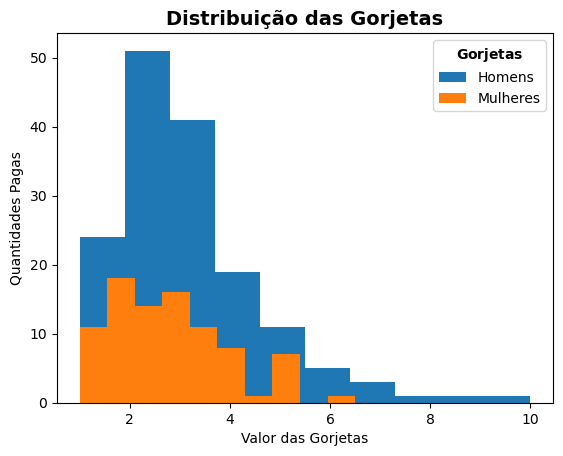

In [164]:
import matplotlib.pyplot as plt
plt.hist(tips[ tips.sex == 'Male' ]['tip'], label='Homens')
plt.hist(tips[ tips.sex == 'Female' ]['tip'], label='Mulheres')

plt.xlabel('Valor das Gorjetas')
plt.ylabel('Quantidades Pagas')
plt.title('Distribuição das Gorjetas', fontsize=14, weight='bold')
plt.legend(title='$\\bf{Gorjetas}$')
plt.show()

### Porcentagem

### Acessando valores por índice .loc, .iloc, .at, .iat
i - pega pelo indice numero

sem i - pega pelo valor nome

### Ordenar

### Acessando valores por índice .loc, .iloc, .at, .iat

### Atualizando Valores

In [165]:
carros.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Veiculo                                                                      
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Veiculo                  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2

In [166]:
carros['kmpg'] = 1.6 * carros['mpg']
carros.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Veiculo                                                                      
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb   kmpg  
Veiculo                         
Mazda RX4             4  33.60  
Mazda RX4 Wag         4  33.60  
Datsun 710            1  36.48  
Hornet 4 Drive        1  34.24  
Hornet Sportabout     2  29.92

In [167]:
carros['hp'] = carros['hp'] * 10
carros.head()

mpg  cyl   disp    hp  drat     wt   qsec  vs  am  gear  \
Veiculo                                                                       
Mazda RX4          21.0    6  160.0  1100  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  1100  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   930  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  1100  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  1750  3.15  3.440  17.02   0   0     3   

                   carb   kmpg  
Veiculo                         
Mazda RX4             4  33.60  
Mazda RX4 Wag         4  33.60  
Datsun 710            1  36.48  
Hornet 4 Drive        1  34.24  
Hornet Sportabout     2  29.92

In [168]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [169]:
dolar_real_rate = 5.8
tips['total_bill'] = tips['total_bill'] * dolar_real_rate         # alterando
tips['tip'] = tips['tip'] * dolar_real_rate                       # alterando

tips['total_bill_minus_tips'] = tips['total_bill'] - tips['tip']    # incluindo um novo atributo
tips['bill_by_head'] = tips['total_bill'] / tips['size']            # incluindo um novo atributo
tips.head()

total_bill     tip     sex smoker  day    time  size  \
0      98.542   5.858  Female     No  Sun  Dinner     2   
1      59.972   9.628    Male     No  Sun  Dinner     3   
2     121.858  20.300    Male     No  Sun  Dinner     3   
3     137.344  19.198    Male     No  Sun  Dinner     2   
4     142.622  20.938  Female     No  Sun  Dinner     4   

   total_bill_minus_tips  bill_by_head  
0                 92.684     49.271000  
1                 50.344     19.990667  
2                101.558     40.619333  
3                118.146     68.672000  
4                121.684     35.655500

### Atualizando Valores especificos

In [170]:
carros.loc[ 'Cadillac Fleetwood' , 'am' ] = 1 # atualizando dado especifico
carros.head()

mpg  cyl   disp    hp  drat     wt   qsec  vs  am  gear  \
Veiculo                                                                       
Mazda RX4          21.0    6  160.0  1100  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  1100  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   930  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  1100  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  1750  3.15  3.440  17.02   0   0     3   

                   carb   kmpg  
Veiculo                         
Mazda RX4             4  33.60  
Mazda RX4 Wag         4  33.60  
Datsun 710            1  36.48  
Hornet 4 Drive        1  34.24  
Hornet Sportabout     2  29.92

In [171]:
carros.iloc[ 1 , 8 ] = 0  # atualizando dado especifico
carros.head()

mpg  cyl   disp    hp  drat     wt   qsec  vs  am  gear  \
Veiculo                                                                       
Mazda RX4          21.0    6  160.0  1100  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  1100  3.90  2.875  17.02   0   0     4   
Datsun 710         22.8    4  108.0   930  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  1100  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  1750  3.15  3.440  17.02   0   0     3   

                   carb   kmpg  
Veiculo                         
Mazda RX4             4  33.60  
Mazda RX4 Wag         4  33.60  
Datsun 710            1  36.48  
Hornet 4 Drive        1  34.24  
Hornet Sportabout     2  29.92

In [172]:
carros.head(11)


mpg  cyl   disp    hp  drat     wt   qsec  vs  am  gear  \
Veiculo                                                                       
Mazda RX4          21.0    6  160.0  1100  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  1100  3.90  2.875  17.02   0   0     4   
Datsun 710         22.8    4  108.0   930  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  1100  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  1750  3.15  3.440  17.02   0   0     3   
Valiant            18.1    6  225.0  1050  2.76  3.460  20.22   1   0     3   
Duster 360         14.3    8  360.0  2450  3.21  3.570  15.84   0   0     3   
Merc 240D          24.4    4  146.7   620  3.69  3.190  20.00   1   0     4   
Merc 230           22.8    4  140.8   950  3.92  3.150  22.90   1   0     4   
Merc 280           19.2    6  167.6  1230  3.92  3.440  18.30   1   0     4   
Merc 280C          17.8    6  167.6  1230  3.92  3.440  18.90   1   0     4   

                   carb   kmpg  
Veiculo                         
Mazda RX4             4  33.60  
Mazda RX4 Wag         4  33.60  
Datsun 710            1  36.48  
Hornet 4 Drive        1  34.24  
Hornet Sportabout     2  29.92  
Valiant               1  28.96  
Duster 360            4  22.88  
Merc 240D             2  39.04  
Merc 230              2  36.48  
Merc 280              4  30.72  
Merc 280C             4  28.48

In [173]:
carros.iloc[ 0:10 , 8 ] = 1 # linhas da 0-10 coluna 8 tudo fica = 1
carros.head(12)

mpg  cyl   disp    hp  drat     wt   qsec  vs  am  gear  \
Veiculo                                                                       
Mazda RX4          21.0    6  160.0  1100  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  1100  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   930  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  1100  3.08  3.215  19.44   1   1     3   
Hornet Sportabout  18.7    8  360.0  1750  3.15  3.440  17.02   0   1     3   
Valiant            18.1    6  225.0  1050  2.76  3.460  20.22   1   1     3   
Duster 360         14.3    8  360.0  2450  3.21  3.570  15.84   0   1     3   
Merc 240D          24.4    4  146.7   620  3.69  3.190  20.00   1   1     4   
Merc 230           22.8    4  140.8   950  3.92  3.150  22.90   1   1     4   
Merc 280           19.2    6  167.6  1230  3.92  3.440  18.30   1   1     4   
Merc 280C          17.8    6  167.6  1230  3.92  3.440  18.90   1   0     4   
Merc 450SE         16.4    8  275.8  1800  3.07  4.070  17.40   0   0     3   

                   carb   kmpg  
Veiculo                         
Mazda RX4             4  33.60  
Mazda RX4 Wag         4  33.60  
Datsun 710            1  36.48  
Hornet 4 Drive        1  34.24  
Hornet Sportabout     2  29.92  
Valiant               1  28.96  
Duster 360            4  22.88  
Merc 240D             2  39.04  
Merc 230              2  36.48  
Merc 280              4  30.72  
Merc 280C             4  28.48  
Merc 450SE            3  26.24

### Atualizar varias colunas ao mesmo tempo

#### Iterando sobre as linhas
##### `iterrows()`

##### Acessando valores por índice .loc, .iloc, .at, .iat
##### iloc

In [174]:
display(Affairs.head(1)) # primeiros 1 valores
display(Affairs.tail(1)) # ultimos 1 valores

rownames  affairs gender   age  yearsmarried children  religiousness  \
0         4        0   male  37.0          10.0       no              3   

   education  occupation  rating  
0         18           7       4

rownames  affairs  gender   age  yearsmarried children  religiousness  \
600      9010        1  female  32.0          15.0      yes              3   

     education  occupation  rating  
600         14           1       5

In [175]:
display(Affairs.iloc[1])
display(Affairs.iloc[-1])

rownames              5
affairs               0
gender           female
age                27.0
yearsmarried        4.0
children             no
religiousness         4
education            14
occupation            6
rating                4
Name: 1, dtype: object

rownames           9010
affairs               1
gender           female
age                32.0
yearsmarried       15.0
children            yes
religiousness         3
education            14
occupation            1
rating                5
Name: 600, dtype: object

In [176]:
for line in range(0,len(carros)):
  print( carros.iloc[line] )

mpg       21.00
cyl        6.00
disp     160.00
hp      1100.00
drat       3.90
wt         2.62
qsec      16.46
vs         0.00
am         1.00
gear       4.00
carb       4.00
kmpg      33.60
Name: Mazda RX4, dtype: float64
mpg       21.000
cyl        6.000
disp     160.000
hp      1100.000
drat       3.900
wt         2.875
qsec      17.020
vs         0.000
am         1.000
gear       4.000
carb       4.000
kmpg      33.600
Name: Mazda RX4 Wag, dtype: float64
mpg      22.80
cyl       4.00
disp    108.00
hp      930.00
drat      3.85
wt        2.32
qsec     18.61
vs        1.00
am        1.00
gear      4.00
carb      1.00
kmpg     36.48
Name: Datsun 710, dtype: float64
mpg       21.400
cyl        6.000
disp     258.000
hp      1100.000
drat       3.080
wt         3.215
qsec      19.440
vs         1.000
am         1.000
gear       3.000
carb       1.000
kmpg      34.240
Name: Hornet 4 Drive, dtype: float64
mpg       18.70
cyl        8.00
disp     360.00
hp      1750.00
drat       3.15
wt

In [177]:
for line in range(0,len(carros)):
  print( carros.iloc[line, 0:2] )

mpg    21.0
cyl     6.0
Name: Mazda RX4, dtype: float64
mpg    21.0
cyl     6.0
Name: Mazda RX4 Wag, dtype: float64
mpg    22.8
cyl     4.0
Name: Datsun 710, dtype: float64
mpg    21.4
cyl     6.0
Name: Hornet 4 Drive, dtype: float64
mpg    18.7
cyl     8.0
Name: Hornet Sportabout, dtype: float64
mpg    18.1
cyl     6.0
Name: Valiant, dtype: float64
mpg    14.3
cyl     8.0
Name: Duster 360, dtype: float64
mpg    24.4
cyl     4.0
Name: Merc 240D, dtype: float64
mpg    22.8
cyl     4.0
Name: Merc 230, dtype: float64
mpg    19.2
cyl     6.0
Name: Merc 280, dtype: float64
mpg    17.8
cyl     6.0
Name: Merc 280C, dtype: float64
mpg    16.4
cyl     8.0
Name: Merc 450SE, dtype: float64
mpg    17.3
cyl     8.0
Name: Merc 450SL, dtype: float64
mpg    15.2
cyl     8.0
Name: Merc 450SLC, dtype: float64
mpg    10.4
cyl     8.0
Name: Cadillac Fleetwood, dtype: float64
mpg    10.4
cyl     8.0
Name: Lincoln Continental, dtype: float64
mpg    14.7
cyl     8.0
Name: Chrysler Imperial, dtype: float64
mp

In [178]:
for line in range(0,len(carros)):
  print( carros.iloc[line][['mpg','cyl']] )

mpg    21.0
cyl     6.0
Name: Mazda RX4, dtype: float64
mpg    21.0
cyl     6.0
Name: Mazda RX4 Wag, dtype: float64
mpg    22.8
cyl     4.0
Name: Datsun 710, dtype: float64
mpg    21.4
cyl     6.0
Name: Hornet 4 Drive, dtype: float64
mpg    18.7
cyl     8.0
Name: Hornet Sportabout, dtype: float64
mpg    18.1
cyl     6.0
Name: Valiant, dtype: float64
mpg    14.3
cyl     8.0
Name: Duster 360, dtype: float64
mpg    24.4
cyl     4.0
Name: Merc 240D, dtype: float64
mpg    22.8
cyl     4.0
Name: Merc 230, dtype: float64
mpg    19.2
cyl     6.0
Name: Merc 280, dtype: float64
mpg    17.8
cyl     6.0
Name: Merc 280C, dtype: float64
mpg    16.4
cyl     8.0
Name: Merc 450SE, dtype: float64
mpg    17.3
cyl     8.0
Name: Merc 450SL, dtype: float64
mpg    15.2
cyl     8.0
Name: Merc 450SLC, dtype: float64
mpg    10.4
cyl     8.0
Name: Cadillac Fleetwood, dtype: float64
mpg    10.4
cyl     8.0
Name: Lincoln Continental, dtype: float64
mpg    14.7
cyl     8.0
Name: Chrysler Imperial, dtype: float64
mp

In [179]:
display(carros.head())

for i in range(0,len(carros)):

  carros.iloc[i]['mpg'] = carros.iloc[i]['mpg'] + 10 # NÃO ALTERA --> Gera uma copia do df quando eu seleciono a coluna

display(carros.head())

mpg  cyl   disp    hp  drat     wt   qsec  vs  am  gear  \
Veiculo                                                                       
Mazda RX4          21.0    6  160.0  1100  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  1100  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   930  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  1100  3.08  3.215  19.44   1   1     3   
Hornet Sportabout  18.7    8  360.0  1750  3.15  3.440  17.02   0   1     3   

                   carb   kmpg  
Veiculo                         
Mazda RX4             4  33.60  
Mazda RX4 Wag         4  33.60  
Datsun 710            1  36.48  
Hornet 4 Drive        1  34.24  
Hornet Sportabout     2  29.92

/tmp/ipykernel_123922/4206193782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carros.iloc[i]['mpg'] = carros.iloc[i]['mpg'] + 10 # NÃO ALTERA --> Gera uma copia do df quando eu seleciono a coluna


mpg  cyl   disp    hp  drat     wt   qsec  vs  am  gear  \
Veiculo                                                                       
Mazda RX4          21.0    6  160.0  1100  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  1100  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   930  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  1100  3.08  3.215  19.44   1   1     3   
Hornet Sportabout  18.7    8  360.0  1750  3.15  3.440  17.02   0   1     3   

                   carb   kmpg  
Veiculo                         
Mazda RX4             4  33.60  
Mazda RX4 Wag         4  33.60  
Datsun 710            1  36.48  
Hornet 4 Drive        1  34.24  
Hornet Sportabout     2  29.92

In [180]:
display(carros.head())

for line in range(0,len(carros)):
  carros.iloc[line,0] = carros.iloc[line,0] + 10 # Gera a copia -- não estou selecionando a coluna

display(carros.head())

mpg  cyl   disp    hp  drat     wt   qsec  vs  am  gear  \
Veiculo                                                                       
Mazda RX4          21.0    6  160.0  1100  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  1100  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   930  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  1100  3.08  3.215  19.44   1   1     3   
Hornet Sportabout  18.7    8  360.0  1750  3.15  3.440  17.02   0   1     3   

                   carb   kmpg  
Veiculo                         
Mazda RX4             4  33.60  
Mazda RX4 Wag         4  33.60  
Datsun 710            1  36.48  
Hornet 4 Drive        1  34.24  
Hornet Sportabout     2  29.92

mpg  cyl   disp    hp  drat     wt   qsec  vs  am  gear  \
Veiculo                                                                       
Mazda RX4          31.0    6  160.0  1100  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      31.0    6  160.0  1100  3.90  2.875  17.02   0   1     4   
Datsun 710         32.8    4  108.0   930  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     31.4    6  258.0  1100  3.08  3.215  19.44   1   1     3   
Hornet Sportabout  28.7    8  360.0  1750  3.15  3.440  17.02   0   1     3   

                   carb   kmpg  
Veiculo                         
Mazda RX4             4  33.60  
Mazda RX4 Wag         4  33.60  
Datsun 710            1  36.48  
Hornet 4 Drive        1  34.24  
Hornet Sportabout     2  29.92

In [181]:
display(carros.head())

for line in range(0,len(carros)):
  for column in range(0,carros.shape[1]):
    carros.iloc[line,column] = carros.iloc[line,column] + 10 # somando mais 10 em todas as linhas e colunas do df

display(carros.head())

mpg  cyl   disp    hp  drat     wt   qsec  vs  am  gear  \
Veiculo                                                                       
Mazda RX4          31.0    6  160.0  1100  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      31.0    6  160.0  1100  3.90  2.875  17.02   0   1     4   
Datsun 710         32.8    4  108.0   930  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     31.4    6  258.0  1100  3.08  3.215  19.44   1   1     3   
Hornet Sportabout  28.7    8  360.0  1750  3.15  3.440  17.02   0   1     3   

                   carb   kmpg  
Veiculo                         
Mazda RX4             4  33.60  
Mazda RX4 Wag         4  33.60  
Datsun 710            1  36.48  
Hornet 4 Drive        1  34.24  
Hornet Sportabout     2  29.92

mpg  cyl   disp    hp   drat      wt   qsec  vs  am  gear  \
Veiculo                                                                         
Mazda RX4          41.0   16  170.0  1110  13.90  12.620  26.46  10  11    14   
Mazda RX4 Wag      41.0   16  170.0  1110  13.90  12.875  27.02  10  11    14   
Datsun 710         42.8   14  118.0   940  13.85  12.320  28.61  11  11    14   
Hornet 4 Drive     41.4   16  268.0  1110  13.08  13.215  29.44  11  11    13   
Hornet Sportabout  38.7   18  370.0  1760  13.15  13.440  27.02  10  11    13   

                   carb   kmpg  
Veiculo                         
Mazda RX4            14  43.60  
Mazda RX4 Wag        14  43.60  
Datsun 710           11  46.48  
Hornet 4 Drive       11  44.24  
Hornet Sportabout    12  39.92

##### LOC


In [182]:
carros.keys()

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb', 'kmpg'],
      dtype='object')

In [183]:
for column in carros:
  print(column)

mpg
cyl
disp
hp
drat
wt
qsec
vs
am
gear
carb
kmpg


In [184]:
carros.index

Index(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230',
       'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC',
       'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial',
       'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona',
       'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird',
       'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L',
       'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype='object', name='Veiculo')

In [185]:
for line in carros.index:
  print(line)

Mazda RX4
Mazda RX4 Wag
Datsun 710
Hornet 4 Drive
Hornet Sportabout
Valiant
Duster 360
Merc 240D
Merc 230
Merc 280
Merc 280C
Merc 450SE
Merc 450SL
Merc 450SLC
Cadillac Fleetwood
Lincoln Continental
Chrysler Imperial
Fiat 128
Honda Civic
Toyota Corolla
Toyota Corona
Dodge Challenger
AMC Javelin
Camaro Z28
Pontiac Firebird
Fiat X1-9
Porsche 914-2
Lotus Europa
Ford Pantera L
Ferrari Dino
Maserati Bora
Volvo 142E


In [186]:
display(carros.head())

for line in carros.index:
  for column in carros:
    carros.loc[line,column] = carros.loc[line,column] + 10 # somar + 10 em todas as linhas e colunas

display(carros.head())

mpg  cyl   disp    hp   drat      wt   qsec  vs  am  gear  \
Veiculo                                                                         
Mazda RX4          41.0   16  170.0  1110  13.90  12.620  26.46  10  11    14   
Mazda RX4 Wag      41.0   16  170.0  1110  13.90  12.875  27.02  10  11    14   
Datsun 710         42.8   14  118.0   940  13.85  12.320  28.61  11  11    14   
Hornet 4 Drive     41.4   16  268.0  1110  13.08  13.215  29.44  11  11    13   
Hornet Sportabout  38.7   18  370.0  1760  13.15  13.440  27.02  10  11    13   

                   carb   kmpg  
Veiculo                         
Mazda RX4            14  43.60  
Mazda RX4 Wag        14  43.60  
Datsun 710           11  46.48  
Hornet 4 Drive       11  44.24  
Hornet Sportabout    12  39.92

mpg  cyl   disp    hp   drat      wt   qsec  vs  am  gear  \
Veiculo                                                                         
Mazda RX4          51.0   26  180.0  1120  23.90  22.620  36.46  20  21    24   
Mazda RX4 Wag      51.0   26  180.0  1120  23.90  22.875  37.02  20  21    24   
Datsun 710         52.8   24  128.0   950  23.85  22.320  38.61  21  21    24   
Hornet 4 Drive     51.4   26  278.0  1120  23.08  23.215  39.44  21  21    23   
Hornet Sportabout  48.7   28  380.0  1770  23.15  23.440  37.02  20  21    23   

                   carb   kmpg  
Veiculo                         
Mazda RX4            24  53.60  
Mazda RX4 Wag        24  53.60  
Datsun 710           21  56.48  
Hornet 4 Drive       21  54.24  
Hornet Sportabout    22  49.92

In [187]:
for index, row in carros.iterrows():

  if row['disp'] > 450:
    print(row)

mpg       40.40
cyl       28.00
disp     492.00
hp      2070.00
drat      22.93
wt        25.25
qsec      37.98
vs        20.00
am        21.00
gear      23.00
carb      24.00
kmpg      36.64
Name: Cadillac Fleetwood, dtype: float64
mpg       40.400
cyl       28.000
disp     480.000
hp      2170.000
drat      23.000
wt        25.424
qsec      37.820
vs        20.000
am        20.000
gear      23.000
carb      24.000
kmpg      36.640
Name: Lincoln Continental, dtype: float64
mpg       44.700
cyl       28.000
disp     460.000
hp      2320.000
drat      23.230
wt        25.345
qsec      37.420
vs        20.000
am        20.000
gear      23.000
carb      24.000
kmpg      43.520
Name: Chrysler Imperial, dtype: float64


In [188]:
print(carros.mpg.sum())

for _, row in carros.iterrows():

  # print('before',row['mpg'])
  row['mpg'] = row['mpg'] + 1
  # print('after',row['mpg'])

print(carros.mpg.sum())

1602.9
1602.9


In [189]:
carros.head()

mpg  cyl   disp    hp   drat      wt   qsec  vs  am  gear  \
Veiculo                                                                         
Mazda RX4          51.0   26  180.0  1120  23.90  22.620  36.46  20  21    24   
Mazda RX4 Wag      51.0   26  180.0  1120  23.90  22.875  37.02  20  21    24   
Datsun 710         52.8   24  128.0   950  23.85  22.320  38.61  21  21    24   
Hornet 4 Drive     51.4   26  278.0  1120  23.08  23.215  39.44  21  21    23   
Hornet Sportabout  48.7   28  380.0  1770  23.15  23.440  37.02  20  21    23   

                   carb   kmpg  
Veiculo                         
Mazda RX4            24  53.60  
Mazda RX4 Wag        24  53.60  
Datsun 710           21  56.48  
Hornet 4 Drive       21  54.24  
Hornet Sportabout    22  49.92

In [190]:
for index, row in carros.iterrows():

  if row['disp'] > 450:
    print(row.name, 'mpg = ', row.mpg)


Cadillac Fleetwood mpg =  40.4
Lincoln Continental mpg =  40.4
Chrysler Imperial mpg =  44.7


In [191]:
financas.head()

Ticker         BRL=X   ITUB4.SA   PETR4.SA   VALE3.SA     ^BVSP
Date                                                           
2023-01-02  5.285500  22.426947  16.502495  80.482178  106376.0
2023-01-03  5.360131  21.959913  16.084890  80.338135  104166.0
2023-01-04  5.478500  22.024012  16.596094  80.482178  105334.0
2023-01-05  5.430100  22.710831  17.193699  81.832550  107518.0
2023-01-06  5.349800  23.104607  17.092899  83.128906  108836.0

Converta os valores cabíves para reais.

In [192]:
for column in ['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']:
  financas[column] = financas[column] * financas['BRL=X']

financas.head()

Ticker         BRL=X    ITUB4.SA   PETR4.SA    VALE3.SA     ^BVSP
Date                                                             
2023-01-02  5.285500  118.537628  87.223937  425.388554  106376.0
2023-01-03  5.360131  117.708007  86.217116  430.622910  104166.0
2023-01-04  5.478500  120.658545  90.921700  440.921602  105334.0
2023-01-05  5.430100  123.322081  93.363504  444.358927  107518.0
2023-01-06  5.349800  123.605027  91.443595  444.723032  108836.0

In [193]:
carros.loc['Camaro Z28':'Datsun 710'] # pegando valores do camaro até datsun

Empty DataFrame
Columns: [mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb, kmpg]
Index: []

In [194]:
carros.loc['Camaro Z28':'Datsun 710' , 'hp':'am'] # pegando valores do camaro até datsun e as colunas hp até am

Empty DataFrame
Columns: [hp, drat, wt, qsec, vs, am]
Index: []

In [195]:
carros.iloc[2:5 , 3:9] # pegando valores do camaro até datsun e as colunas hp até am

hp   drat      wt   qsec  vs  am
Veiculo                                              
Datsun 710          950  23.85  22.320  38.61  21  21
Hornet 4 Drive     1120  23.08  23.215  39.44  21  21
Hornet Sportabout  1770  23.15  23.440  37.02  20  21

df.at['Datsun 710',['mpg','cyl']] --> erro

In [196]:
carros.at['Datsun 710','mpg']

52.8

In [197]:
carros.iat[2,0]

52.8

df.ix[2:5,'mpg'] - ERRO

In [198]:
carros.iloc[2:5]['mpg']

Veiculo
Datsun 710           52.8
Hornet 4 Drive       51.4
Hornet Sportabout    48.7
Name: mpg, dtype: float64

In [199]:
carros.head()

mpg  cyl   disp    hp   drat      wt   qsec  vs  am  gear  \
Veiculo                                                                         
Mazda RX4          51.0   26  180.0  1120  23.90  22.620  36.46  20  21    24   
Mazda RX4 Wag      51.0   26  180.0  1120  23.90  22.875  37.02  20  21    24   
Datsun 710         52.8   24  128.0   950  23.85  22.320  38.61  21  21    24   
Hornet 4 Drive     51.4   26  278.0  1120  23.08  23.215  39.44  21  21    23   
Hornet Sportabout  48.7   28  380.0  1770  23.15  23.440  37.02  20  21    23   

                   carb   kmpg  
Veiculo                         
Mazda RX4            24  53.60  
Mazda RX4 Wag        24  53.60  
Datsun 710           21  56.48  
Hornet 4 Drive       21  54.24  
Hornet Sportabout    22  49.92

In [200]:
carros = carros.sort_index()
carros.head()

mpg  cyl   disp    hp   drat      wt   qsec  vs  am  \
Veiculo                                                                    
AMC Javelin         45.2   28  324.0  1520  23.15  23.435  37.30  20  20   
Cadillac Fleetwood  40.4   28  492.0  2070  22.93  25.250  37.98  20  21   
Camaro Z28          43.3   28  370.0  2470  23.73  23.840  35.41  20  20   
Chrysler Imperial   44.7   28  460.0  2320  23.23  25.345  37.42  20  20   
Datsun 710          52.8   24  128.0   950  23.85  22.320  38.61  21  21   

                    gear  carb   kmpg  
Veiculo                                
AMC Javelin           23    22  44.32  
Cadillac Fleetwood    23    24  36.64  
Camaro Z28            23    24  41.28  
Chrysler Imperial     23    24  43.52  
Datsun 710            24    21  56.48

`DataFrame.loc`

Access a group of rows and columns by label(s).

`DataFrame.iloc`

Access a group of rows and columns by integer position(s).

`DataFrame.at`

Access a single value for a row/column label pair.

`DataFrame.iat`

Access a single value for a row/column pair by integer position.

In [201]:
carros.mpg

Veiculo
AMC Javelin            45.2
Cadillac Fleetwood     40.4
Camaro Z28             43.3
Chrysler Imperial      44.7
Datsun 710             52.8
Dodge Challenger       45.5
Duster 360             44.3
Ferrari Dino           49.7
Fiat 128               62.4
Fiat X1-9              57.3
Ford Pantera L         45.8
Honda Civic            60.4
Hornet 4 Drive         51.4
Hornet Sportabout      48.7
Lincoln Continental    40.4
Lotus Europa           60.4
Maserati Bora          45.0
Mazda RX4              51.0
Mazda RX4 Wag          51.0
Merc 230               52.8
Merc 240D              54.4
Merc 280               49.2
Merc 280C              47.8
Merc 450SE             46.4
Merc 450SL             47.3
Merc 450SLC            45.2
Pontiac Firebird       49.2
Porsche 914-2          56.0
Toyota Corolla         63.9
Toyota Corona          51.5
Valiant                48.1
Volvo 142E             51.4
Name: mpg, dtype: float64

In [202]:
carros.mpg['Porsche 914-2']

56.0

df['Porsche 914-2'] --> erro não pode buscar linhas como se fossem colunas - usar o loc

In [203]:
# Dataframe
carros.loc['Porsche 914-2']

mpg      56.00
cyl      24.00
disp    140.30
hp      930.00
drat     24.43
wt       22.14
qsec     36.70
vs       20.00
am       21.00
gear     25.00
carb     22.00
kmpg     61.60
Name: Porsche 914-2, dtype: float64

In [204]:
carros.head()

mpg  cyl   disp    hp   drat      wt   qsec  vs  am  \
Veiculo                                                                    
AMC Javelin         45.2   28  324.0  1520  23.15  23.435  37.30  20  20   
Cadillac Fleetwood  40.4   28  492.0  2070  22.93  25.250  37.98  20  21   
Camaro Z28          43.3   28  370.0  2470  23.73  23.840  35.41  20  20   
Chrysler Imperial   44.7   28  460.0  2320  23.23  25.345  37.42  20  20   
Datsun 710          52.8   24  128.0   950  23.85  22.320  38.61  21  21   

                    gear  carb   kmpg  
Veiculo                                
AMC Javelin           23    22  44.32  
Cadillac Fleetwood    23    24  36.64  
Camaro Z28            23    24  41.28  
Chrysler Imperial     23    24  43.52  
Datsun 710            24    21  56.48

In [205]:
carros.loc['Datsun 710',['mpg','cyl']]

mpg    52.8
cyl    24.0
Name: Datsun 710, dtype: float64

In [206]:
carros.loc['Datsun 710'][['mpg','cyl']]

mpg    52.8
cyl    24.0
Name: Datsun 710, dtype: float64

In [207]:
carros.iloc[2,0:2]

mpg    43.3
cyl    28.0
Name: Camaro Z28, dtype: float64

In [208]:
len( Affairs[ (Affairs['children'] == 'yes') & (Affairs.age < 30) ] ) / len(Affairs) * 100

22.462562396006653

## Merge
Combinar dois DataFrames com base em uma ou mais colunas.

In [209]:
# Criando DataFrames de exemplo
df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Nome': ['Ana', 'Bruno', 'Carlos']
})

df2 = pd.DataFrame({
    'ID': [1, 2, 4],
    'Idade': [23, 34, 45]
})

# Merge usando a coluna 'ID'
merged_df = pd.merge(df1, df2, on='ID')
print(merged_df)
print("_________________________________")
# Merge com 'how' definido como 'outer'
outer_merged_df = pd.merge(df1, df2, on='ID', how='outer')
print(outer_merged_df)
print("_________________________________")

# Merge com 'how' definido como 'left'
left_merged_df = pd.merge(df1, df2, on='ID', how='left')
print(left_merged_df)
print("_________________________________")


   ID   Nome  Idade
0   1    Ana     23
1   2  Bruno     34
_________________________________
   ID    Nome  Idade
0   1     Ana   23.0
1   2   Bruno   34.0
2   3  Carlos    NaN
3   4     NaN   45.0
_________________________________
   ID    Nome  Idade
0   1     Ana   23.0
1   2   Bruno   34.0
2   3  Carlos    NaN
_________________________________


In [210]:
# Exemplo 2: Merge usando múltiplas colunas
df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Nome': ['Ana', 'Bruno', 'Carlos'],
    'Cidade': ['SP', 'RJ', 'MG']
})

df2 = pd.DataFrame({
    'ID': [1, 2, 4],
    'Idade': [23, 34, 45],
    'Cidade': ['SP', 'RJ', 'BA']
})

merged_df_multiple = pd.merge(df1, df2, on=['ID', 'Cidade'])
print(merged_df_multiple)

# Exemplo 3: Merge com suffixes para colunas com o mesmo nome
df3 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Nome': ['Ana', 'Bruno', 'Carlos']
})

df4 = pd.DataFrame({
    'ID': [1, 2, 4],
    'Nome': ['Maria', 'João', 'Pedro']
})
print("_________________________________")
merged_df_suffixes = pd.merge(df3, df4, on='ID', suffixes=('_left', '_right'))
print(merged_df_suffixes)


   ID   Nome Cidade  Idade
0   1    Ana     SP     23
1   2  Bruno     RJ     34
_________________________________
   ID Nome_left Nome_right
0   1       Ana      Maria
1   2     Bruno       João


## Concat
Concatenar DataFrames ao longo de um eixo especificado.

In [211]:
# Criando DataFrames de exemplo
df3 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Nome': ['Ana', 'Bruno', 'Carlos']
})

df4 = pd.DataFrame({
    'ID': [4, 5, 6],
    'Nome': ['Daniela', 'Eduardo', 'Fernanda']
})

# Concatenação vertical
concat_df = pd.concat([df3, df4])
print(concat_df)
print("_________________________________")

# Concatenação horizontal
df5 = pd.DataFrame({
    'Sobrenome': ['Silva', 'Souza', 'Santos']
})

concat_df_horizontal = pd.concat([df3, df5], axis=1)
print(concat_df_horizontal)
print("_________________________________")

# Concat com redefinição de índice
concat_df_reset_index = pd.concat([df3, df4], ignore_index=True)
print(concat_df_reset_index)
print("_________________________________")


   ID      Nome
0   1       Ana
1   2     Bruno
2   3    Carlos
0   4   Daniela
1   5   Eduardo
2   6  Fernanda
_________________________________
   ID    Nome Sobrenome
0   1     Ana     Silva
1   2   Bruno     Souza
2   3  Carlos    Santos
_________________________________
   ID      Nome
0   1       Ana
1   2     Bruno
2   3    Carlos
3   4   Daniela
4   5   Eduardo
5   6  Fernanda
_________________________________


In [212]:
# Exemplo 2: Concat com chaves (keys) para identificação
df5 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Nome': ['Ana', 'Bruno', 'Carlos']
})

df6 = pd.DataFrame({
    'ID': [4, 5, 6],
    'Nome': ['Daniela', 'Eduardo', 'Fernanda']
})

concat_with_keys = pd.concat([df5, df6], keys=['Grupo1', 'Grupo2'])
print(concat_with_keys)

# Exemplo 3: Concat com níveis de índice (levels)
df7 = pd.DataFrame({
    'ID': [1, 2],
    'Nome': ['Ana', 'Bruno']
})

df8 = pd.DataFrame({
    'ID': [3, 4],
    'Nome': ['Carlos', 'Daniela']
})

concat_with_levels = pd.concat([df7, df8], keys=['Grupo1', 'Grupo2'], names=['Grupo', 'Linha'])
print(concat_with_levels)


          ID      Nome
Grupo1 0   1       Ana
       1   2     Bruno
       2   3    Carlos
Grupo2 0   4   Daniela
       1   5   Eduardo
       2   6  Fernanda
              ID     Nome
Grupo  Linha             
Grupo1 0       1      Ana
       1       2    Bruno
Grupo2 0       3   Carlos
       1       4  Daniela


## Transpose
Transpor o DataFrame, trocando linhas por colunas.

In [213]:
# Criando DataFrame de exemplo
df6 = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})
print(df6)
print("_________________________________")

# Transposição do DataFrame
transposed_df = df6.transpose()
print(transposed_df)
print("_________________________________")

# Transposição com mudança de nome das colunas
transposed_df.columns = ['Linha1', 'Linha2', 'Linha3']
print(transposed_df)
print("_________________________________")

# Transposição com reset de índice
transposed_reset_df = transposed_df.reset_index()
print(transposed_reset_df)
print("_________________________________")


   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9
_________________________________
   0  1  2
A  1  2  3
B  4  5  6
C  7  8  9
_________________________________
   Linha1  Linha2  Linha3
A       1       2       3
B       4       5       6
C       7       8       9
_________________________________
  index  Linha1  Linha2  Linha3
0     A       1       2       3
1     B       4       5       6
2     C       7       8       9
_________________________________


In [214]:
# Exemplo 2: Transposição e renomeação das colunas com reset de índice
df9 = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

transposed_renamed = df9.transpose().reset_index()
transposed_renamed.columns = ['Original', 'Linha1', 'Linha2', 'Linha3']
print(transposed_renamed)

# Exemplo 3: Transposição com alteração de tipos
df10 = pd.DataFrame({
    'A': ['x', 'y', 'z'],
    'B': ['a', 'b', 'c']
})

transposed_with_types = df10.transpose().astype(str)
print(transposed_with_types)


  Original  Linha1  Linha2  Linha3
0        A       1       2       3
1        B       4       5       6
2        C       7       8       9
   0  1  2
A  x  y  z
B  a  b  c


## Apply
Aplicar uma função ao longo de um eixo do DataFrame.

In [215]:
# Criando DataFrame de exemplo
df7 = pd.DataFrame({
    'Valores': [1, 2, 3, 4, 5]
})

# Aplicar função lambda para duplicar os valores
df7['Duplicado'] = df7['Valores'].apply(lambda x: x * 2)

# Aplicar função numpy sqrt para calcular a raiz quadrada dos valores
df7['Raiz'] = df7['Valores'].apply(np.sqrt)

# Aplicar função personalizada para categorizar os valores
def categorizar(valor):
    if valor < 3:
        return 'Baixo'
    elif valor < 5:
        return 'Médio'
    else:
        return 'Alto'

df7['Categoria'] = df7['Valores'].apply(categorizar)
print(df7)


   Valores  Duplicado      Raiz Categoria
0        1          2  1.000000     Baixo
1        2          4  1.414214     Baixo
2        3          6  1.732051     Médio
3        4          8  2.000000     Médio
4        5         10  2.236068      Alto


In [216]:
# Exemplo 2: Aplicar função numpy log ao longo das colunas
df11 = pd.DataFrame({
    'Valores': [1, 2, 3, 4, 5]
})

df11['Log'] = df11['Valores'].apply(np.log)
print(df11)

# Exemplo 3: Aplicar função usando applymap em todo o DataFrame
df12 = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})
print("_________________________________")
df12_applymap = df12.applymap(lambda x: x * 2)
print(df12_applymap)


   Valores       Log
0        1  0.000000
1        2  0.693147
2        3  1.098612
3        4  1.386294
4        5  1.609438
_________________________________
   A   B
0  2   8
1  4  10
2  6  12


## Groupby
Agrupar dados por uma ou mais colunas e aplicar funções de agregação.

In [217]:
# Criando DataFrame de exemplo
df8 = pd.DataFrame({
    'Departamento': ['RH', 'TI', 'RH', 'TI', 'RH'],
    'Salário': [5000, 6000, 5200, 5800, 4900]
})

# Agrupar por departamento e calcular a média salarial
grouped_df = df8.groupby('Departamento')['Salário'].mean().reset_index()
print(grouped_df)
print("_________________________________")

# Agrupar por departamento e calcular o salário máximo
max_salary_df = df8.groupby('Departamento')['Salário'].max().reset_index()
print(max_salary_df)

print("_________________________________")
# Agrupar por departamento e calcular o total salarial
total_salary_df = df8.groupby('Departamento')['Salário'].sum().reset_index()
print(total_salary_df)

print("_________________________________")

  Departamento      Salário
0           RH  5033.333333
1           TI  5900.000000
_________________________________
  Departamento  Salário
0           RH     5200
1           TI     6000
_________________________________
  Departamento  Salário
0           RH    15100
1           TI    11800
_________________________________


In [218]:
# Exemplo 2: Agrupar por múltiplas colunas e calcular várias estatísticas
df13 = pd.DataFrame({
    'Departamento': ['RH', 'TI', 'RH', 'TI', 'RH'],
    'Local': ['SP', 'RJ', 'SP', 'RJ', 'MG'],
    'Salário': [5000, 6000, 5200, 5800, 4900]
})

grouped_multiple = df13.groupby(['Departamento', 'Local']).agg({
    'Salário': ['mean', 'max', 'sum']
}).reset_index()
print(grouped_multiple)

# Exemplo 3: Agrupar e aplicar transformação personalizada
df14 = pd.DataFrame({
    'Categoria': ['A', 'B', 'A', 'B'],
    'Valor': [10, 20, 30, 40]
})

def custom_transformation(x):
    return x.sum() / x.count()

grouped_custom = df14.groupby('Categoria').transform(custom_transformation)
print(grouped_custom)


  Departamento Local Salário             
                        mean   max    sum
0           RH    MG  4900.0  4900   4900
1           RH    SP  5100.0  5200  10200
2           TI    RJ  5900.0  6000  11800
   Valor
0   20.0
1   30.0
2   20.0
3   30.0


## Normalização para valores numéricos
Normalizar os valores numéricos do DataFrame.



In [219]:
# Criando DataFrame de exemplo
df9 = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50]
})

# Normalização min-max
df9['A_normalizado'] = (df9['A'] - df9['A'].min()) / (df9['A'].max() - df9['A'].min())
df9['B_normalizado'] = (df9['B'] - df9['B'].min()) / (df9['B'].max() - df9['B'].min())
print(df9)
print("_________________________________")
# Normalização z-score
df9['A_zscore'] = (df9['A'] - df9['A'].mean()) / df9['A'].std()
df9['B_zscore'] = (df9['B'] - df9['B'].mean()) / df9['B'].std()
print(df9)
print("_________________________________")
# Normalização decimal scaling
df9['A_decimal_scaling'] = df9['A'] / 10**np.ceil(np.log10(df9['A'].abs().max()))
df9['B_decimal_scaling'] = df9['B'] / 10**np.ceil(np.log10(df9['B'].abs().max()))
print(df9)
print("_________________________________")

   A   B  A_normalizado  B_normalizado
0  1  10           0.00           0.00
1  2  20           0.25           0.25
2  3  30           0.50           0.50
3  4  40           0.75           0.75
4  5  50           1.00           1.00
_________________________________
   A   B  A_normalizado  B_normalizado  A_zscore  B_zscore
0  1  10           0.00           0.00 -1.264911 -1.264911
1  2  20           0.25           0.25 -0.632456 -0.632456
2  3  30           0.50           0.50  0.000000  0.000000
3  4  40           0.75           0.75  0.632456  0.632456
4  5  50           1.00           1.00  1.264911  1.264911
_________________________________
   A   B  A_normalizado  B_normalizado  A_zscore  B_zscore  A_decimal_scaling  \
0  1  10           0.00           0.00 -1.264911 -1.264911                0.1   
1  2  20           0.25           0.25 -0.632456 -0.632456                0.2   
2  3  30           0.50           0.50  0.000000  0.000000                0.3   
3  4  40           0

In [220]:
# Exemplo 2: Normalização por robust scaler (removendo mediana e escalando pela IQR)
df15 = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50]
})

q1 = df15.quantile(0.25)
q3 = df15.quantile(0.75)
iqr = q3 - q1

df15_robust = (df15 - q1) / iqr
print(df15_robust)

# Exemplo 3: Normalização com divisão pelo valor máximo (feature scaling)
df16 = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50]
})

df16_feature_scaling = df16 / df16.max()
print(df16_feature_scaling)


     A    B
0 -0.5 -0.5
1  0.0  0.0
2  0.5  0.5
3  1.0  1.0
4  1.5  1.5
     A    B
0  0.2  0.2
1  0.4  0.4
2  0.6  0.6
3  0.8  0.8
4  1.0  1.0


##  Fillna
Preencher valores ausentes em um DataFrame.

In [221]:
# Criando DataFrame de exemplo com valores NaN
df10 = pd.DataFrame({
    'A': [1, np.nan, 3, np.nan, 5],
    'B': [np.nan, 2, np.nan, 4, 5]
})

print("_________________________________")
print(df10)
print("_________________________________")
# Preencher valores NaN com zero
df10_filled_0 = df10.fillna(0)
print(df10_filled_0)
print("_________________________________")
# Preencher valores NaN com a média da coluna
df10_filled_mean = df10.fillna(df10.mean())
print(df10_filled_mean)
print("_________________________________")
# Preencher valores NaN com o método ffill (forward fill)
df10_filled_ffill = df10.fillna(method='ffill')
print(df10_filled_ffill)
print("_________________________________")

_________________________________
     A    B
0  1.0  NaN
1  NaN  2.0
2  3.0  NaN
3  NaN  4.0
4  5.0  5.0
_________________________________
     A    B
0  1.0  0.0
1  0.0  2.0
2  3.0  0.0
3  0.0  4.0
4  5.0  5.0
_________________________________
     A         B
0  1.0  3.666667
1  3.0  2.000000
2  3.0  3.666667
3  3.0  4.000000
4  5.0  5.000000
_________________________________
     A    B
0  1.0  NaN
1  1.0  2.0
2  3.0  2.0
3  3.0  4.0
4  5.0  5.0
_________________________________


In [222]:
# Exemplo 2: Preencher valores NaN com método bfill (backward fill)
df17 = pd.DataFrame({
    'A': [1, np.nan, 3, np.nan, 5],
    'B': [np.nan, 2, np.nan, 4, 5]
})



print("_________________________________")
print(df17)
print("_________________________________")
df17_filled_bfill = df17.fillna(method='bfill')
print(df17_filled_bfill)

# Exemplo 3: Preencher valores NaN com um dicionário de valores
df18 = pd.DataFrame({
    'A': [1, np.nan, 3, np.nan, 5],
    'B': [np.nan, 2, np.nan, 4, 5]
})
print("_________________________________")
df18_filled_dict = df18.fillna({'A': 0, 'B': 1})
print(df18_filled_dict)


_________________________________
     A    B
0  1.0  NaN
1  NaN  2.0
2  3.0  NaN
3  NaN  4.0
4  5.0  5.0
_________________________________
     A    B
0  1.0  2.0
1  3.0  2.0
2  3.0  4.0
3  5.0  4.0
4  5.0  5.0
_________________________________
     A    B
0  1.0  1.0
1  0.0  2.0
2  3.0  1.0
3  0.0  4.0
4  5.0  5.0


##  Replace
Substituir valores em um DataFrame.

In [223]:
# Criando DataFrame de exemplo
df11 = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': ['um', 'dois', 'três', 'quatro', 'cinco']
})

print("_____________ORIGINAL____________")

print(df11)
print("_________________________________")
# Substituir valores em uma coluna
df11_replaced = df11.replace({'A': {1: 10, 2: 20}})
print(df11_replaced)
print("_________________________________")
# Substituir valores em múltiplas colunas
df11_replaced_multiple = df11.replace({1: 10, 'um': 'dez'})
print(df11_replaced_multiple)
print("_________________________________")
# Substituir usando expressões regulares
df11_replaced_regex = df11.replace(to_replace=r'^d.*$', value='numeral', regex=True)
print(df11_replaced_regex)
print("_________________________________")

_____________ORIGINAL____________
   A       B
0  1      um
1  2    dois
2  3    três
3  4  quatro
4  5   cinco
_________________________________
    A       B
0  10      um
1  20    dois
2   3    três
3   4  quatro
4   5   cinco
_________________________________
    A       B
0  10     dez
1   2    dois
2   3    três
3   4  quatro
4   5   cinco
_________________________________
   A        B
0  1       um
1  2  numeral
2  3     três
3  4   quatro
4  5    cinco
_________________________________


In [224]:
# Exemplo 2: Substituir valores em uma série
df19 = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': ['um', 'dois', 'três', 'quatro', 'cinco']
})

df19['A_replaced'] = df19['A'].replace([1, 2, 3], [10, 20, 30])
print(df19)

# Exemplo 3: Substituir valores com regex em múltiplas colunas
df20 = pd.DataFrame({
    'A': ['um', 'dois', 'três'],
    'B': ['quatro', 'cinco', 'seis']
})
print("_________________________________")
df20_replaced_regex = df20.replace(to_replace=r'[a-z]', value='X', regex=True)
print(df20_replaced_regex)


   A       B  A_replaced
0  1      um          10
1  2    dois          20
2  3    três          30
3  4  quatro           4
4  5   cinco           5
_________________________________
      A       B
0    XX  XXXXXX
1  XXXX   XXXXX
2  XXêX    XXXX


# Visualização de Dados

Visualização de Dados. Tipos de visualização e gráficos. Elementos gráficos dos Labs: anottations, vlines/lines, múltiplos gráficos em uma mesma figura, colocar linha de tendência, mapa de calor (incluindo de correlação) etc.

## Iterando no ax[i,j]

**Script Layer & Artist Layer**

Na interface direta (ou Script Layer) o Matplotlib mantém o controle da figura e eixos ‘atuais’ onde as funções plt serão aplicadas. Essa é uma forma simples e útil, e vamos usá-la na maior parte do tempo. É, entretanto, uma forma complicada quando trabalhamos com múltiplos gráficos ou conjuntos de gráficos com uma apresentação muito complexa.


A interface orientada a objetos (ou Artist Layer) permite um maior controle das figuras e você deve preferir essa interface quando múltiplos gráficos ou figuras muito elaboradas são empregados. Nela você pode apontar explicitamente a ‘figura’ (fig) os gráficos contidos dentro dela (ax ou axis dependendo do caso).

### Script Layer

In [225]:
plt.figure(figsize=(12,4)) # cria uma figura alterando o tamanho, figsize=(tamanho_horizontal,tamanho_vertical)

plt.suptitle('Script Layer', fontsize=14, weight='bold', y=1.05)
x = x = np.linspace(0,10,100)
# cria e ativa um gráfico na figura
plt.subplot(1, 2, 1) # (linhas, colunas, gráfico ativo)
plt.plot(x, np.sin(x))
plt.title('Primeiro plot')

# cria e ativa um segundo gráfico na figura
plt.subplot(1, 2, 2) # (linhas, colunas, gráfico ativo)
plt.plot(x, np.cos(4*x));
plt.title('Segundo plot')

plt.tight_layout()
plt.show()

### Artist Layer

plt.title() → ax.set_title()

plt.xlabel() → ax.set_xlabel()

plt.ylabel() → ax.set_ylabel()

plt.xlim() → ax.set_xlim()

plt.ylim() → ax.set_ylim()

E o comando ax.set() ainda pode ser empregado para definir todas essas propriedades simultaneamente.



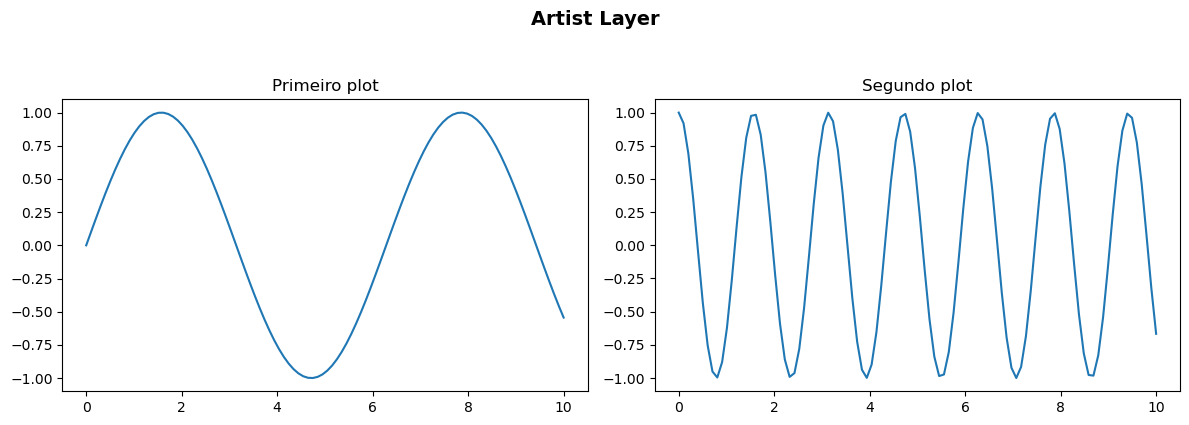

In [226]:
# Cria uma grade de gráficos com 1 linha e 2 colunas de gráficos, ax é um vetor em que cada elemento corresponde a um gráfico da grade
fig, ax = plt.subplots(1,2,figsize=(12,4)) # cria uma figura alterando o tamanho, figsize=(tamanho_horizontal,tamanho_vertical)

plt.suptitle('Artist Layer', fontsize=14, weight='bold', y=1.05)

# Os comandos podem então ser direcionados para o gráfico específico
ax[0].plot(x, np.sin(x))
ax[0].set_title('Primeiro plot')

ax[1].plot(x, np.cos(4*x));
ax[1].set_title('Segundo plot')

plt.tight_layout()
plt.show()

In [227]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

for r in boston['rad'].unique():
  ax[0].boxplot(boston[boston.rad == r]['medv'], positions=[r])

ax[0].set_title('Distribution Prices by Rad')

sns.boxplot(x='rad',y='medv',data=boston,ax=ax[1])
ax[1].set_title('Distribution Prices by Rad')

plt.tight_layout()
plt.show()

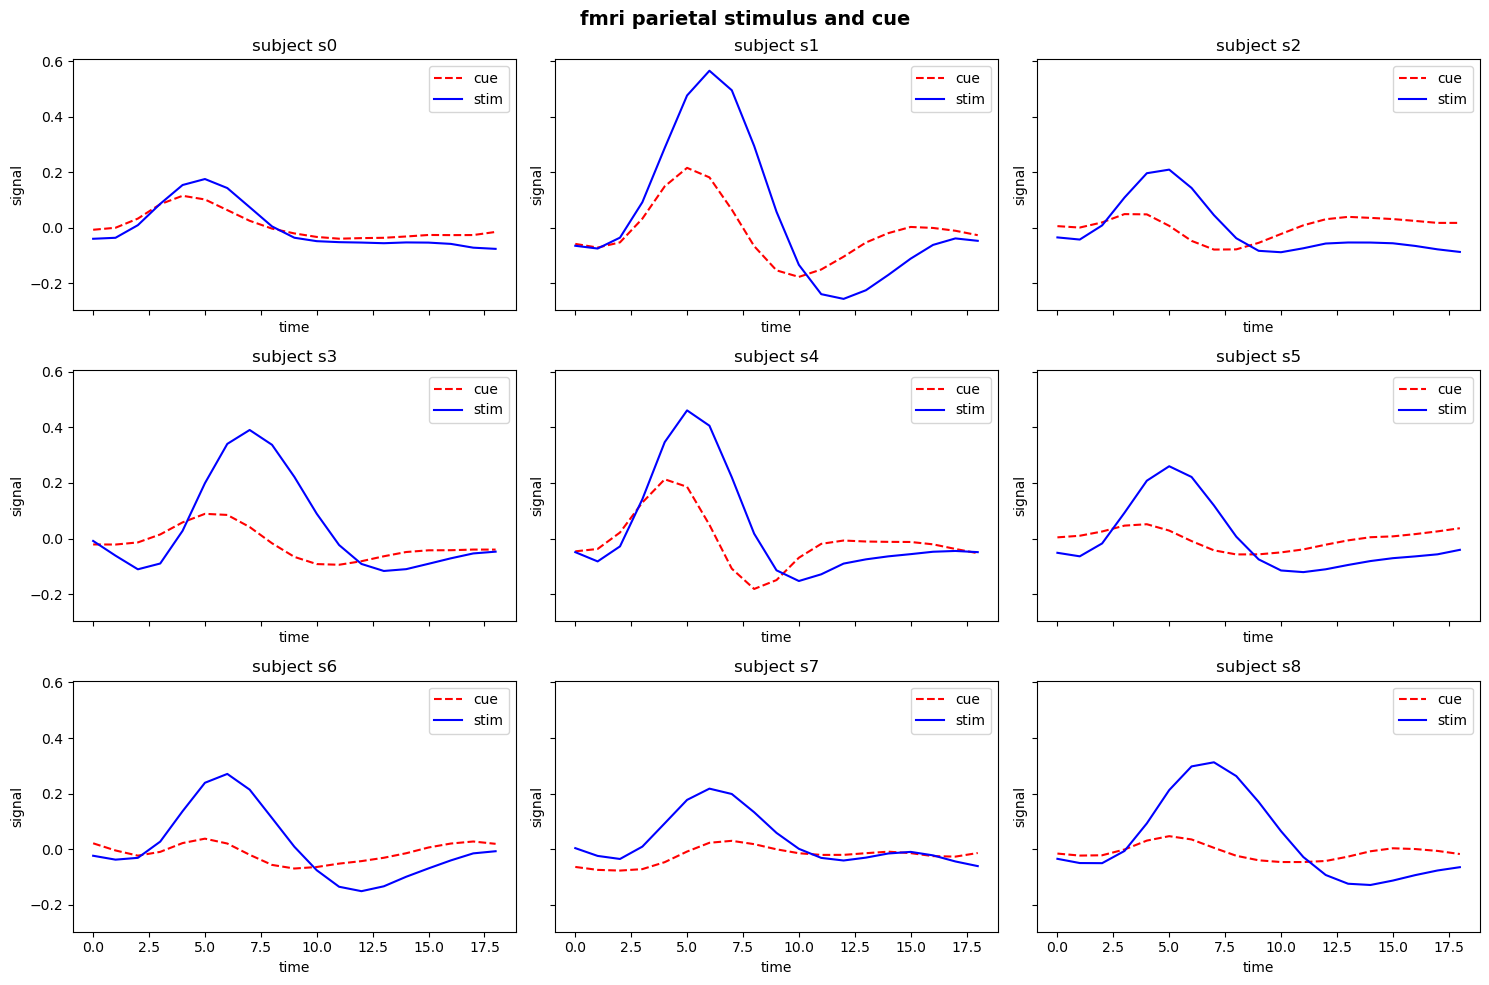

In [228]:
## Interando i e j
df1 = fmri.sort_values('timepoint')
fig, ax= plt.subplots(3,3,figsize=(15,10),sharex=True,sharey=True)
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

i_s = 0

for i in range(0,ax.shape[0]):
  for j in range(0,ax.shape[1]):

    s = 's' + str(i_s)

    for e in df1.event.unique():
      mask = (df1.subject == s) & (df1.event == e) & (df1.region == 'parietal')
      ax[i,j].plot(df1[ mask ].timepoint, df1[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

    ax[i,j].set_title('subject ' + s, fontsize=12)
    ax[i,j].set_xlabel('time')
    ax[i,j].set_ylabel('signal')
    ax[i,j].legend()

    i_s = i_s + 1

  plt.suptitle('fmri parietal stimulus and cue', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_1.png')

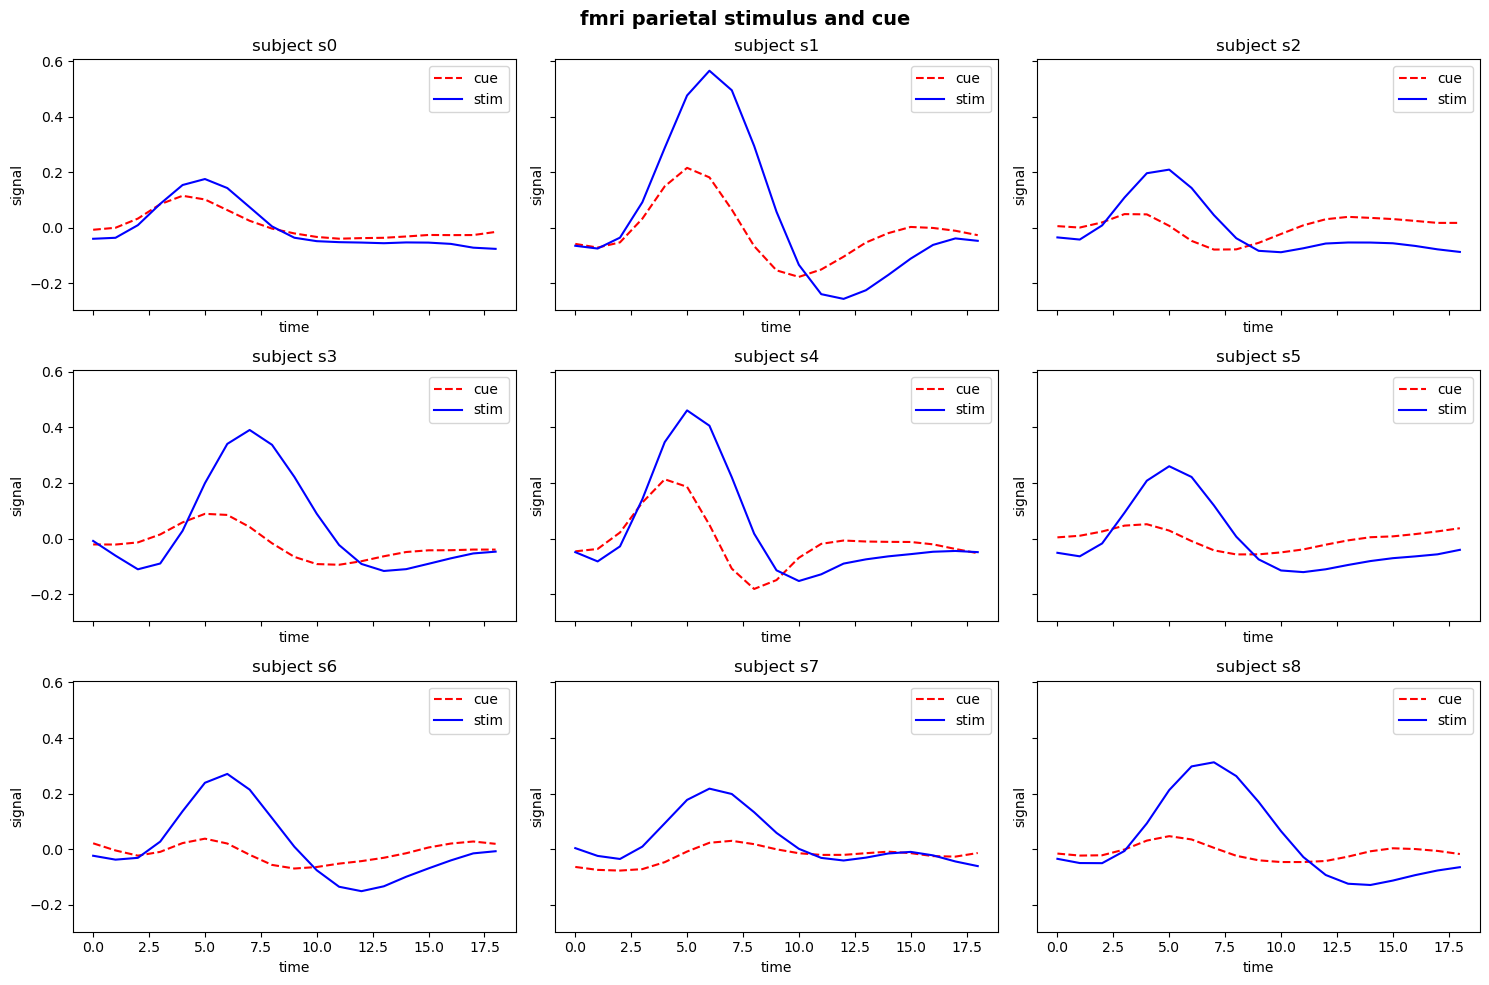

In [229]:
## Interando i
fig, axis= plt.subplots(3,3,figsize=(15,10),sharex=True,sharey=True)
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

ax = axis.reshape(-1)

for i in range(0,9):
  s = 's' + str(i)

  for e in df1.event.unique():
    mask = (df1.subject == s) & (df1.event == e) & (df1.region == 'parietal')
    ax[i].plot(df1[ mask ].timepoint, df1[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

  ax[i].set_title('subject ' + s, fontsize=12)
  ax[i].set_xlabel('time')
  ax[i].set_ylabel('signal')
  ax[i].legend()

  plt.suptitle('fmri parietal stimulus and cue', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_1.png')

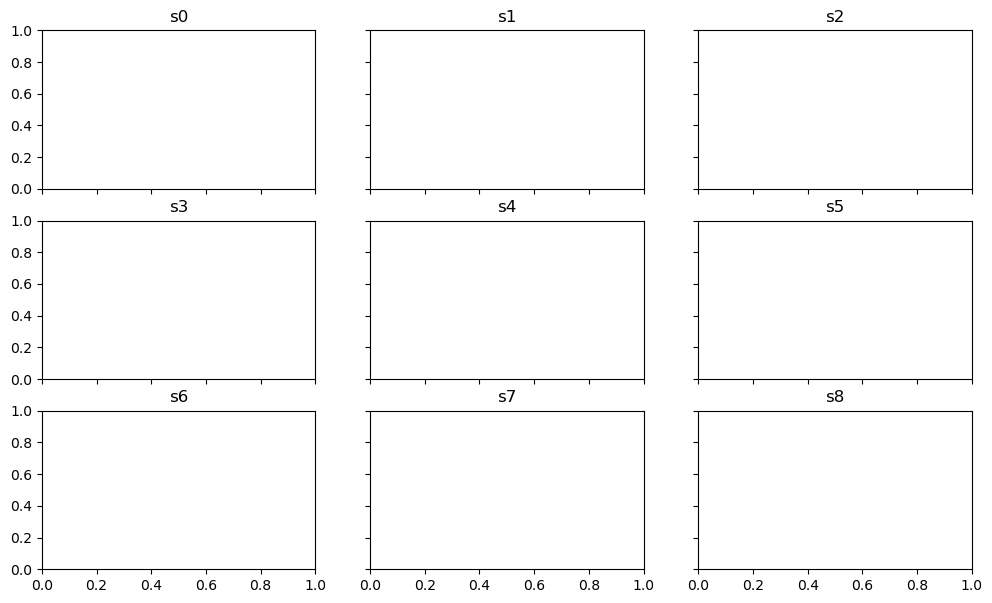

In [230]:
fig, ax = plt.subplots(3,3,figsize=(12,7),sharex=True,sharey=True)

for axis, s in zip(ax.reshape(-1),(['s' + str(x) for x in range(0,10)])):
  axis.set_title(s)

plt.show()


# Tipos de Grafico

## plt.plot

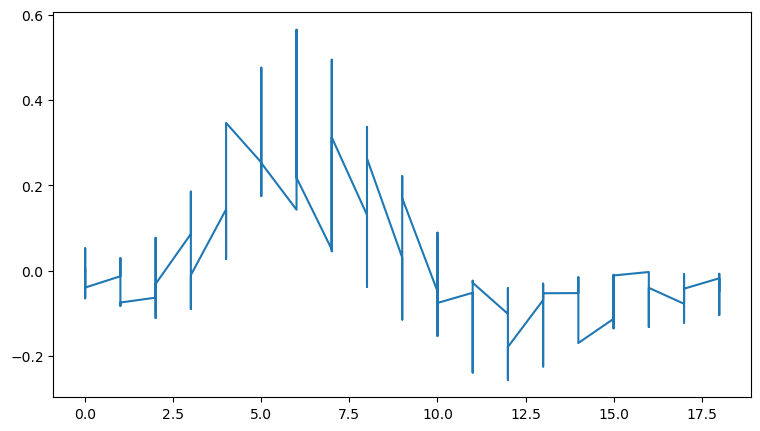

In [231]:
fig = plt.figure(figsize=(9,5))

mask = (df1.event == 'stim') & (df1.region == 'parietal')
x = df1[mask].timepoint
y = df1[mask].signal

plt.plot(x,y)
plt.show()

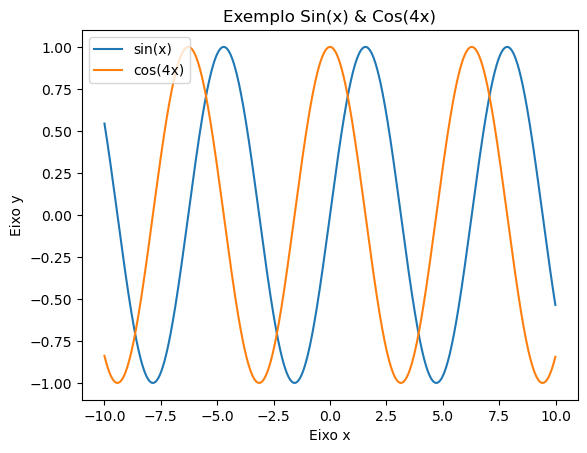

In [232]:
x = np.arange(-10,10,0.01)

plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(4x)')
# plt.plot(x, np.cos(4*x), label='cos(4x)')

plt.title('Exemplo Sin(x) & Cos(4x)')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.legend()

plt.show()

#### CUIDADOS

##### Gráfico com mais de um valor em x (1x mais de um valor em y)

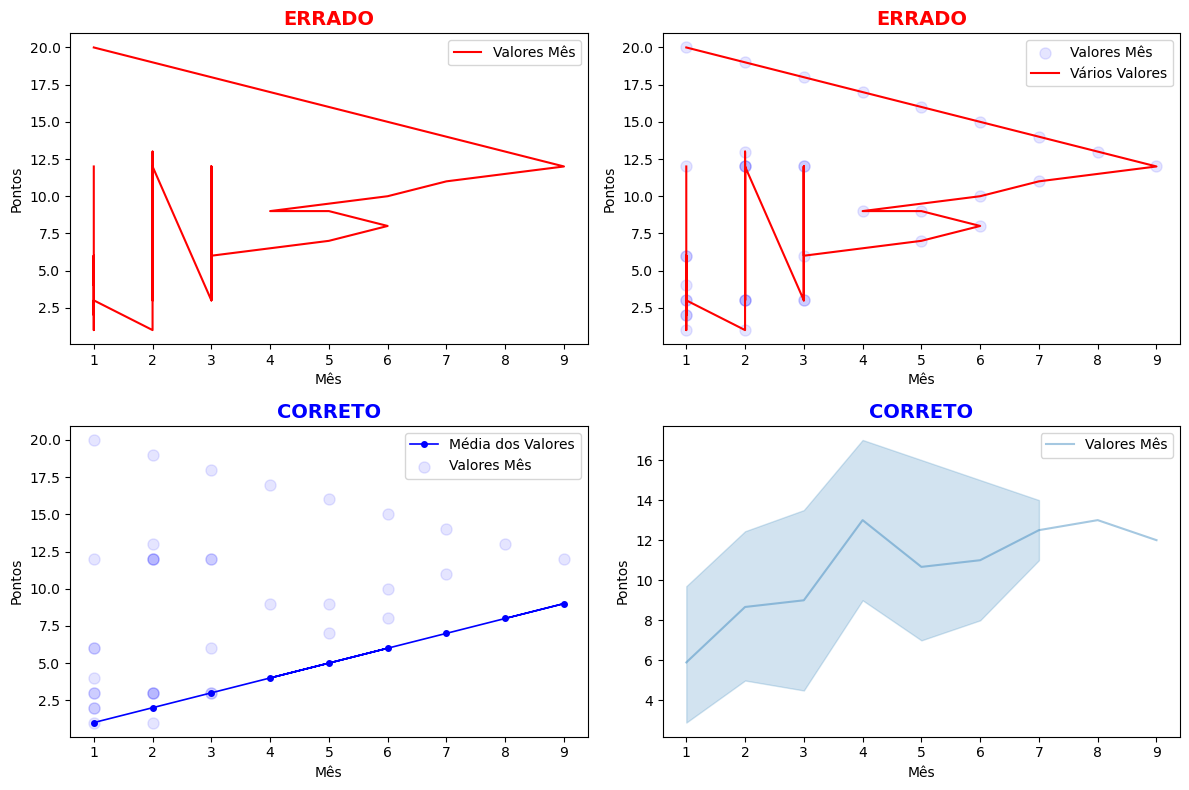

In [233]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,8),sharex=True,sharey=True)

plt.subplot(2,2,1)
x = [1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,5,6,5,4,6,7,9,8,7,6,5,4,3,2,1]
y = [12,3,2,6,4,6,2,1,3,1,3,12,3,13,12,3,12,3,12,3,12,6,7,8,9,9,10,11,12,13,14,15,16,17,18,19,20]
df = pd.DataFrame({'x': x, 'y': y})
plt.plot(df.x, df.y, label='Valores Mês', color='r')

plt.title("ERRADO", fontsize=14, weight='bold', color='r')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.subplot(2,2,2)

plt.scatter(df.x, df.y, label='Valores Mês', marker='o', color='b', alpha=0.1, s=64)
plt.plot(df.x, df.y, label='Vários Valores', color='r')

plt.title("ERRADO", fontsize=14, weight='bold', color='r')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.subplot(2,2,3)

# CALCULO DA MEDIA DE CADA VALOR DE X
yerr = []
ymean = []
for x in df.x.unique():
  yerr.append(df[df.x == x]['x'].std())
  ymean.append(df[df.x == x]['x'].mean())
yerr = np.array(yerr)
ymean = np.array(ymean)


plt.plot(df.x.unique(), ymean, label='Média dos Valores', marker='o', color='b', linewidth=1.2, markersize=4)
plt.scatter(df.x, df.y, label='Valores Mês', marker='o', color='b', alpha=0.1, s=64)

plt.title("CORRETO", fontsize=14, weight='bold', color='b')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.subplot(2,2,4)

sns.lineplot(x=df.x, y=df.y, label='Valores Mês', alpha=0.4)

plt.title("CORRETO", fontsize=14, weight='bold', color='b')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.tight_layout()
plt.show()

##### Cuidado Valores sem ordem + plot

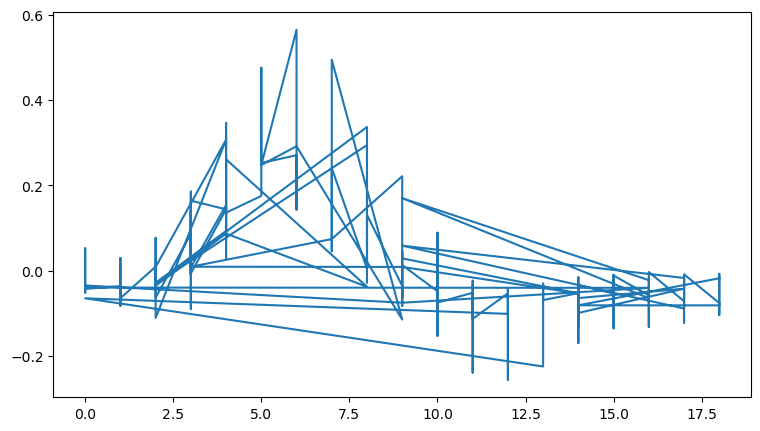

In [234]:
fig = plt.figure(figsize=(9,5))

mask = (fmri.event == 'stim') & (fmri.region == 'parietal')
x = fmri[mask].timepoint
y = fmri[mask].signal

plt.plot(x,y)
plt.show()

In [235]:
df1 = df1.sort_values('timepoint')
fig = plt.figure(figsize=(9,5))

mask = (df1.event == 'stim') & (df1.region == 'parietal')
x = df1[mask].timepoint
y = df1[mask].signal

plt.plot(x,y)
plt.show()

## plt.scatter()

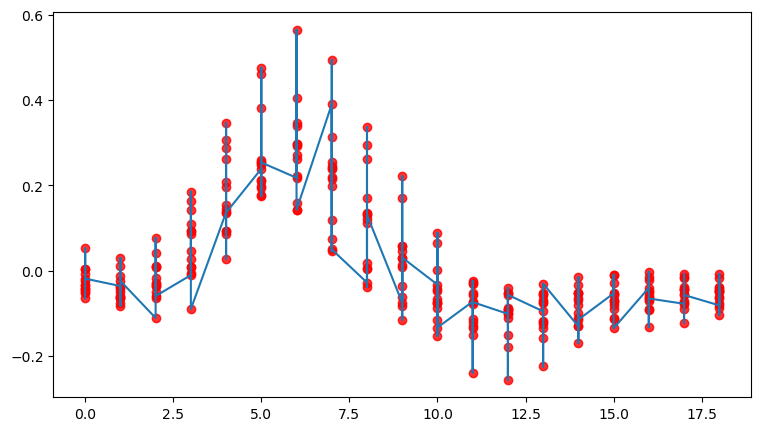

In [236]:
fig = plt.figure(figsize=(9,5))

mask = (df1.event == 'stim') & (df1.region == 'parietal')
x = df1[mask].timepoint
y = df1[mask].signal

plt.plot(x,y)
plt.scatter(x,y,color='r',alpha=0.8)
plt.show()

## sns.lineplot()
plota com o intervalo de confiança

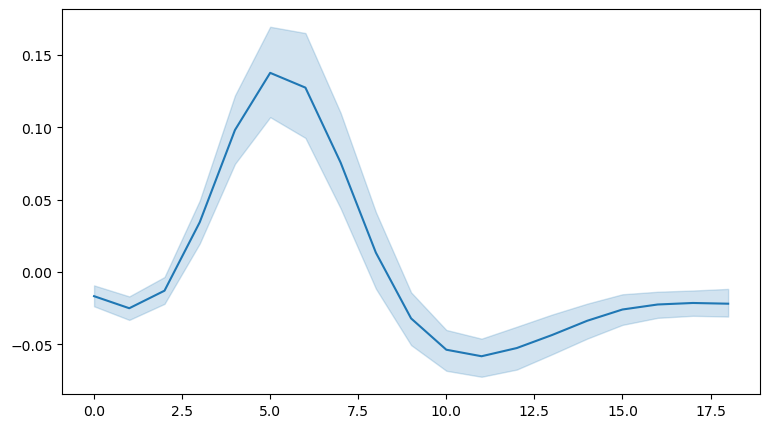

In [237]:
fig = plt.figure(figsize=(9,5))

x = df1.timepoint
y = df1.signal

sns.lineplot(x=x,y=y)

plt.xlabel(None)
plt.ylabel(None)
plt.show()

## Grafico de Barras


TypeError: 'str' object is not callable

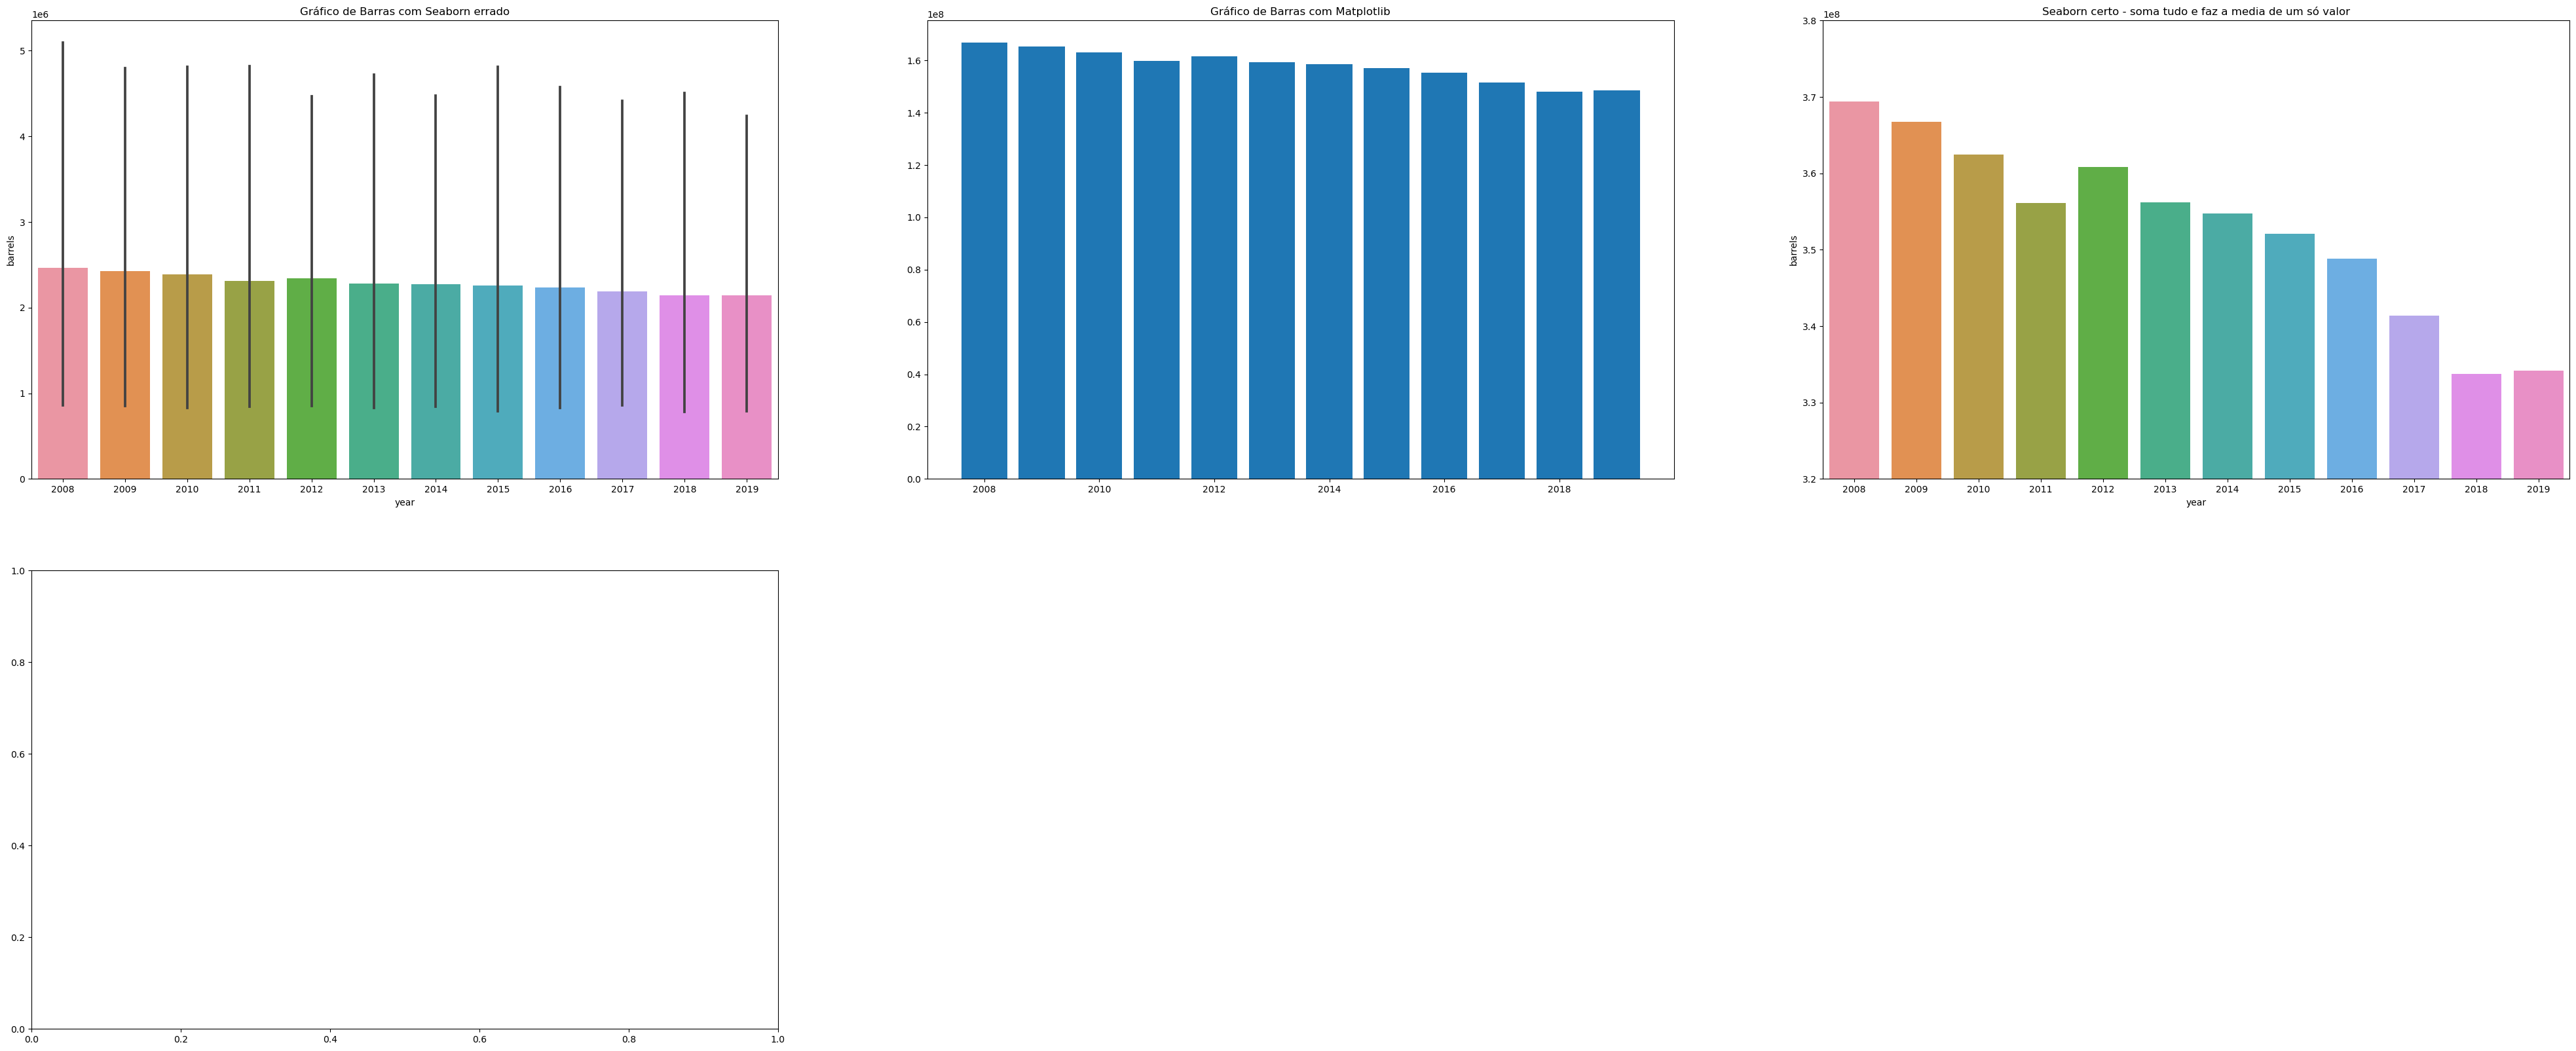

In [238]:
plt.figure(figsize=(50,20))

plt.subplot(2,3,1)

sns.barplot(x='year', y='barrels', data=beer).set_title('Gráfico de Barras com Seaborn errado')
plt.subplot(2,3,2)

plt.bar(x='year', height='barrels', data=beer)
plt.title('Gráfico de Barras com Matplotlib')

plt.subplot(2,3,3)

# sns.barplot(x='year', y='barrels', data=beer.groupby('year')[['barrels']].sum()).set_title('Gráfico de Barras com Seaborn certo') # funciona no colab do google
sns.barplot(x='year', y='barrels', data=beer.groupby('year')[['barrels']].sum().reset_index()).set_title('Seaborn certo - soma tudo e faz a media de um só valor')
plt.ylim([32e7, 38e7])

plt.subplot(2,3,4)

sns.barplot(x='year', y='barrels', data=beer, estimator='max' ).set_title('Seaborn Corrigido Estimator')
plt.subplot(2,3,5)


plt.bar(x='year', height='barrels', data=beer, alpha = 0.5) # mostra o valor max sobrescrevendo os demais

plt.tight_layout()
plt.show()

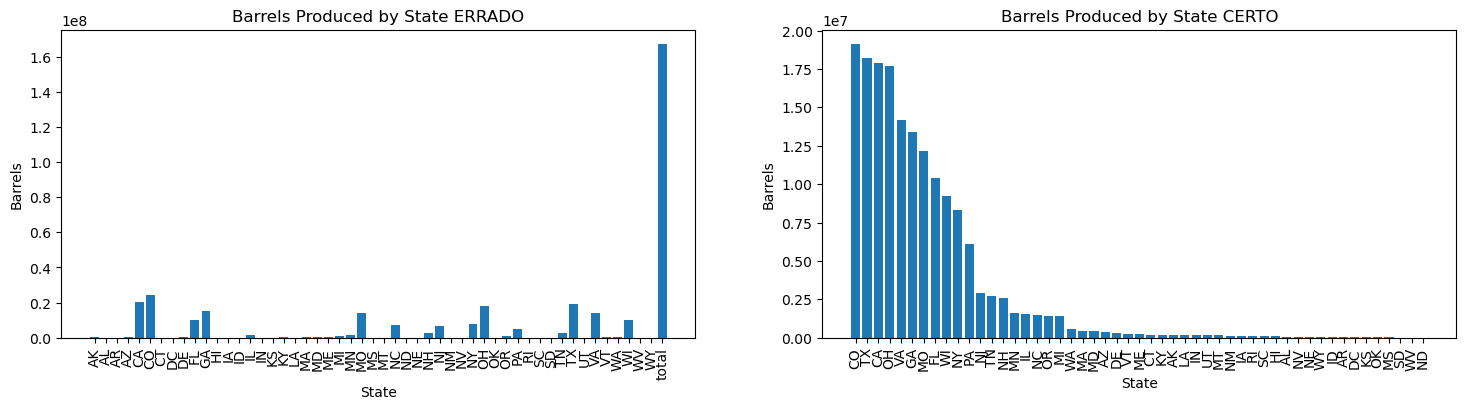

In [239]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)

plt.bar(beer.state, beer.barrels)
plt.xlabel('State')
plt.ylabel('Barrels')
plt.title('Barrels Produced by State ERRADO')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
beer_barrels_by_state = beer[ (beer.state != 'total') & (beer.year == 2019) ].groupby('state')['barrels'].sum().sort_values(ascending=False)

plt.bar(beer_barrels_by_state.index, beer_barrels_by_state.values)
plt.xlabel('State')
plt.ylabel('Barrels')
plt.title('Barrels Produced by State CERTO')
plt.xticks(rotation=90)
plt.show()


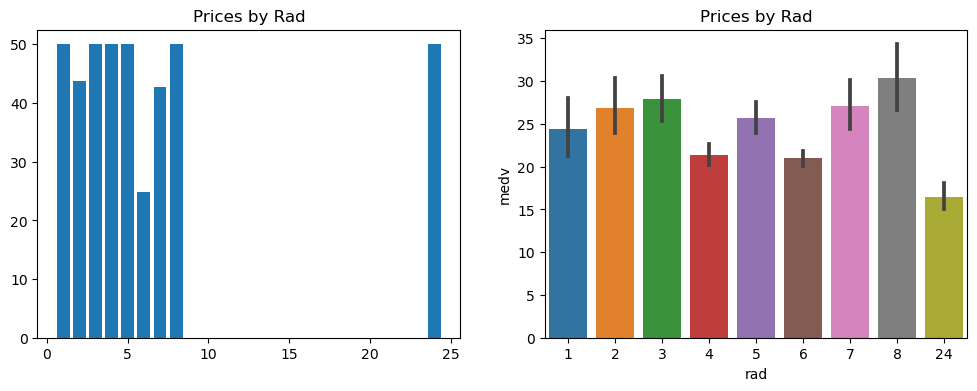

In [240]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

# depois tente empregar boston2 no matplotlib e entenda a diferença
# boston2 = boston.copy()
# boston2.rad = boston.rad.astype('str')


ax[0].bar(x='rad',height='medv',data=boston)
ax[0].set_title('Prices by Rad')

sns.barplot(x='rad',y='medv',data=boston,ax=ax[1])
ax[1].set_title('Prices by Rad')

plt.show()

### Classificando em categorias

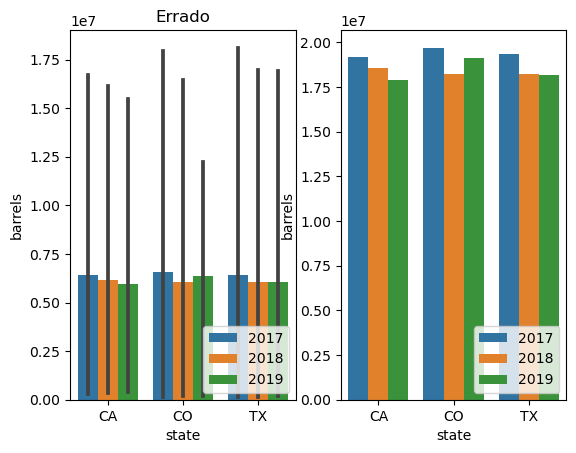

In [241]:
plt.subplot(1,2,1)

sns.barplot(x = 'state', y = 'barrels', hue = 'year',
            data = beer[beer['state'].isin(['TX', 'CO', 'CA']) & (beer['year'] >= 2017)]).set_title('Errado')
plt.legend(loc='lower right')


plt.subplot(1,2,2)
beer_3 = beer[beer['state'].isin(['TX', 'CO', 'CA']) & (beer['year'] >= 2017)].groupby(['state', 'year'])['barrels'].sum().reset_index()
sns.barplot(x = 'state', y = 'barrels', hue = 'year', data = beer_3)
plt.legend(loc='lower right')
plt.show()
plt.show()

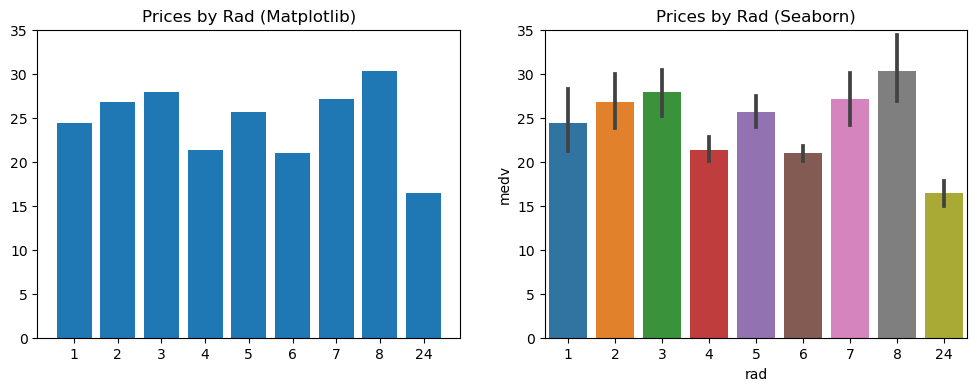

In [242]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
boston_group= boston.groupby('rad').medv.mean()
ax[0].bar(x=np.arange(0,len(boston_group)),height=boston_group)
ax[0].set_xticks(np.arange(0,len(boston_group)), labels=boston_group.index)
ax[0].set_title('Prices by Rad (Matplotlib)')
ax[0].set_ylim([0,35])

sns.barplot(x='rad',y='medv',data=boston,ax=ax[1])
ax[1].set_title('Prices by Rad (Seaborn)')
ax[1].set_ylim([0,35])

plt.show()

In [243]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine[wine.country == 'Brazil'].province, y=wine[wine.country == 'Brazil'].price)
plt.title('Brazil Wine Prices')
plt.hlines(wine.price.mean(),-0.5,7.5,color='r',linestyles=':')
plt.text(0, wine.price.mean()+1,'Média de Preço dos Vinhos Avaliados')
plt.xticks(rotation=45)
plt.show()

CUIDADO

Novamente a visualização falha em mostrar adequadamente os dados, mas aqui o refinamento é bastante simples e basta reconfigurarmos os limites do eixo de pontos.

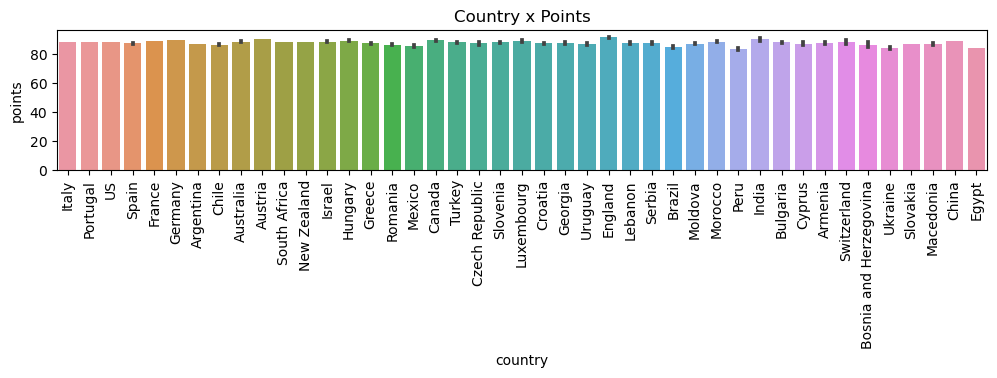

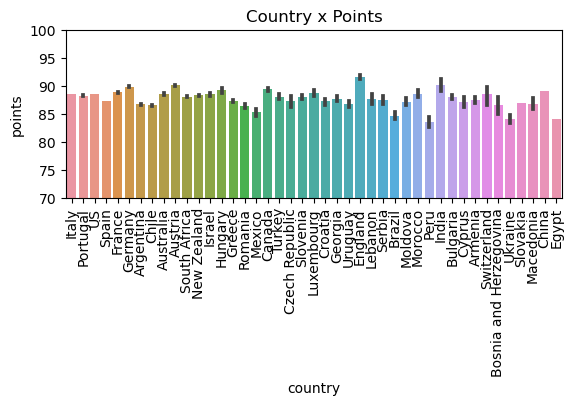

In [244]:
plt.figure(figsize=(12,4))

plt.subplot(2,1,1)
sns.barplot(x=wine.country, y=wine.points)
plt.title('Country x Points')
plt.xticks(rotation=90)
plt.show()

plt.subplot(2,1,2)
sns.barplot(x='country', y='points', data=wine)
plt.title('Country x Points')
plt.xticks(rotation=90)
plt.ylim([70,100])
plt.show()

##### Enfeites

In [245]:
# Basico
plt.figure(figsize=(4,3))
energy_type = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = [5, 6, 15, 22, 24, 8]
consumo = [4.5, 30, 30, 12, 14, 6.7]

plt.bar(energy_type, energy, color='green',alpha=0.8, label='energy')
plt.legend()
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various sources", fontsize=14, weight='bold')

plt.show()

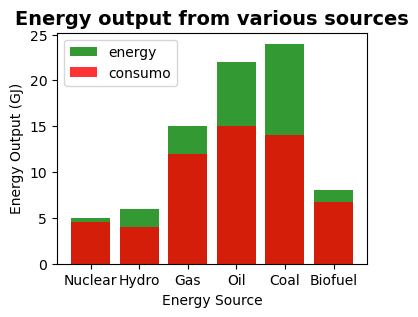

In [246]:
# Sobreposição de barras
plt.figure(figsize=(4,3))
energy_type = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = [5, 6, 15, 22, 24, 8]
consumo = [4.5, 4, 12, 15, 14, 6.7]

plt.bar(energy_type, energy, color='green',alpha=0.8, label='energy')
plt.bar(energy_type, consumo, color='red',alpha=0.8,label='consumo')
plt.legend()
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various sources", fontsize=14, weight='bold')

plt.show()

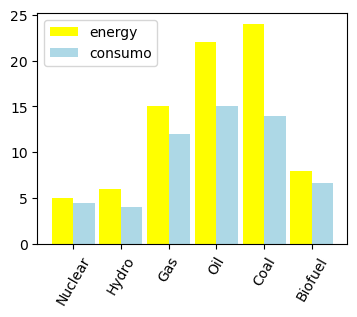

In [247]:
# barras paralelas

plt.figure(figsize=(4,3))

ind = np.arange(len(energy))
barwidth = 0.45

plt.bar(ind, energy, barwidth, label='energy', color='yellow')
plt.bar(ind + barwidth, consumo, barwidth, label='consumo', color='lightblue')

plt.xticks(ind + barwidth / 2,energy_type, rotation=60)
plt.legend()


plt.show()
#  seaborn com hue.

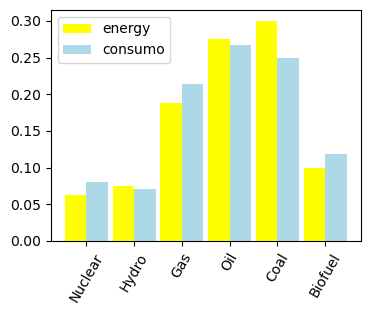

In [248]:
# Porporcional

plt.figure(figsize=(4,3))

ind = np.arange(len(energy))
barwidth = 0.45

plt.bar(ind, np.array(energy)/np.array(energy).sum(), barwidth, label='energy', color='yellow')
plt.bar(ind + barwidth, np.array(consumo)/np.array(consumo).sum(), barwidth, label='consumo', color='lightblue')

plt.xticks(ind + barwidth / 2,energy_type, rotation=60)
plt.legend()


plt.show()

In [249]:
sns.barplot(x='species',y='body_mass_g',hue='sex',data=penguins)
plt.show()

AttributeError: 'Rectangle' object has no property 'errorbar'

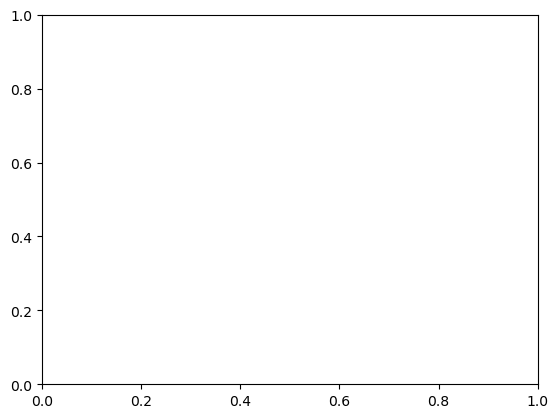

In [250]:
ax = sns.barplot(x='species',y='body_mass_g',data=penguins, errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
ax.plot(2, 5700, "*", markersize=20, color="r")

plt.show()

## Histogramas

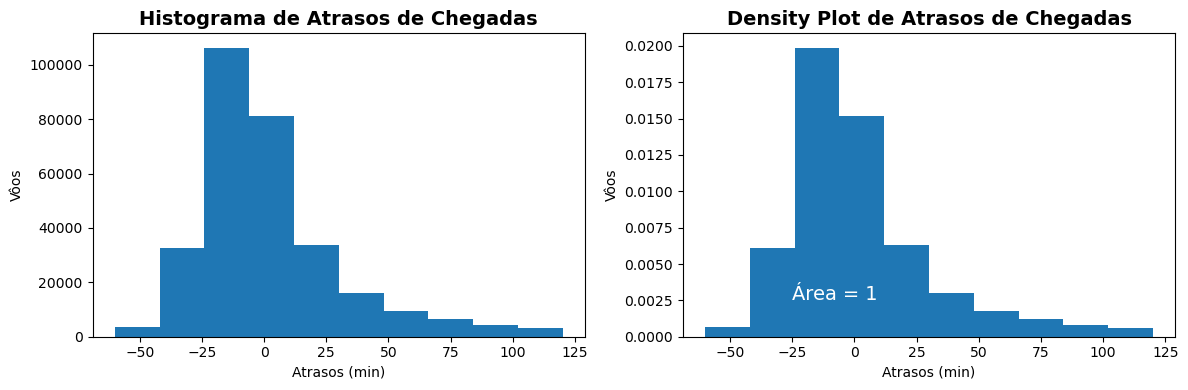

In [251]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(flights['arr_delay'])

# Anotações
plt.title('Histograma de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'],density='True')

# Anotações
plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.text(-25,0.0025,'Área = 1',c='white',fontsize=14)

plt.tight_layout()
plt.show()

In [252]:
df = penguins
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

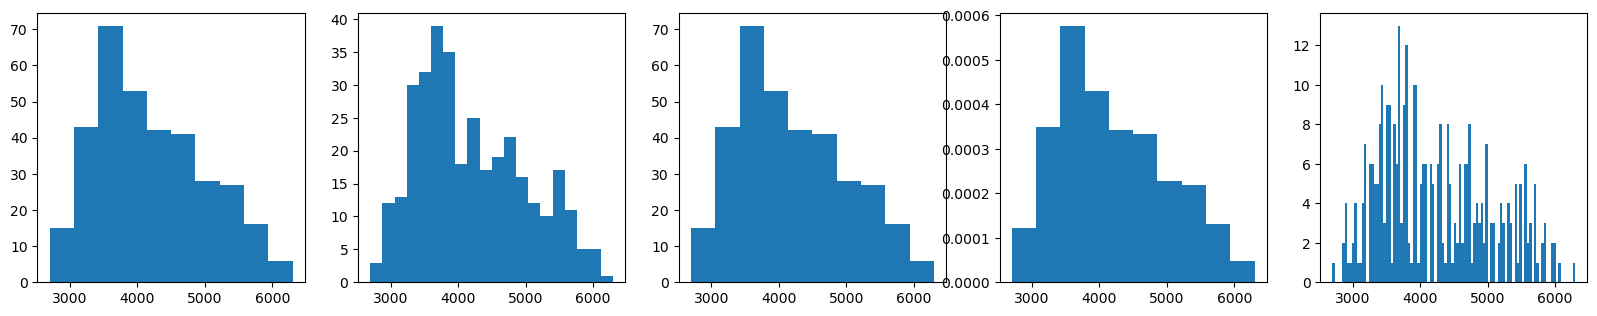

(array([15., 43., 71., 53., 42., 41., 28., 27., 16.,  6.]),
 array([2700., 3060., 3420., 3780., 4140., 4500., 4860., 5220., 5580.,
        5940., 6300.]))

In [253]:
# plt.figure(figsize=(4,3.5))
plt.figure(figsize=(20,3.5))

plt.subplot(1,5,1)
valores = plt.hist(df.body_mass_g)
plt.subplot(1,5,2)
plt.hist(df.body_mass_g, bins=20) # bins numero de colunas
plt.subplot(1,5,3)
plt.hist(df.body_mass_g)

plt.subplot(1,5,4)
plt.hist(df.body_mass_g, density=True) # mostra o valor total da area como 1
plt.subplot(1,5,5)

plt.hist(df.body_mass_g, bins=100)

plt.show()
valores[0], valores[1]

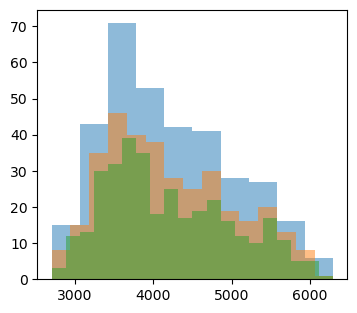

In [254]:
plt.figure(figsize=(4,3.5))
# alpha
plt.hist(df.body_mass_g, alpha=.5)
plt.hist(df.body_mass_g, bins=15, alpha=.5)
plt.hist(df.body_mass_g, bins=20, alpha=.5)

plt.show()

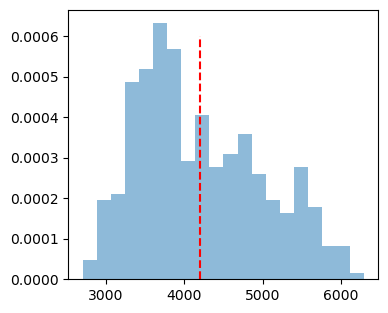

In [255]:
plt.figure(figsize=(4,3.5))

plt.hist(df.body_mass_g, bins=20, density=True, alpha=0.5)
plt.vlines(df.body_mass_g.mean(), 0, 0.0006, color='r', linestyle='dashed')

plt.show()

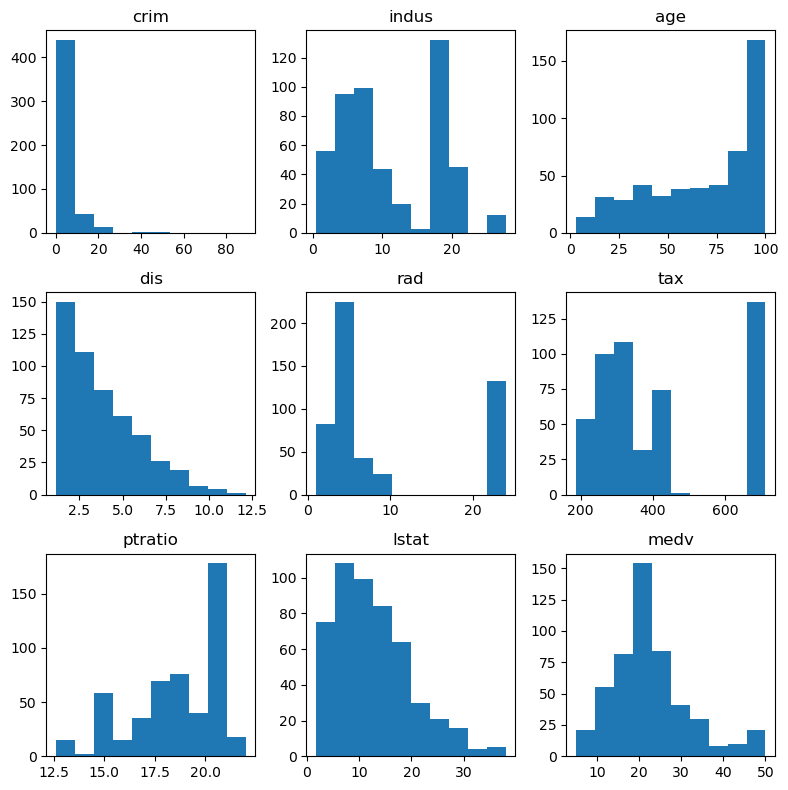

In [256]:
fig, axis = plt.subplots(3,3, figsize=(8,8))

ax = axis.reshape(-1)

cols = ['crim', 'indus', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

for i in range(len(cols)):
  ax[i].hist(boston[cols[i]])
  ax[i].set_title(cols[i])

plt.tight_layout()
plt.show()

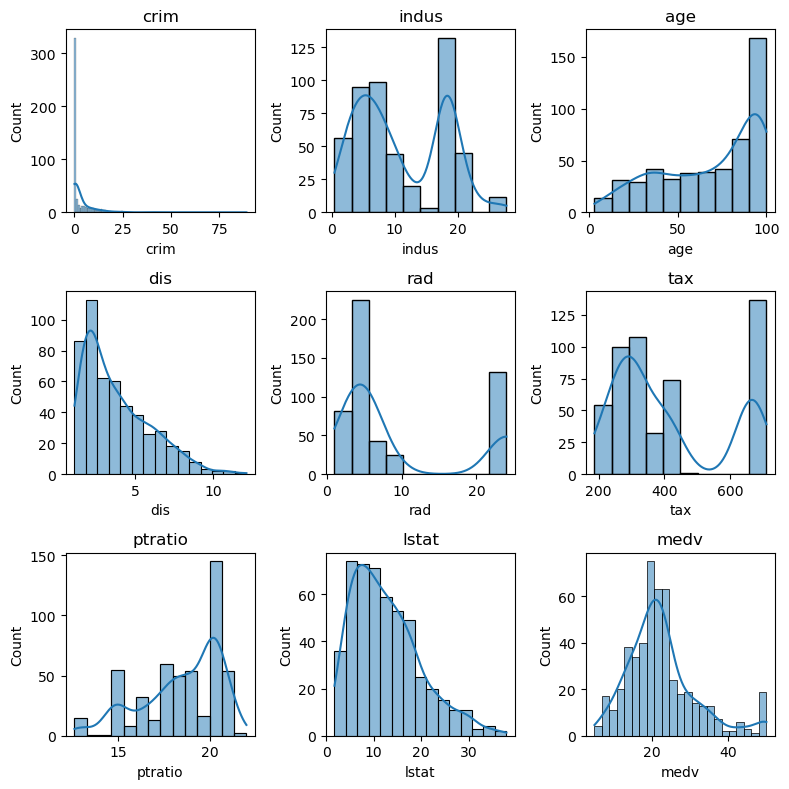

In [257]:
fig, axis = plt.subplots(3,3, figsize=(8,8))

ax = axis.reshape(-1)

cols = ['crim', 'indus', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

for i in range(len(cols)):
  sns.histplot(boston[cols[i]],ax=ax[i],kde=True)
  ax[i].set_title(cols[i])

plt.tight_layout()
plt.show()

#### Histograma Acumulativo



plt.hist(df.body_mass_g, density=True, cumulative=True, bins=20)

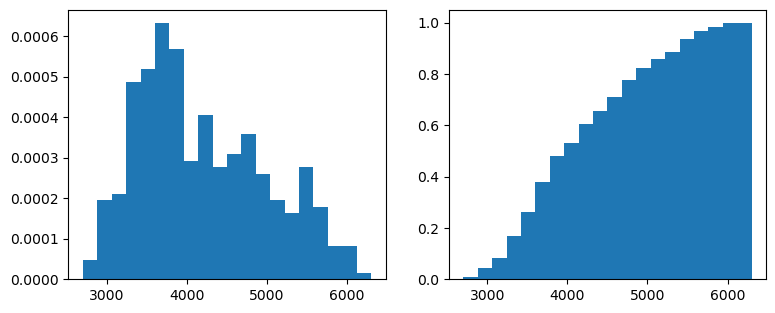

In [258]:
plt.figure(figsize=(9,3.5))

plt.subplot(1,2,1)
plt.hist(df.body_mass_g, density=True, bins=20)

plt.subplot(1,2,2)
plt.hist(df.body_mass_g, density=True, cumulative=True, bins=20)

plt.show()

In [259]:
plt.figure(figsize=(12,4))

binwidth=5
interval =600
plt.subplot(1,2,1)
plt.hist(flights['arr_delay'],bins=int(interval/binwidth),edgecolor = 'lightblue',cumulative=True,alpha=0.5)

plt.axvline(15,linewidth=1,linestyle='-.',color='darkred')
plt.axhline(240000, linewidth=1,linestyle='-.',color='darkred')
plt.plot(15,240000,'o',color='darkred')
plt.text(19, 210000, '~ 240.000 vôos', fontsize=14,color='w')
plt.text(19, 190000, 'com até 15min de atraso', fontsize=14,color='w')

# Anotações
plt.title('Acumulado de Atrasos', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'],density='True',bins=int(interval/binwidth),edgecolor = 'lightblue',cumulative=True,alpha=0.5)

# Anotações
plt.title('Probabilidade Acumulada de Atrasos', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.axvline(15,linewidth=1,linestyle='-.',color='darkred')
plt.axhline(0.8, linewidth=1,linestyle='-.',color='darkred')
plt.plot(15,0.8,'o',color='darkred')
plt.text(19, 0.7, 'P(x<=15min) ~ 0.8', fontsize=14,color='w')

plt.tight_layout()
plt.show()

#### Seaborn

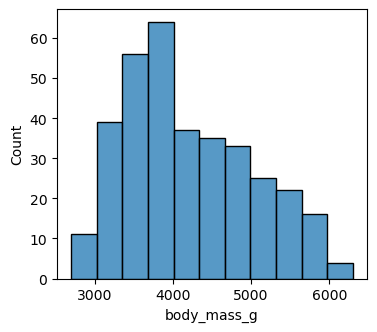

In [260]:
plt.figure(figsize=(4,3.5))

sns.histplot(df.body_mass_g)

plt.show()

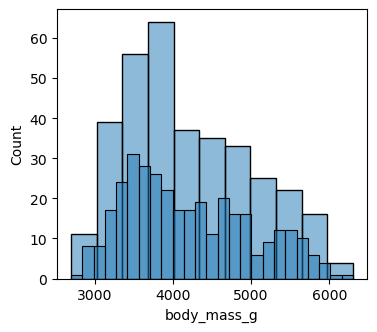

In [261]:
plt.figure(figsize=(4,3.5))

sns.histplot(df.body_mass_g,alpha=0.5)
sns.histplot(df.body_mass_g,bins=25,alpha=0.5)

plt.show()

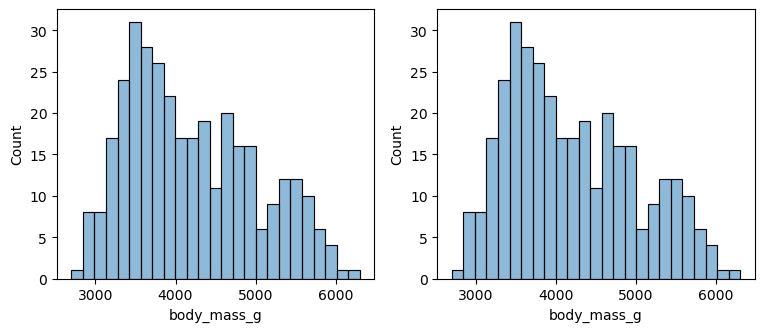

In [262]:
#Usando e não usando data=
plt.figure(figsize=(9,3.5))

plt.subplot(1,2,1)
sns.histplot(df.body_mass_g,bins=25,alpha=0.5)

plt.subplot(1,2,2)
sns.histplot(x='body_mass_g',data=df,bins=25,alpha=0.5)

plt.show()

Seaborn hue  ×  Matplotlib

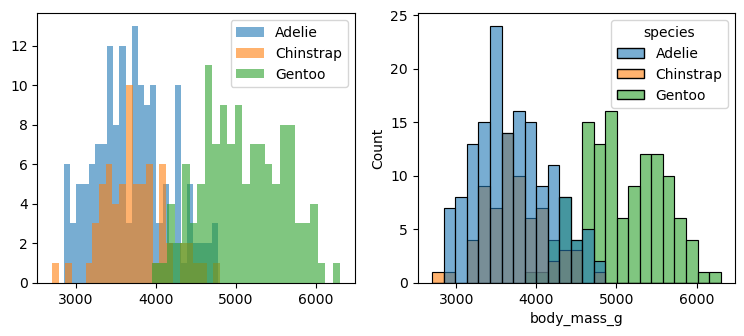

In [263]:
plt.figure(figsize=(9,3.5))

plt.subplot(1,2,1)
for s in df.species.unique():
  plt.hist(df[ df.species == s ].body_mass_g, bins=25, alpha=0.6,label=s)

plt.legend()

plt.subplot(1,2,2)
sns.histplot(x='body_mass_g',data=df,hue='species',bins=25,alpha=0.6)

plt.show()

###### Lembre de com empregar ax no Seaborn e Matplotlib

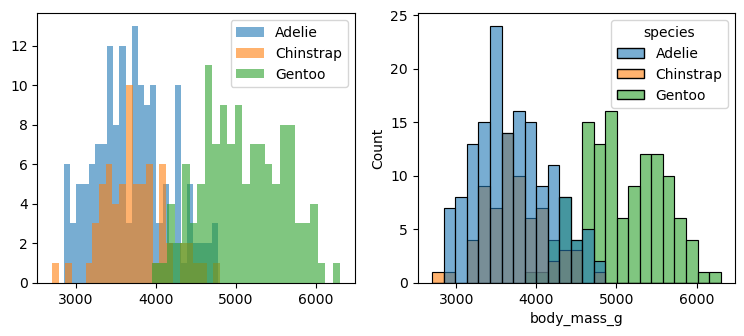

In [264]:
fig, ax = plt.subplots(1,2,figsize=(9,3.5))

for s in df.species.unique():
  ax[0].hist(df[ df.species == s ].body_mass_g, bins=25, alpha=0.6,label=s)

ax[0].legend()

sns.histplot(x='body_mass_g',data=df,hue='species',bins=25,alpha=0.6,ax=ax[1])

plt.show()

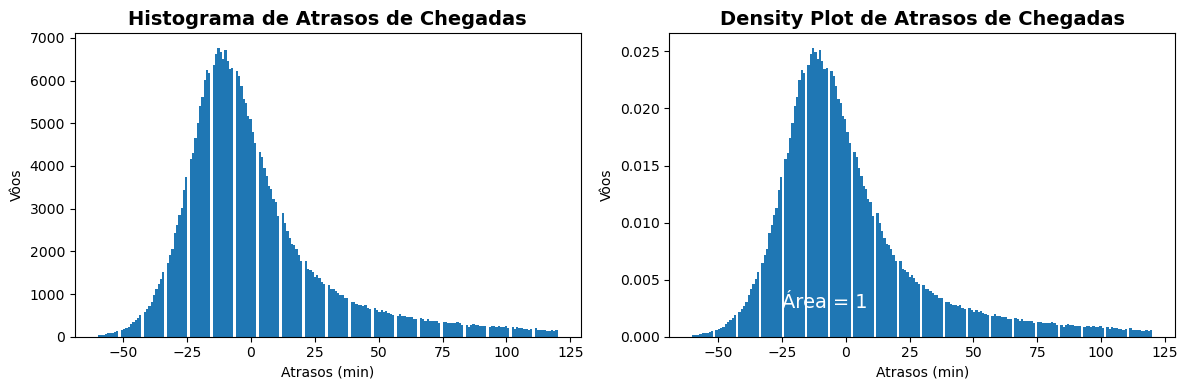

In [265]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(flights['arr_delay'],bins=200)

# Anotações
plt.title('Histograma de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'],density='True',bins=200)

# Anotações
plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.text(-25,0.0025,'Área = 1',c='white',fontsize=14)

plt.tight_layout()
plt.show()

In [266]:
plt.figure(figsize=(12,8))

for i, binwidth in enumerate([15, 10, 5, 1]):
  plt.subplot(2, 2, i + 1)

  interval = flights['arr_delay'].max() - flights['arr_delay'].min()
  plt.hist(flights['arr_delay'],bins=int(interval/binwidth),edgecolor = 'lightblue')

  # Anotações
  plt.title('Atrasos de Chegadas Binwidth = %d' % binwidth, fontsize=14, weight='bold')
  plt.xlabel('Atrasos (min)')
  plt.ylabel('Vôos')

plt.tight_layout()
plt.show()

Os bins correspondem a quantidade dos intervalos de valores que estamos interessados. A medida que aumentamos a quantidade de intervalos o gráfico de barras se aproxima de um gráfico de valores contínuos.

Você também pode definir bins com intervalos de diferentes tamanhos, e fica evidente nos gráficos abaixo a maior probabilidade de vôos adiantados que com atraso. Neste caso você não pode esperar a mesma forma nos dois gráficos.

In [267]:
# top3 e low3 Companhias
companhias = pd.Series(flights.groupby('name')['name'].count())
companhias = companhias.sort_values(ascending=False)
top3 = companhias.index[:3]
low3 = companhias.index[-3:]

print('Top 3 Companhias', top3)
print('Low 3 Companhias', low3)

Top 3 Companhias Index(['United Air Lines Inc.', 'JetBlue Airways',
       'Atlantic Southeast Airlines'],
      dtype='object', name='name')
Low 3 Companhias Index(['Frontier Airlines Inc.', 'Hawaiian Airlines Inc.',
       'Skywest Airlines Inc.'],
      dtype='object', name='name')


In [268]:
from scipy.stats import kde

/tmp/ipykernel_123922/3093411278.py:18: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(serie)


/tmp/ipykernel_123922/3093411278.py:48: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(serie)


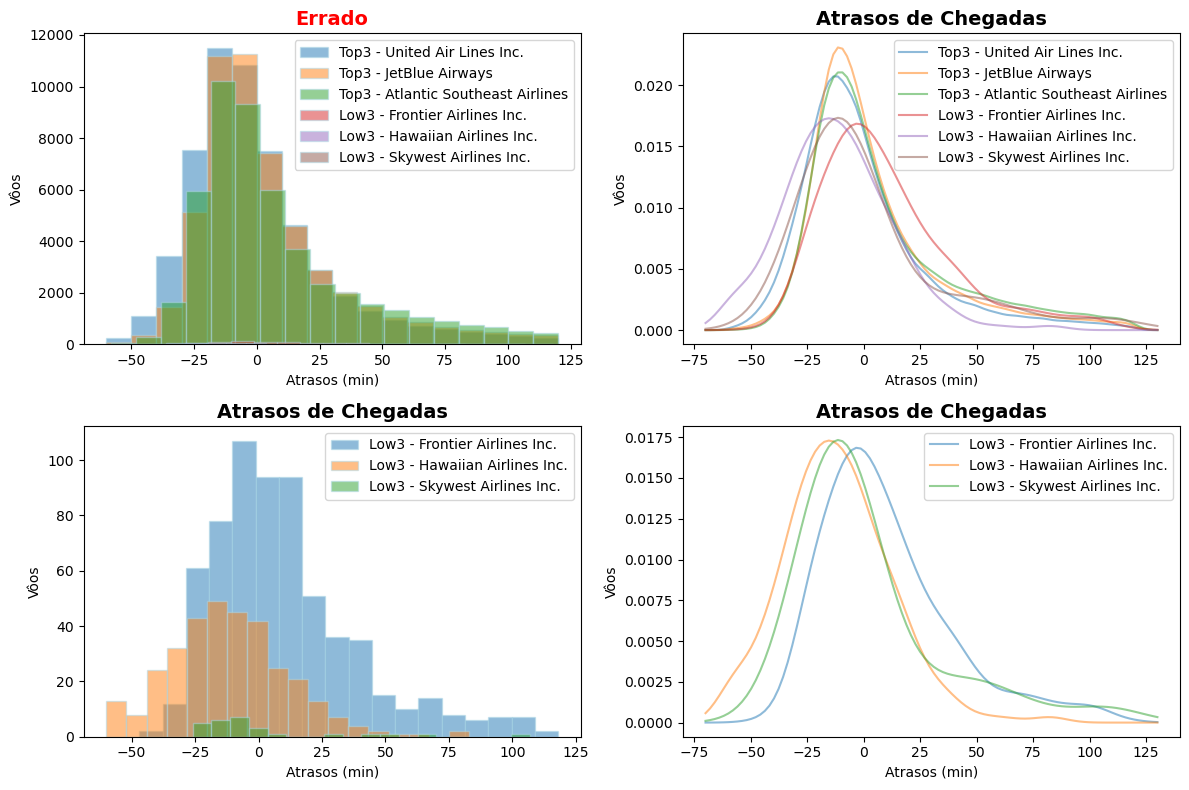

In [269]:
plt.figure(figsize=(12,8))

binwidth=10

plt.subplot(2,2,1)
for companhia in top3:
  plt.hist(flights[ flights.name == companhia ]['arr_delay'], bins=int(interval/binwidth), edgecolor = 'lightblue',alpha=0.5,label='Top3 - ' + companhia)
for companhia in low3:
  plt.hist(flights[ flights.name == companhia ]['arr_delay'], bins=int(interval/binwidth), edgecolor = 'lightblue',alpha=0.5,label='Low3 - ' + companhia)

# Anotações
plt.title('Errado', fontsize=14, weight='bold', color='r')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

def density(serie, xmin=0, xmax=100, intervals=100):
  density = kde.gaussian_kde(serie)
  x = np.linspace(xmin,xmax,100)
  y = density(x)
  return x, y

plt.subplot(2,2,2)
for companhia in top3:
  x, y = density(flights[ flights.name == companhia ]['arr_delay'],-70,130)
  plt.plot(x,y,alpha=0.5,label='Top3 - ' + companhia)
for companhia in low3:
  x, y = density(flights[ flights.name == companhia ]['arr_delay'],-70,130)
  plt.plot(x,y,alpha=0.5,label='Low3 - ' + companhia)

# Anotações
plt.title('Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

plt.subplot(2,2,3)
for companhia in low3:
  plt.hist(flights[ flights.name == companhia ]['arr_delay'], bins=int(interval/binwidth), edgecolor = 'lightblue',alpha=0.5,label='Low3 - ' + companhia)

# Anotações
plt.title('Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

def density(serie, xmin=0, xmax=100, intervals=100):
  density = kde.gaussian_kde(serie)
  x = np.linspace(xmin,xmax,100)
  y = density(x)
  return x, y

plt.subplot(2,2,4)
for companhia in low3:
  x, y = density(flights[ flights.name == companhia ]['arr_delay'],-70,130)
  plt.plot(x,y,alpha=0.5,label='Low3 - ' + companhia)

# Anotações
plt.title('Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

plt.tight_layout()
plt.show()

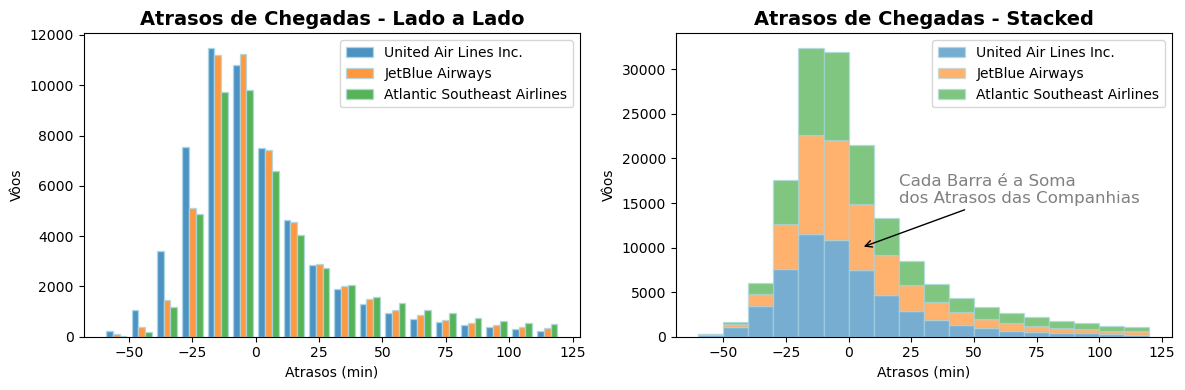

In [270]:
# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) # evita msg de warning para listas com elementos de tamahos diferentes
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
list_hist = []
for companhia in top3:
  list_hist.append(flights[ flights.name == companhia ]['arr_delay'])

plt.hist(list_hist, bins=int(interval/binwidth), edgecolor = 'lightblue',alpha=0.8, label=top3)

# Anotações
plt.title('Atrasos de Chegadas - Lado a Lado', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

plt.subplot(1,2,2)
plt.hist(list_hist, bins=int(interval/binwidth), edgecolor = 'lightblue',alpha=0.6, label=top3, stacked=True)

# Anotações
plt.annotate('Cada Barra é a Soma\ndos Atrasos das Companhias',
             xy=(5, 10000),  # ponto do gráfico
             xytext=(20, 15000),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=12,
             color='grey')

plt.title('Atrasos de Chegadas - Stacked', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

plt.tight_layout()
plt.show()

In [271]:
f, axs = plt.subplots(1,2,figsize=(12,4),sharey=True)

sns.kdeplot(data=flights[ flights.name.isin(low3) ], x='arr_delay', hue='name', shade=True, ax=axs[0])
axs[0].set_title('Atrasos nos Vôos', fontsize=14, weight='bold', color='r')
axs[0].set_xlabel('Atrasos (min)')
axs[0].set_ylabel('Vôos')

sns.kdeplot(data=flights[ flights.name == low3[0] ], x='arr_delay', hue='name', shade=True, ax=axs[1])
axs[1].set_title('Atrasos nos Vôos', fontsize=14, weight='bold')
axs[1].set_xlabel('Atrasos (min)')
axs[1].set_ylabel('Vôos')

# Anotações
axs[0].annotate('Soma Área = 1',
             xy=(0, 0.008),  # ponto do gráfico
             xytext=(60, 0.008),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=14, color='r', weight='bold')
axs[0].annotate('',
             xy=(-20, 0.003),  # ponto do gráfico
             xytext=(60, 0.008),   # posição do texto
             arrowprops=dict(arrowstyle="->"))
axs[0].annotate('',
             xy=(-10, 0.0001),  # ponto do gráfico
             xytext=(60, 0.008),   # posição do texto
             arrowprops=dict(arrowstyle="->"))
axs[1].text(-15, 0.006, 'Área = 1', fontsize=14, color='k')


plt.tight_layout()
plt.show()

In [272]:
plt.figure(figsize=(12,4))
colors = {'Male':'lightblue', 'Female':'r'}
maxin, minin = gdoor.income.agg({'max','min'})

plt.subplot(1,2,1)

for sexo in gdoor.gender.unique():
  plt.hist(gdoor[gdoor.gender == sexo].income, bins=np.arange(minin,maxin,5000), edgecolor = 'white', label=sexo, color=colors[sexo], alpha=0.7)

# Anotações
plt.title('Distribuição de Rendimentos, plt.hist', fontsize=14, weight='bold')
plt.xlabel('Income')
plt.ylabel('Funcionários')
plt.legend()

plt.subplot(1,2,2)

for sexo in gdoor.gender.unique():
  h = np.histogram(gdoor[gdoor.gender == sexo].income, bins=np.arange(minin,maxin,5000))
  plt.bar(x=h[1][1:], height=h[0],  edgecolor = 'white', label=sexo, width=5000, color=colors[sexo], alpha=0.7)

# Anotações
plt.title('Distribuição de Rendimentos, plt.bar', fontsize=14, weight='bold')
plt.xlabel('Income')
plt.ylabel('Funcionários')
plt.legend()

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


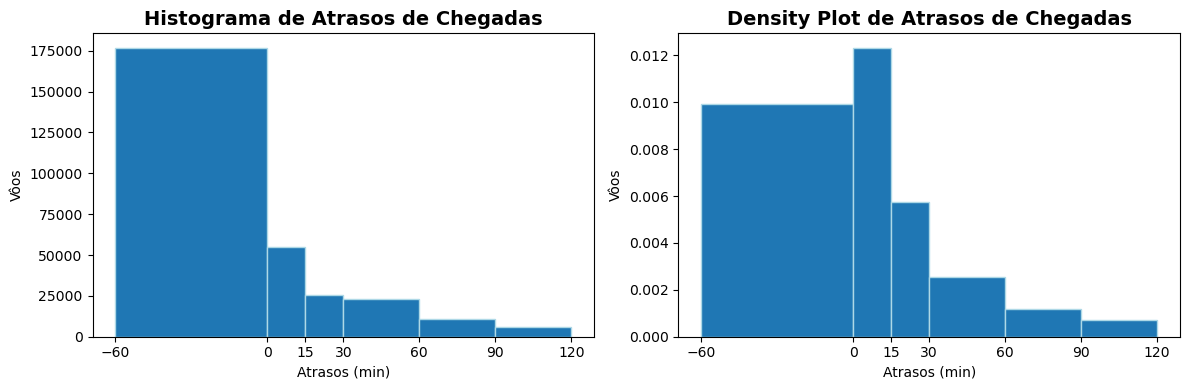

In [273]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(flights['arr_delay'],bins=[-60,0,15,30,60,90,120],edgecolor = 'lightblue')

# Anotações
plt.title('Histograma de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.xticks([-60,0,15,30,60,90,120])

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'],density='True',bins=[-60,0,15,30,60,90,120],edgecolor = 'lightblue')

# Anotações
plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.xticks([-60,0,15,30,60,90,120])

plt.tight_layout()
plt.show()

##### KDE

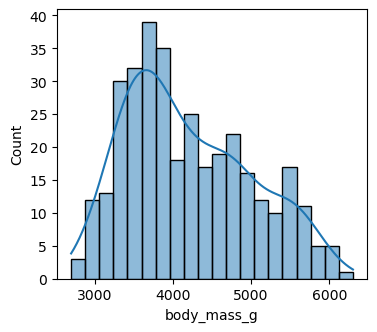

In [274]:
plt.figure(figsize=(4,3.5))

sns.histplot(df.body_mass_g,kde=True,bins=20,alpha=0.5)

plt.show()

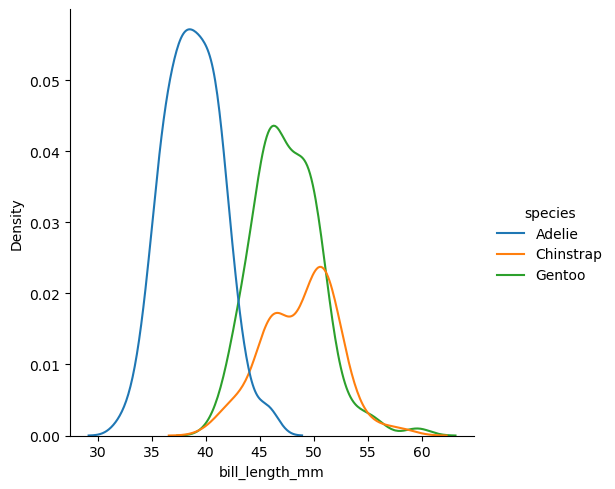

In [275]:
sns.displot(x='bill_length_mm',data=df,hue='species',kind='kde')

plt.show()

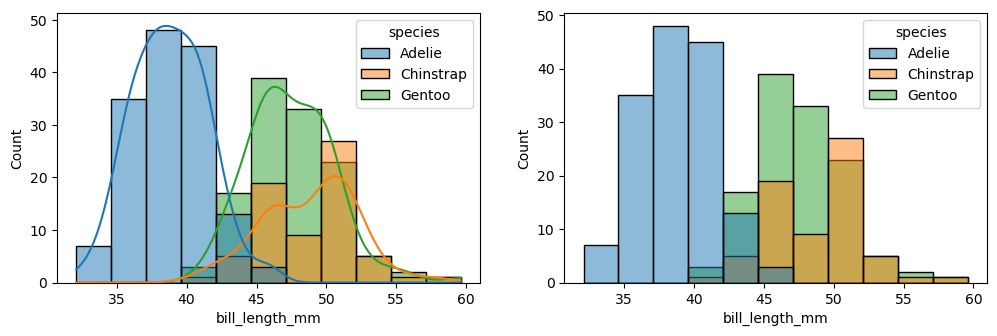

In [276]:
fig, ax = plt.subplots(1,2,figsize=(12,3.5))

sns.histplot(x='bill_length_mm',data=df,hue='species',ax=ax[1])
sns.histplot(x='bill_length_mm',data=df,hue='species',kde=True,ax=ax[0])

plt.show()

/tmp/ipykernel_123922/1043321368.py:2: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(flights['arr_delay'] )


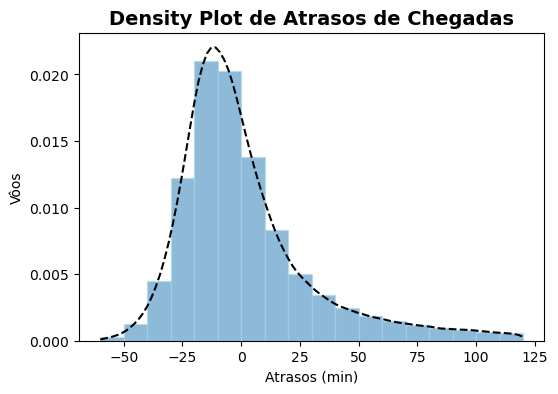

In [277]:
from scipy.stats import kde
density = kde.gaussian_kde(flights['arr_delay'] )
x = np.linspace(-60,120,100)
y = density(x)

plt.figure(figsize=(6,4))

binwidth=10

plt.hist(flights['arr_delay'],density='True',bins=int(interval/binwidth),edgecolor = 'lightblue',alpha=0.5)
plt.plot(x,y,'--k')

# Anotações
plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.show()

/tmp/ipykernel_123922/3294443046.py:2: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(flights[ flights['arr_delay'] > 0]['arr_delay'] )


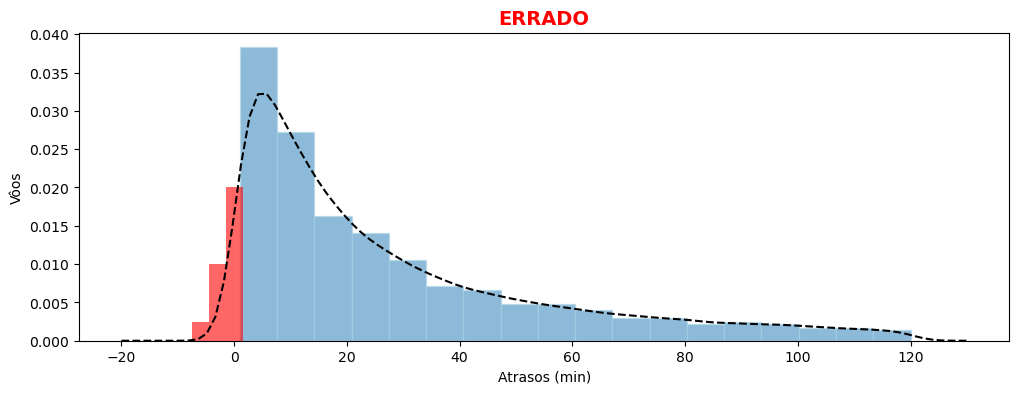

In [278]:
from scipy.stats import kde
density = kde.gaussian_kde(flights[ flights['arr_delay'] > 0]['arr_delay'] )
x = np.linspace(-20,130,100)
y = density(x)

plt.figure(figsize=(12,4))

binwidth=10

plt.hist(flights[ flights['arr_delay'] > 0]['arr_delay'],density='True',bins=int(interval/binwidth),edgecolor = 'lightblue',alpha=0.5)
plt.plot(x,y,'--k')

# Anotações
plt.title("ERRADO", fontsize=14, weight='bold', color='r')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.bar(0,0.02,color='red',width=3,alpha=0.6)
plt.bar(-3,0.01,color='red',width=3,alpha=0.6)
plt.bar(-6,0.0025,color='red',width=3,alpha=0.6)

plt.show()

 curva estimada, buscando uma suavização da curva que corresponde aos dados, pode produzir nos casos em que o valores apresentam um grande salto, intervalos de valores que de fato não existem nos dados.

#### sns.displot()

histplot() (with kind="hist"; the default)

kdeplot() (with kind="kde")

ecdfplot() (with kind="ecdf"; univariate-only)

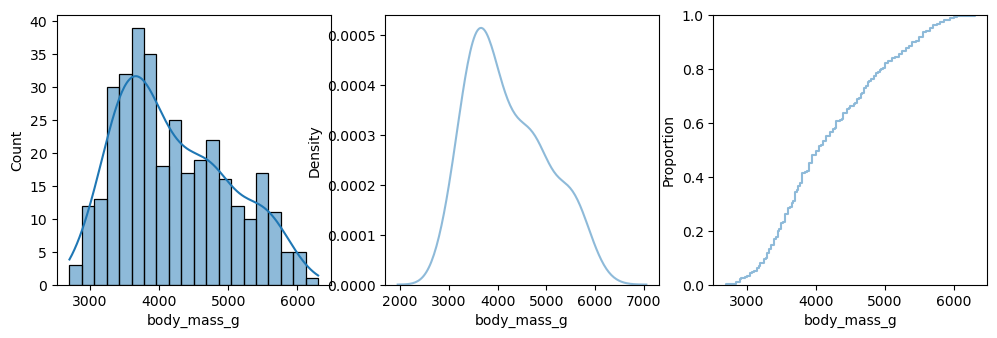

In [279]:
plt.figure(figsize=(12,3.5))

plt.subplot(1,3,1)
sns.histplot(df.body_mass_g,kde=True,bins=20,alpha=0.5)

plt.subplot(1,3,2)
sns.kdeplot(df.body_mass_g,alpha=0.5)

plt.subplot(1,3,3)
sns.ecdfplot(df.body_mass_g,alpha=0.5)

plt.show()

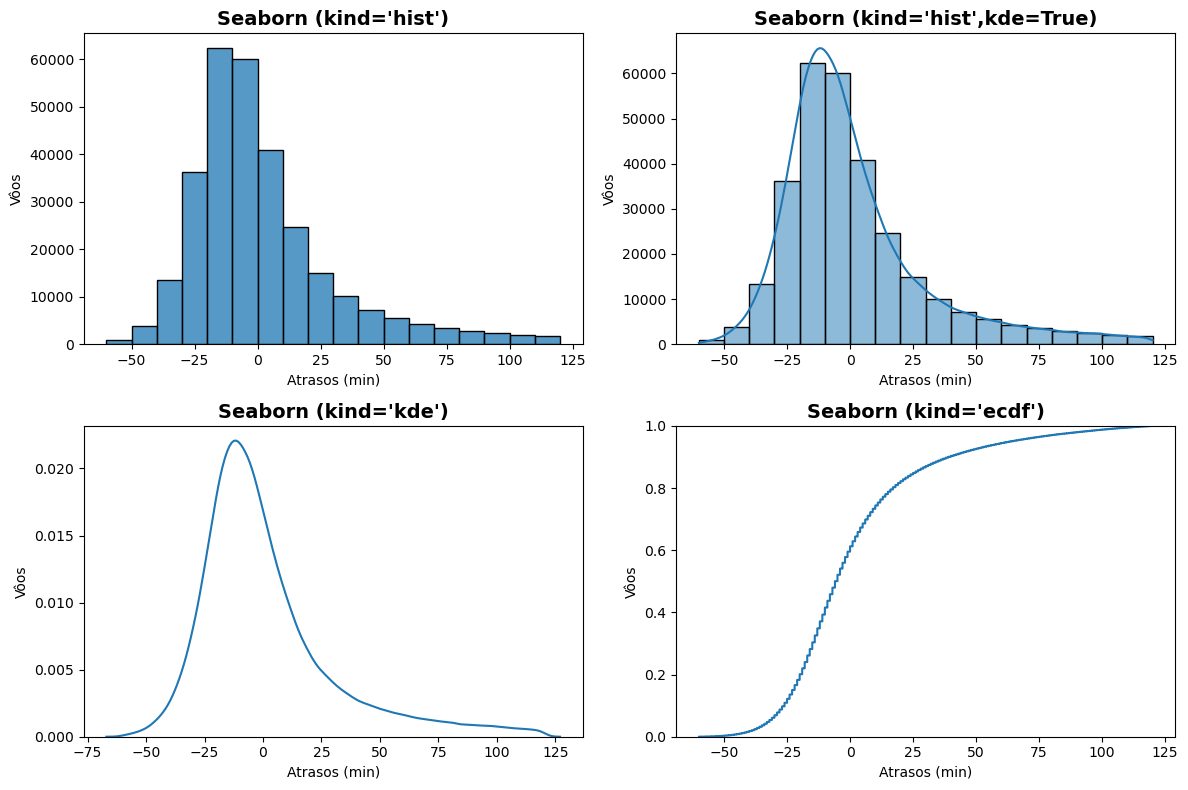

In [280]:
plt.figure(figsize=(12,8))
binwidth=10

plt.subplot(2,2,1)
sns.histplot(data=flights, x='arr_delay', bins=int(interval/binwidth))
plt.title('Seaborn (kind=\'hist\')', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(2,2,2)
sns.histplot(data=flights, x='arr_delay', bins=int(interval/binwidth), kde=True)
plt.title('Seaborn (kind=\'hist\',kde=True)', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(2,2,3)
sns.kdeplot(data=flights, x='arr_delay')
plt.title('Seaborn (kind=\'kde\')', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(2,2,4)
sns.ecdfplot(data=flights, x='arr_delay')
plt.title('Seaborn (kind=\'ecdf\')', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.tight_layout()
plt.show()

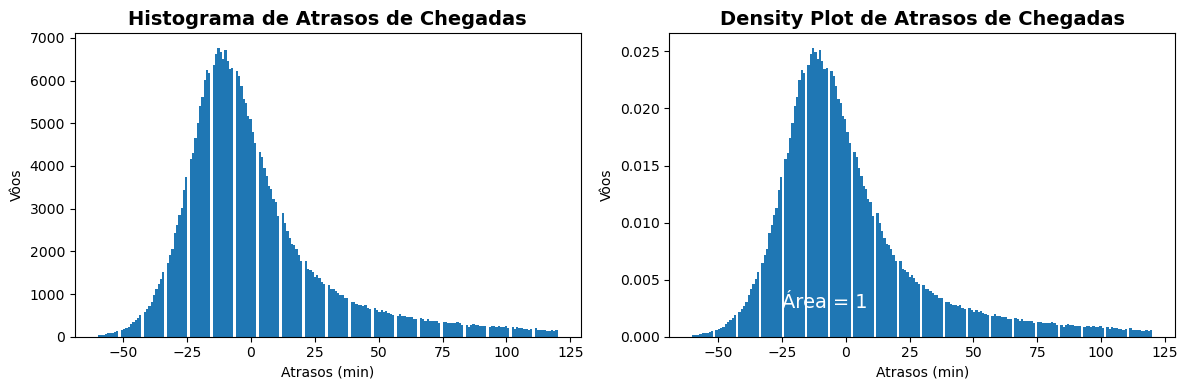

In [281]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(flights['arr_delay'],bins=200)

# Anotações
plt.title('Histograma de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'],density='True',bins=200)

# Anotações
plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.text(-25,0.0025,'Área = 1',c='white',fontsize=14)

plt.tight_layout()
plt.show()

#### Histogramas 2D

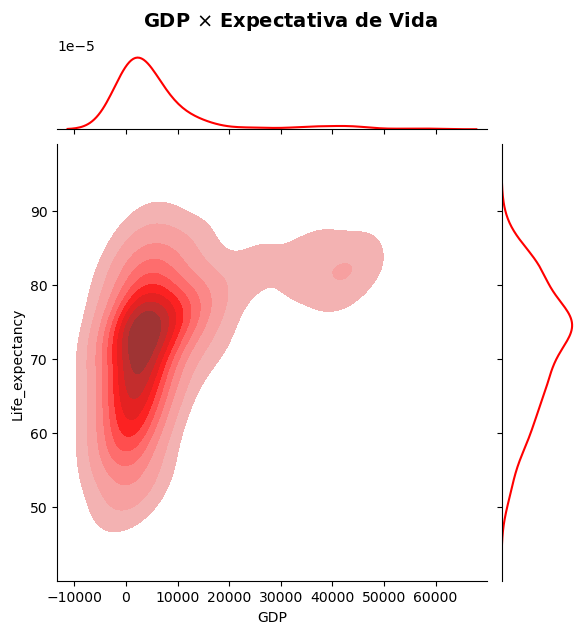

In [282]:
sns.jointplot(data=WHO, x="GDP", y="Life_expectancy", kind='kde',shade=True, levels=10, color='red')
# sns.jointplot(data=WHO, x="GDP", y="Life_expectancy", kind='hist', color='red')

plt.suptitle('GDP $\\times$ Expectativa de Vida', fontsize=14, weight='bold', y=1.05)
plt.show()


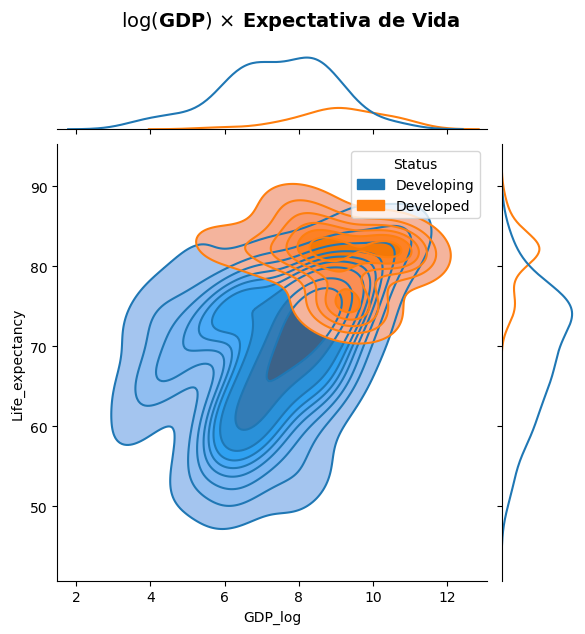

In [283]:
WHO['GDP_log'] = np.log(WHO.GDP)

g = sns.jointplot(data=WHO, x="GDP_log", y="Life_expectancy", hue="Status", kind='kde')
g.plot_joint(sns.kdeplot, shade=True)

plt.suptitle('$\log($GDP$)$ $\\times$ Expectativa de Vida', fontsize=14, weight='bold', y=1.05)
plt.show()

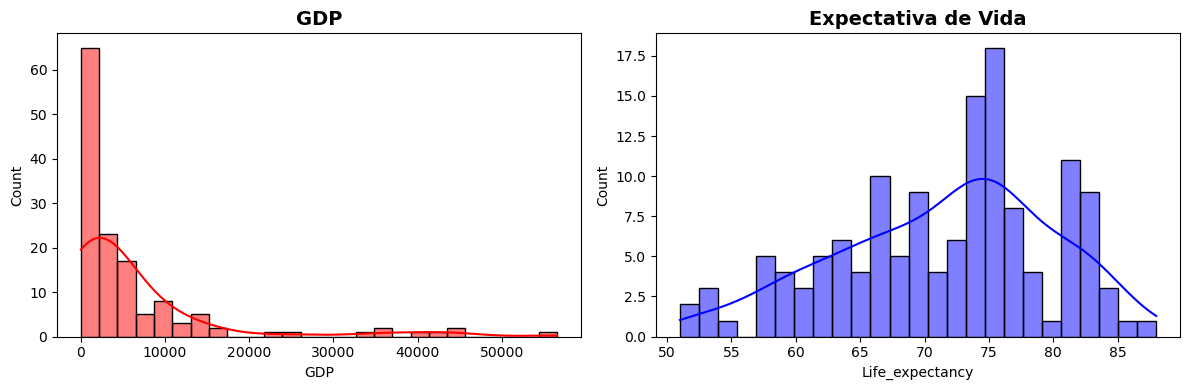

In [284]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=WHO, x='GDP', kde=True, color="red", ax=axs[0])
axs[0].set_title('GDP', fontsize=14, weight='bold')

sns.histplot(data=WHO, x='Life_expectancy', kde=True, color="blue", ax=axs[1], bins=25)
axs[1].set_title('Expectativa de Vida', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

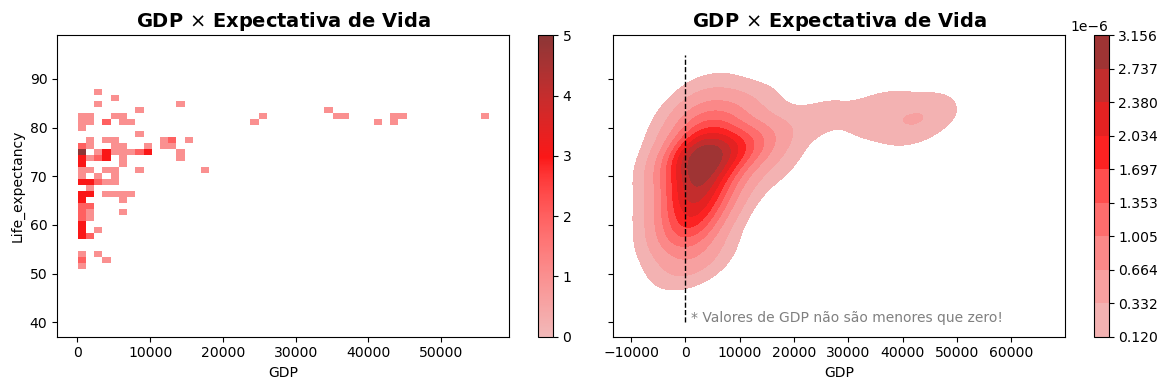

In [285]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

sns.histplot(data=WHO, x="GDP", y="Life_expectancy", color='red', bins=(50,30), ax=axs[0],cbar=True)
axs[0].set_title('GDP $\\times$ Expectativa de Vida', fontsize=14, weight='bold')

sns.kdeplot(data=WHO, x="GDP", y="Life_expectancy", shade=True, color='red', ax=axs[1],cbar=True)
axs[1].set_title('GDP $\\times$ Expectativa de Vida', fontsize=14, weight='bold')

axs[1].vlines(0,40,95,color='k',linestyle='dashed',lw=1)
axs[1].text(1000,40,'* Valores de GDP não são menores que zero!', color='grey')

plt.tight_layout()
plt.show()

#### AREA

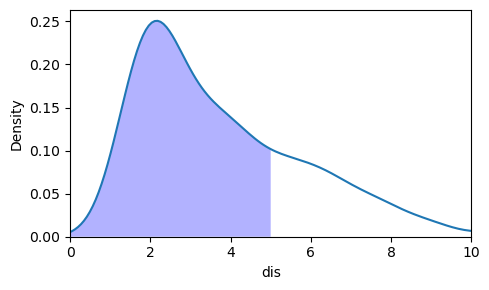

In [286]:
plt.figure(figsize=(5,3))

from scipy.stats import gaussian_kde

x = np.linspace(0,5,100)
prob = gaussian_kde(boston['dis'])(x)

a = sns.kdeplot(boston['dis'])

plt.fill_between(x,prob, facecolor='blue', alpha=0.3)
plt.xlim([0,10])

plt.tight_layout()
plt.show()

In [287]:
boston['dis'].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: dis, dtype: float64

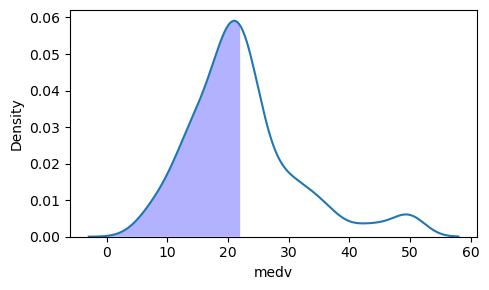

In [288]:
plt.figure(figsize=(5,3))

from scipy.stats import gaussian_kde

x = np.linspace(0,22,100)
prob = gaussian_kde(boston['medv'])(x)

a = sns.kdeplot(boston['medv'])

plt.fill_between(x,prob, facecolor='blue', alpha=0.3)

plt.tight_layout()
plt.show()

In [289]:
boston['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

## BoxPlot

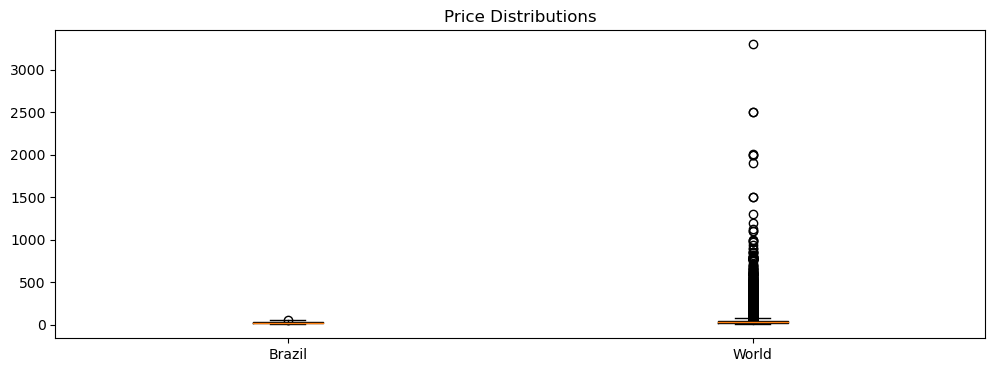

In [290]:
wine_not_null = wine[ ~ np.isnan( wine.price ) ]

plt.figure(figsize=(12,4))
plt.boxplot(wine_not_null[wine_not_null.country == 'Brazil'].price,positions=[1])
plt.boxplot(wine_not_null.price,positions=[2])
plt.title('Price Distributions')
plt.xticks(ticks=[1,2], labels=['Brazil','World'])
plt.show()

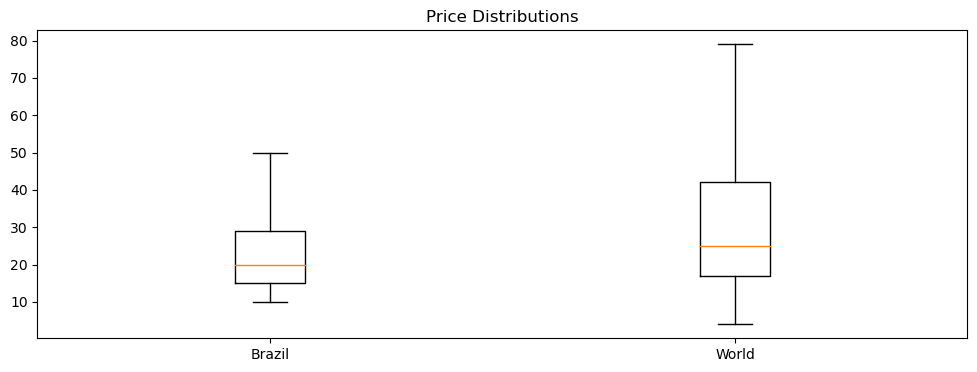

In [291]:
plt.figure(figsize=(12,4))
plt.boxplot(wine_not_null[wine_not_null.country == 'Brazil'].price,positions=[1],showfliers=False)
plt.boxplot(wine_not_null.price,positions=[2],showfliers=False)
plt.title('Price Distributions')
plt.xticks(ticks=[1,2], labels=['Brazil','World'])
plt.show()

CUIDADO !!!

SE O DF TIVER VALORES NULOS ELE DÁ ERRO E NÃO MOSTRA O GRÁFICO

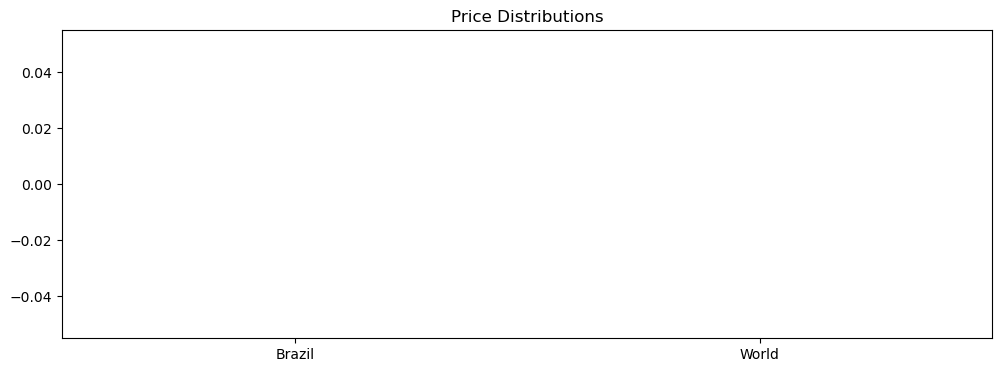

In [292]:
plt.figure(figsize=(12,4))
plt.boxplot(wine[wine.country == 'Brazil'].price,positions=[1])
plt.boxplot(wine.price,positions=[2])
plt.title('Price Distributions')
plt.xticks(ticks=[1,2], labels=['Brazil','World'])
plt.show()

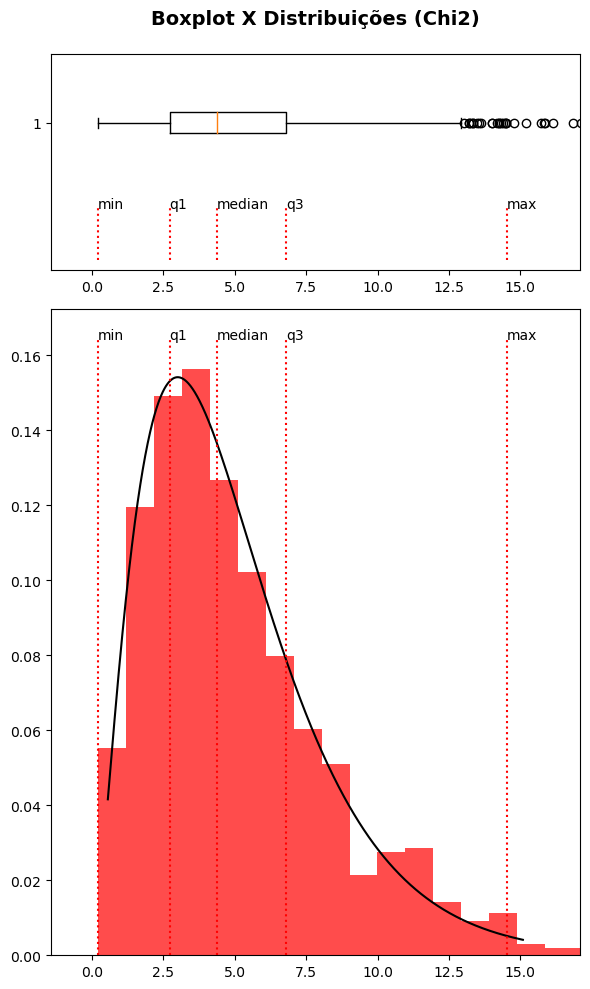

In [293]:
from scipy.stats import chi2, norm
np.random.seed(seed=1)

fig, (ax_box, ax_hist) = plt.subplots(2,  gridspec_kw={"height_ratios": (.25, .75)}, figsize=(6,10))

ax_box.set_title('Boxplot X Distribuições (Chi2)\n', fontsize=14, weight='bold')

# Produzindo dados de uma distribuição chi2
df = 5
rchi2 = chi2.rvs(df, size=1000)
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 1000)

ax_box.boxplot(rchi2, vert=False)
ax_hist.plot(x, chi2.pdf(x, df), 'k-', label='chi2 pdf', lw=1.5)
ax_hist.hist(rchi2, density=True, bins=30, alpha=0.7, color='r')

ax_box.set_xlim([min(x) - 0.4*df, max(x) + 0.4*df])
ax_hist.set_xlim([min(x) - 0.4*df, max(x) + 0.4*df])

max_hist = ax_hist.get_ylim()[1]
max_box = ax_box.get_ylim()[1]

for q, label in zip([0,0.25,0.5,0.75,0.99],['min','q1','median','q3','max']):
  ax_hist.vlines(np.quantile(rchi2,q),0,max_hist,color='r',linestyles='dotted',lw=1.5)
  ax_box.vlines(np.quantile(rchi2,q),0,max_box/4,color='r',linestyles='dotted',lw=1.5)
  ax_hist.text(np.quantile(rchi2,q),max_hist,label)
  ax_box.text(np.quantile(rchi2,q),max_box/4,label)

plt.tight_layout()
plt.show()


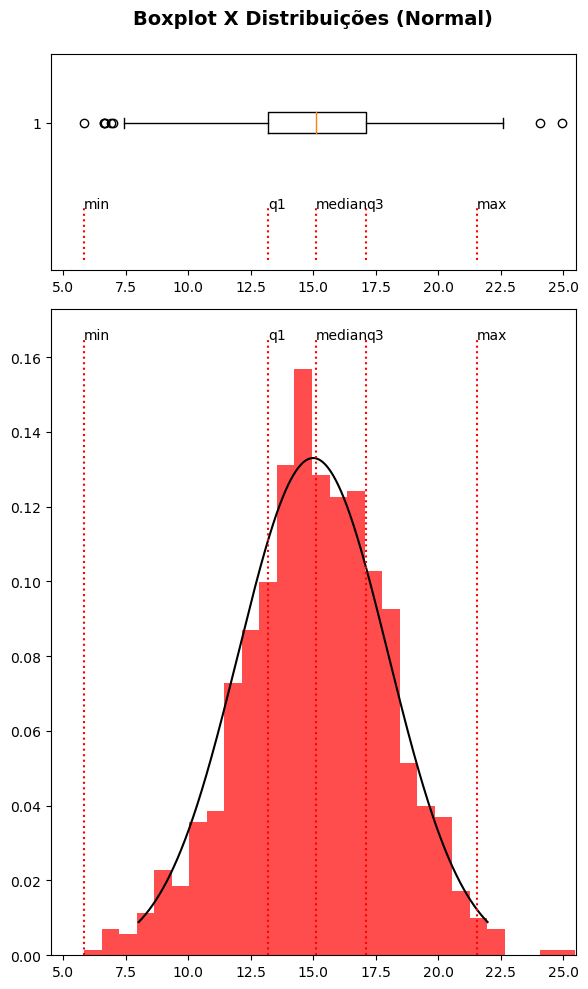

In [294]:
from scipy.stats import chi2, norm
np.random.seed(seed=1)

fig, (ax_box, ax_hist) = plt.subplots(2,  gridspec_kw={"height_ratios": (.25, .75)}, figsize=(6,10))

ax_box.set_title('Boxplot X Distribuições (Normal)\n', fontsize=14, weight='bold')

# Produzindo dados de uma distribuição normal
media = 15
sd = 3
rnorm = norm.rvs(loc=media,scale=sd,size=1000)
x = np.linspace(norm.ppf(0.01,loc=media,scale=sd), norm.ppf(0.99,loc=media,scale=sd), 1000)

ax_box.boxplot(rnorm, vert=False)
ax_hist.plot(x, norm.pdf(x,loc=media,scale=sd), 'k-', label='normal', lw=1.5)
ax_hist.hist(rnorm, density=True, bins=30,  alpha=0.7, color='r')

ax_box.set_xlim([media - 3.5*sd, media + 3.5*sd])
ax_hist.set_xlim([media - 3.5*sd, media + 3.5*sd])

max_hist = ax_hist.get_ylim()[1]
max_box = ax_box.get_ylim()[1]

for q, label in zip([0,0.25,0.5,0.75,0.99],['min','q1','median','q3','max']):
  ax_hist.vlines(np.quantile(rnorm,q),0,max_hist,color='r',linestyles='dotted',lw=1.5)
  ax_box.vlines(np.quantile(rnorm,q),0,max_box/4,color='r',linestyles='dotted',lw=1.5)
  ax_hist.text(np.quantile(rnorm,q),max_hist,label)
  ax_box.text(np.quantile(rnorm,q),max_box/4,label)

plt.tight_layout()
plt.show()

O intervalo interquartil é freqüentemente usado para se obter outliers dos dados. Outliers são definidos como observações que encontram-se abaixo de Q1−1.5IQR
 ou acima de Q3+1.5IQR
, onde IQR
 (Inter Quartil Range) é a distância inter quartis IQR=Q3−Q1
 e são indicados no gráfico de caixa por pontos individuais acima e abaixo das extremidades do gráfico. Para distribuições normais o intervalo dos valores não discrepantes é bastante próxima a [x¯−3σ,x¯+3σ]
, onde x¯
 e σ
 são o valor médio e o desvio padrão, e em muitos casos práticos essa regra pode ser aplicada de modo equivalente.

Você pode ver a relação entre essas medidas, os gráficos de caixa e os outliers na abaixo para uma distribuição normal de dados.

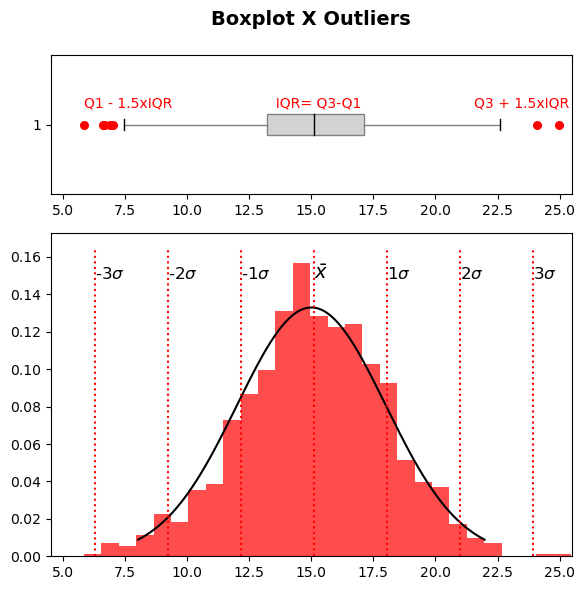

In [295]:
from scipy.stats import chi2, norm
np.random.seed(seed=1)

fig, (ax_box, ax_hist) = plt.subplots(2,  gridspec_kw={"height_ratios": (.3, .7)}, figsize=(6,6))

ax_box.set_title('Boxplot X Outliers\n', fontsize=14, weight='bold')

# Produzindo dados de uma distribuição normal
media = 15
sd = 3
rnorm = norm.rvs(loc=media,scale=sd,size=1000)
x = np.linspace(norm.ppf(0.01,loc=media,scale=sd), norm.ppf(0.99,loc=media,scale=sd), 1000)

ax_box.boxplot(rnorm, vert=False, showfliers=True,
            flierprops=dict( markeredgecolor="r", markerfacecolor='r', markersize=5.5 ),
            patch_artist=True,
            boxprops=dict(facecolor="lightgrey", color="grey"),
            medianprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="grey"))
ax_hist.plot(x, norm.pdf(x,loc=media,scale=sd), 'k-', label='normal', lw=1.5)
ax_hist.hist(rnorm, density=True, bins=30,  alpha=0.7, color='r')

ax_box.set_xlim([media - 3.5*sd, media + 3.5*sd])
ax_hist.set_xlim([media - 3.5*sd, media + 3.5*sd])

max_hist = ax_hist.get_ylim()[1]
max_box = ax_box.get_ylim()[1]

for q, label in zip([0,0.25,0.5,0.75,0.99],['Q1 - 1.5xIQR','  IQR= Q3-Q1','','','Q3 + 1.5xIQR']):
  ax_box.text(np.quantile(rnorm,q),3*max_box/4,label,color='r',fontsize=10)

max_hist = ax_hist.get_ylim()[1]

for s in [-3,-2,-1,1,2,3]:
  ax_hist.vlines(np.mean(rnorm) + s*np.std(rnorm),0,max_hist,color='r',linestyles='dotted',lw=1.5)
  ax_hist.text(np.mean(rnorm) + s*np.std(rnorm),0.9*max_hist, str(s) + '$\sigma$',fontsize=12)

ax_hist.vlines(np.mean(rnorm) ,0,max_hist,color='r',linestyles='dotted',lw=1.5)
ax_hist.text(np.mean(rnorm) ,0.9*max_hist, '$\\bar{x}$',fontsize=14)

plt.tight_layout()
plt.show()


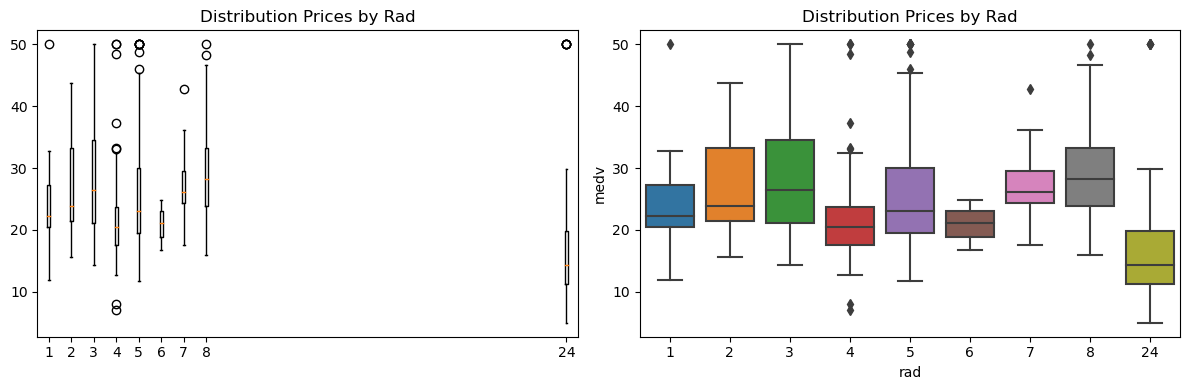

In [296]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

for r in boston['rad'].unique():
  ax[0].boxplot(boston[boston.rad == r]['medv'], positions=[r])

ax[0].set_title('Distribution Prices by Rad')

sns.boxplot(x='rad',y='medv',data=boston,ax=ax[1])
ax[1].set_title('Distribution Prices by Rad')

plt.tight_layout()
plt.show()

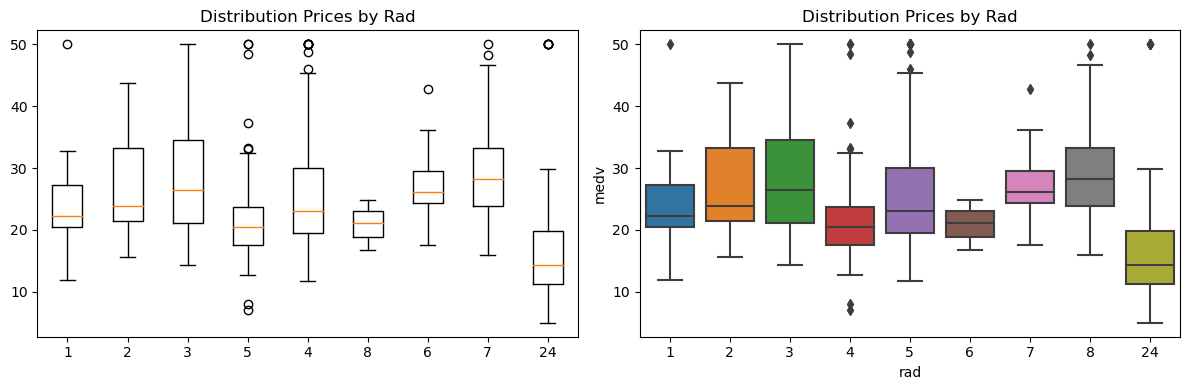

In [297]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

data = []
# for r in boston['rad'].unique():
for r in sorted(boston['rad'].unique()):
  data.append(boston[boston.rad == r]['medv'])

ax[0].boxplot(data)
ax[0].set_title('Distribution Prices by Rad')
ax[0].set_xticks(np.arange(1,len(boston_group)+1), labels=boston['rad'].unique())

sns.boxplot(x='rad',y='medv',data=boston,ax=ax[1])
ax[1].set_title('Distribution Prices by Rad')

plt.tight_layout()
plt.show()

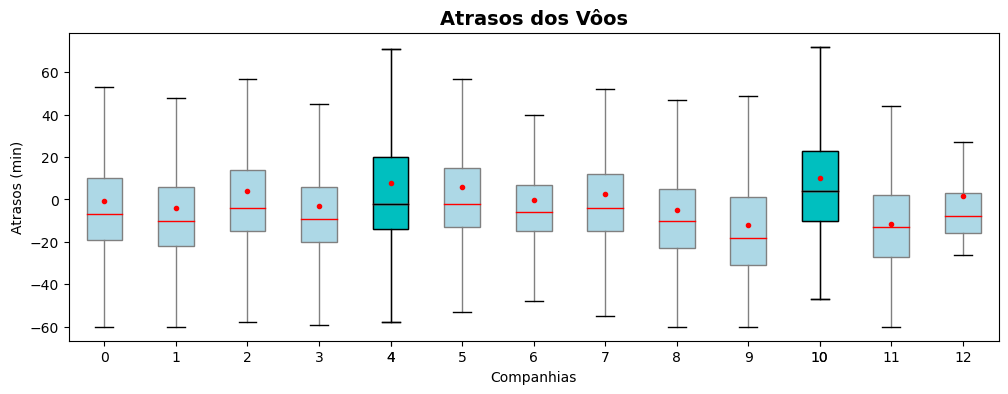

In [298]:
plt.figure(figsize=(12,4))

for i, companhia in enumerate(flights.name.unique()):
   plt.boxplot(flights[ flights.name == companhia ]['arr_delay'],positions=[i],showfliers=False,
              widths=0.5,
              patch_artist=True,
              boxprops=dict(facecolor="lightblue", color="grey"),
              medianprops=dict(color="r"),
              capprops=dict(color="k"),
              whiskerprops=dict(color="grey"),
              showmeans=True,
              meanprops={"marker":"o",
                      "markerfacecolor":"r",
                      "markeredgecolor":"r",
                      "markersize":"3"})

plt.boxplot(flights[ flights.name == 'Atlantic Southeast Airlines' ]['arr_delay'],positions=[4],showfliers=False, widths=0.5,
            patch_artist=True,
            boxprops=dict(facecolor="c", color="k"),
            medianprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="k"))

plt.boxplot(flights[ flights.name == 'Frontier Airlines Inc.' ]['arr_delay'],positions=[10],showfliers=False, widths=0.5,
            patch_artist=True,
            boxprops=dict(facecolor="c", color="k"),
            medianprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="k"))

plt.title('Atrasos dos Vôos', fontsize=14, weight='bold')
plt.ylabel('Atrasos (min)')
plt.xlabel('Companhias')

# plt.xticks(ticks=range(0,12),labels=flights.name.unique(),rotation=60)
plt.show()

#### Boxplot, identificando outliers
Cuidado com o dropna(). Com na o matplotlib não consegue fazer o cálculo de outliers.

In [299]:
df = penguins

/home/anahelena/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


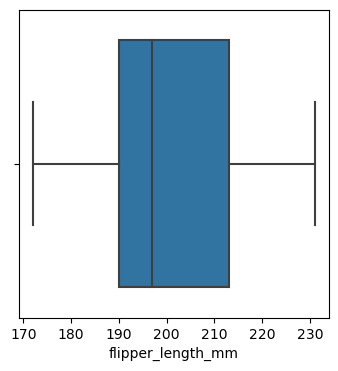

In [300]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

sns.boxplot(df.flipper_length_mm)

plt.show()

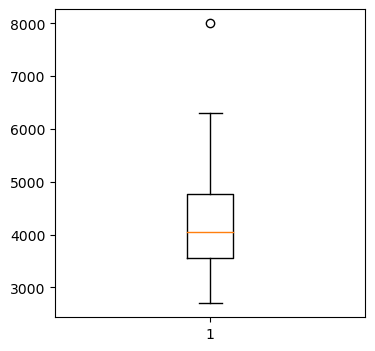

In [301]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

df.iloc[0:1,-2] = 8000

plt.boxplot(df.body_mass_g.dropna())

plt.show()

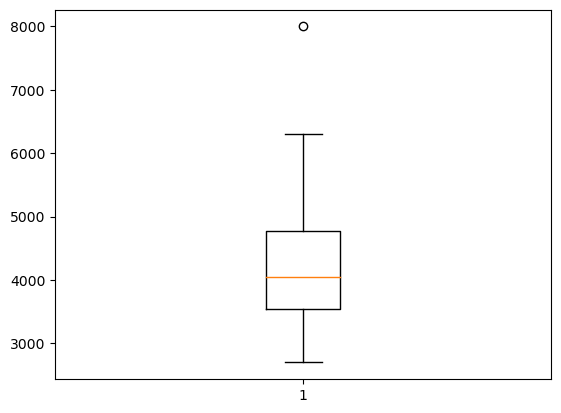

In [302]:
f = plt.boxplot(df.body_mass_g.dropna())
plt.show()

In [303]:
f.keys()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

In [304]:
f['fliers'][0].get_data()

(array([1.]), array([8000.]))

In [305]:
f['fliers'][0].get_data()[1]

array([8000.])

## Mapas de Calor

### Mapa de Correlação

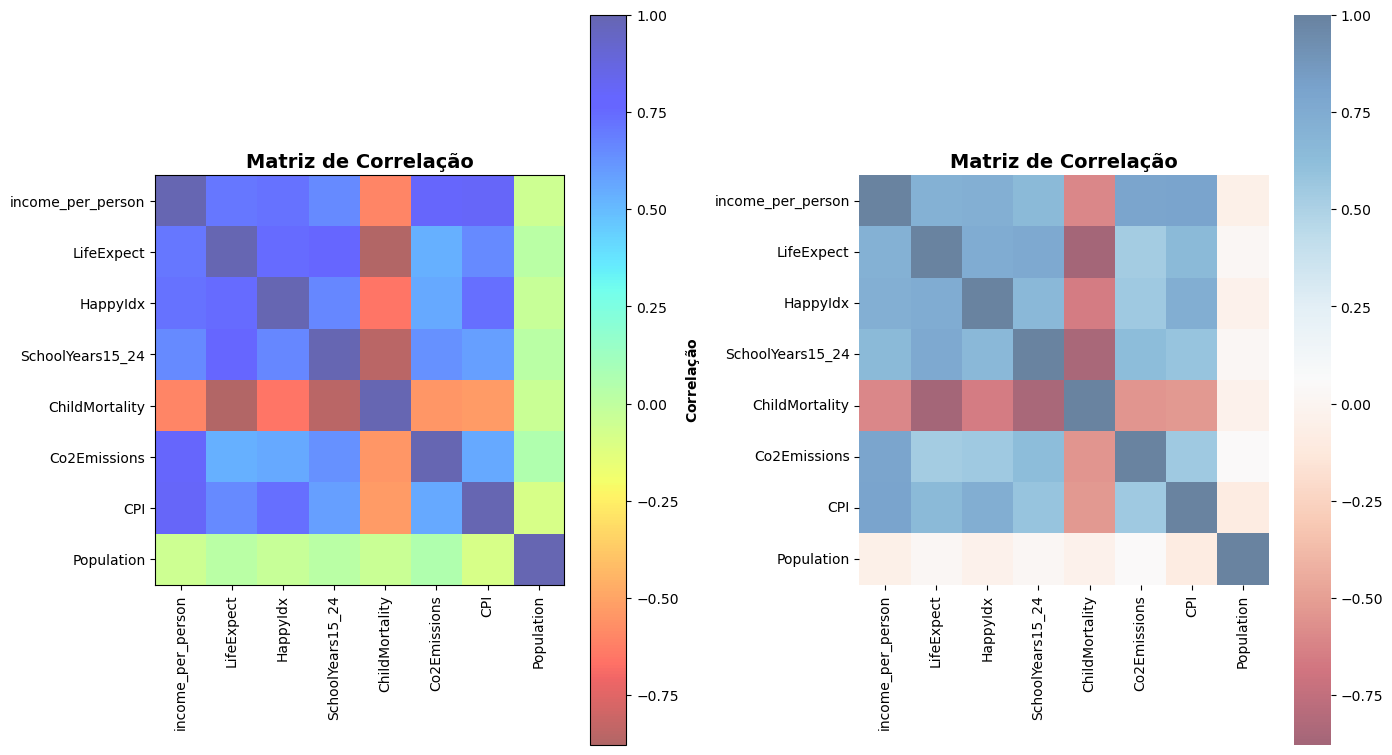

In [306]:
plt.figure(figsize=(14,8))

matriz = desenvolvimento_Paises[['income_per_person',
       'LifeExpect', 'HappyIdx',
       'SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
       'CPI', 'Population']].corr()

plt.subplot(1,2,1)
plt.imshow(matriz, cmap='jet_r', alpha=0.6)

plt.xticks(np.arange(len( matriz.columns)), matriz.columns.to_list(), rotation=90)
plt.yticks(np.arange(len( matriz.columns)), matriz.columns.to_list())

cbar = plt.colorbar()
cbar.set_label('$\\bf{Correlação}$')

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.subplot(1,2,2)
sns.heatmap(matriz, cmap='RdBu', square=True, alpha=0.6)

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

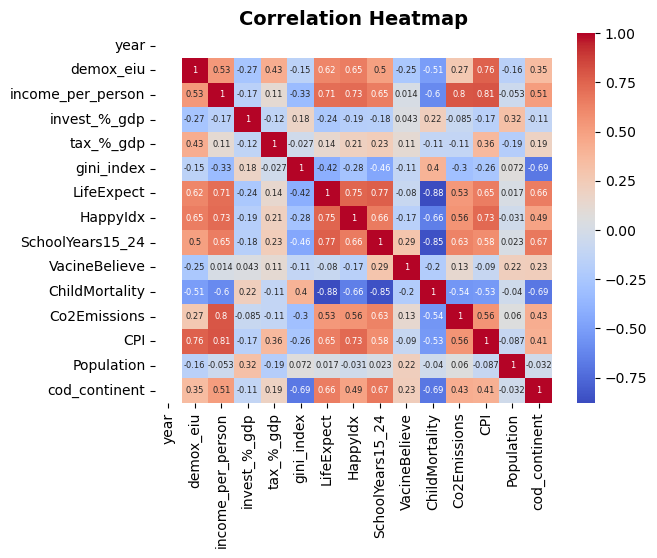

In [307]:
df_corr = desenvolvimento_Paises.select_dtypes(include='number').corr(method='pearson')
sns.heatmap(df_corr,cmap='coolwarm',annot=True,annot_kws={'fontsize':6})
plt.title('Correlation Heatmap',fontsize=14,weight='bold')
plt.show()

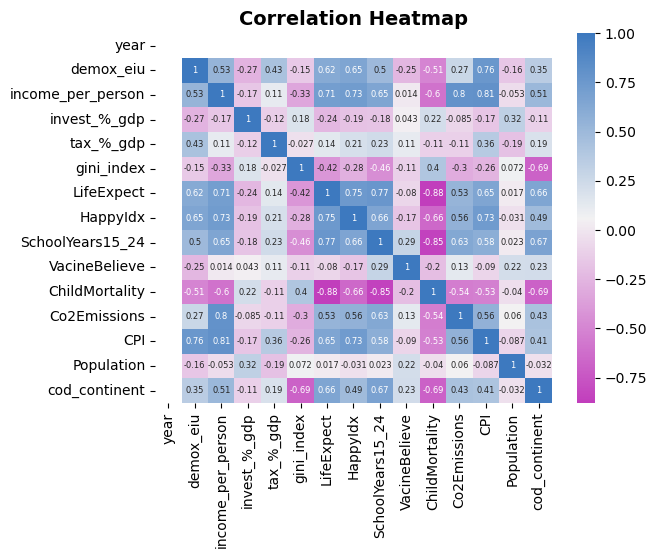

In [308]:
sns.heatmap(df_corr,
            cmap = sns.diverging_palette(
            h_neg=-50,
            h_pos=250,
            s=80,
            as_cmap=True),
            annot=True,annot_kws={'fontsize':6}
            )

plt.title('Correlation Heatmap',fontsize=14,weight='bold')
plt.show()


### Tabelas de Contingência

In [309]:
# %load_ext rpy2.ipython

In [310]:
# %%R
# desenvolvimento_Paises = data.frame(
#   "Tipo" = c("Acompanhante", "Paciente", "Paciente", "Acompanhante", "Acompanhante", "Acompanhante", "Paciente"),
#   "Genero" = c("Feminino", "Masculino", "Masculino", "Feminino", "Masculino", "Feminino", "Feminino")
# )

# conTable = table(desenvolvimento_Paises)
# print(conTable)

In [311]:
# %%R
# mosaicplot(conTable)

## Pizza

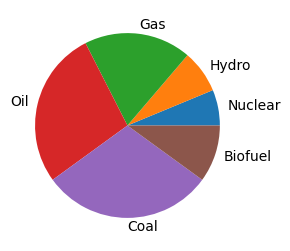

In [312]:
plt.figure(figsize=(4,3))

plt.pie( np.array(energy),labels=energy_type )
plt.show()

## Espelho

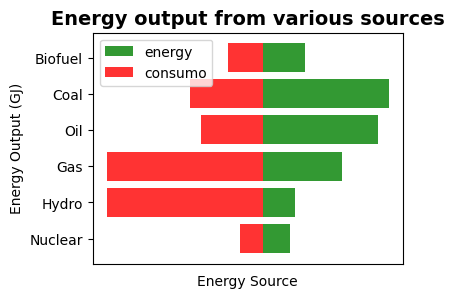

In [313]:
plt.figure(figsize=(4,3))
energy_type = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = [5, 6, 15, 22, 24, 8]
consumo = [4.5, 30, 30, 12, 14, 6.7]

plt.barh(energy_type, energy, color='green',alpha=0.8, label='energy')
plt.barh(energy_type, -np.array(consumo), color='red',alpha=0.8,label='consumo')
plt.legend()
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various sources", fontsize=14, weight='bold')
plt.xticks([])

plt.show()

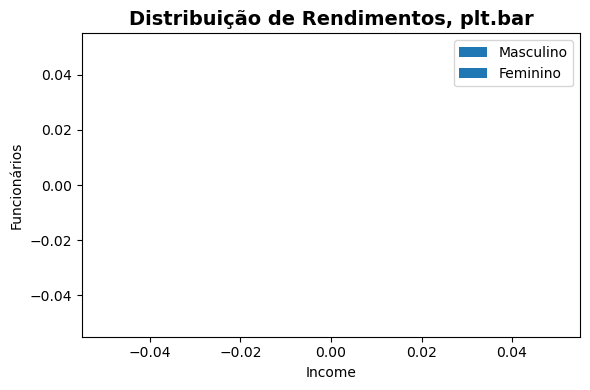

In [314]:
plt.figure(figsize=(6,4))

h = np.histogram(gdoor[gdoor.gender == 'Male'].income, bins=np.arange(minin,maxin,5000))
plt.bar(x=h[1][1:], height=h[0], edgecolor = 'white', label='Masculino', width=5000, color=colors['Male'], alpha=0.7)

h = np.histogram(gdoor[gdoor.gender == 'Female'].income, bins=np.arange(minin,maxin,5000))
plt.bar(x=h[1][1:], height= -1 * h[0],  edgecolor = 'white', label='Feminino', width=5000, color=colors['Female'], alpha=0.7)

# Anotações
plt.title('Distribuição de Rendimentos, plt.bar', fontsize=14, weight='bold')
plt.xlabel('Income')
plt.ylabel('Funcionários')
plt.legend()

plt.tight_layout()
plt.show()

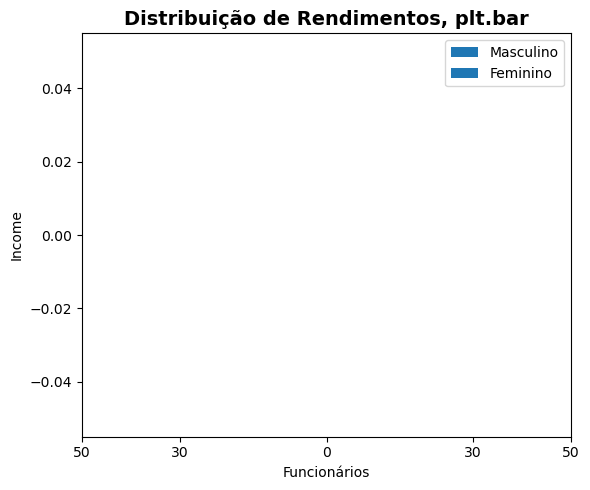

In [315]:
plt.figure(figsize=(6,5))

h = np.histogram(gdoor[gdoor.gender == 'Male'].income, bins=np.arange(minin,maxin,5000))
plt.barh(y=h[1][1:], width=h[0],  edgecolor = 'white', label='Masculino', height=5000, color=colors['Male'], alpha=0.7)

h = np.histogram(gdoor[gdoor.gender == 'Female'].income, bins=np.arange(minin,maxin,5000))
plt.barh(y=h[1][1:], width= -1 * h[0], edgecolor = 'white', label='Feminino', height=5000, color=colors['Female'], alpha=0.7)

# Anotações
plt.title('Distribuição de Rendimentos, plt.bar', fontsize=14, weight='bold')
plt.ylabel('Income')
plt.xlabel('Funcionários')
plt.legend()
plt.xticks(ticks=[-50,-30,0,30,50], labels=[50,30,0,30,50])

plt.tight_layout()
plt.show()

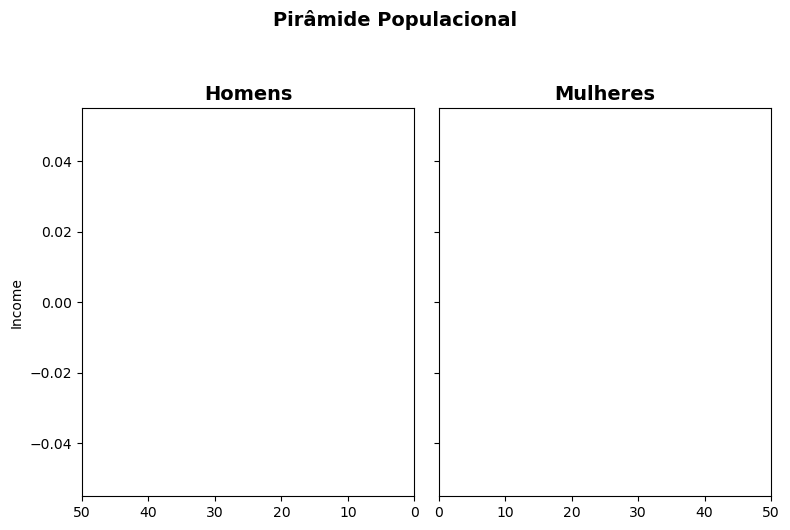

In [316]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(8, 5))

fig.suptitle('Pirâmide Populacional', fontsize=14, weight='bold', y=1.05)

h1 = np.histogram(gdoor[gdoor.gender == 'Male'].income, bins=np.arange(minin,maxin,5000))
h2 = np.histogram(gdoor[gdoor.gender == 'Female'].income, bins=np.arange(minin,maxin,5000))
y = h1[1][1:]
x_male = h1[0]
x_female = h2[0]


axes[0].barh(y, x_male, align='center',edgecolor = 'white', height=5000, color=colors['Male'], alpha=0.8)
axes[0].set_title('Homens', fontsize=14, weight='bold')
axes[1].barh(y, x_female, align='center', edgecolor = 'white', height=5000, color=colors['Female'], alpha=0.7)
axes[1].set_title('Mulheres', fontsize=14, weight='bold')

axes[0].set_xlim([0,50])
axes[1].set_xlim([0,50])

axes[0].set_ylabel('Income')
axes[0].invert_xaxis()

plt.tight_layout()
plt.show()

## CUIDADO Matplotlib  ×  Seaborn

AttributeError: 'Rectangle' object has no property 'errorbar'

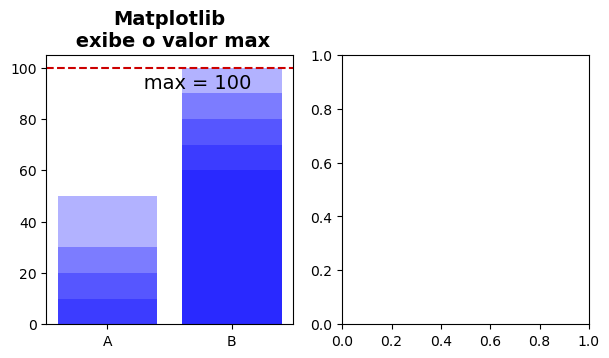

In [317]:
data = pd.DataFrame( { 'tipo': pd.Series(['A','A','A','A','A','B','B','B','B','B']),
                     'valor': pd.Series([0,10,20,30,50,60,70,80,90,100]) })

plt.figure(figsize=(7,3.5))

plt.subplot(1,2,1)
plt.bar(data.tipo, data.valor, color='blue',alpha=0.3)

plt.ylim([0,105])
plt.text(0,92,'      max = ' + str(data[ data.tipo == 'B' ].valor.max()),fontsize=14)
plt.axhline(y = data[ data.tipo == 'B' ].valor.max(), color = '#cc0000', linestyle = '--')
plt.title('Matplotlib\n exibe o valor max',fontsize=14,weight='bold')

plt.subplot(1,2,2)
sns.barplot(x=data.tipo, y=data.valor, color='yellow',alpha=0.9,errorbar=None)

plt.ylim([0,105])
plt.text(0,72,'  média = ' + str(data[ data.tipo == 'B' ].valor.mean()),fontsize=14)
plt.axhline(y = data[ data.tipo == 'B' ].valor.mean() , color = '#cc0000', linestyle = '--')
plt.title('Seaborn\n exibe valor medio e IC',fontsize=14,weight='bold')

plt.tight_layout()
plt.show()

# p